<center>
<hr>
<h1>
<b>
Project Based Learning

(DSPL)
<br/>
Prashant Kumar
<br/>
20303007
<br/>
Mtech DA
</b>
</h1>
<h5>
<b>
Title: World Wide Covid-19 Analysis , Visualization and Prediction Using Ml Algo vs Pandemic model
</b>
</h5>



<hr>
</center>


 
<br/>

<h2> <b> Datasets Link :</b> https://github.com/CSSEGISandData/COVID-19
</h2>
<br/>

In [ ]:
import os
import math
import time
import folium
import random
import datetime
import operator 
import numpy as np 
import pandas as pd 
import seaborn as sns

from pylab import rcParams
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
from folium.plugins import MarkerCluster

from IPython.display import set_matplotlib_formats

%matplotlib inline
plt.style.use('fivethirtyeight')
set_matplotlib_formats('retina')

from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split

from sklearn.metrics import mean_squared_error, mean_absolute_error


import warnings
warnings.filterwarnings("ignore")


Import the data (make sure you update this on a daily basis)

In [ ]:

confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-11-2021.csv')



In [ ]:
latest_data.head()

FIPS Admin2 Province_State  ... Combined_Key Incident_Rate  Case_Fatality_Ratio
0   NaN    NaN            NaN  ...  Afghanistan    143.640850             4.383282
1   NaN    NaN            NaN  ...      Albania   4011.467093             1.734204
2   NaN    NaN            NaN  ...      Algeria    261.911672             2.636459
3   NaN    NaN            NaN  ...      Andorra  14404.969909             1.006289
4   NaN    NaN            NaN  ...       Angola     64.519038             2.438104

[5 rows x 14 columns]

In [ ]:
latest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3983 entries, 0 to 3982
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 3266 non-null   float64
 1   Admin2               3271 non-null   object 
 2   Province_State       3812 non-null   object 
 3   Country_Region       3983 non-null   object 
 4   Last_Update          3983 non-null   object 
 5   Lat                  3895 non-null   float64
 6   Long_                3895 non-null   float64
 7   Confirmed            3983 non-null   int64  
 8   Deaths               3983 non-null   int64  
 9   Recovered            708 non-null    float64
 10  Active               706 non-null    float64
 11  Combined_Key         3983 non-null   object 
 12  Incident_Rate        3893 non-null   float64
 13  Case_Fatality_Ratio  3937 non-null   float64
dtypes: float64(7), int64(2), object(5)
memory usage: 435.8+ KB


In [ ]:
latest_data.isna().sum()

FIPS                    717
Admin2                  712
Province_State          171
Country_Region            0
Last_Update               0
Lat                      88
Long_                    88
Confirmed                 0
Deaths                    0
Recovered              3275
Active                 3277
Combined_Key              0
Incident_Rate            90
Case_Fatality_Ratio      46
dtype: int64

In [ ]:
latest_data['Lat'].fillna(0,inplace=True)
latest_data['Long_'].fillna(0,inplace=True)
latest_data['Recovered'].fillna(0,inplace=True)
latest_data['Active'].fillna(0,inplace=True)


In [ ]:
latest_data.isna().sum()

FIPS                   717
Admin2                 712
Province_State         171
Country_Region           0
Last_Update              0
Lat                      0
Long_                    0
Confirmed                0
Deaths                   0
Recovered                0
Active                   0
Combined_Key             0
Incident_Rate           90
Case_Fatality_Ratio     46
dtype: int64

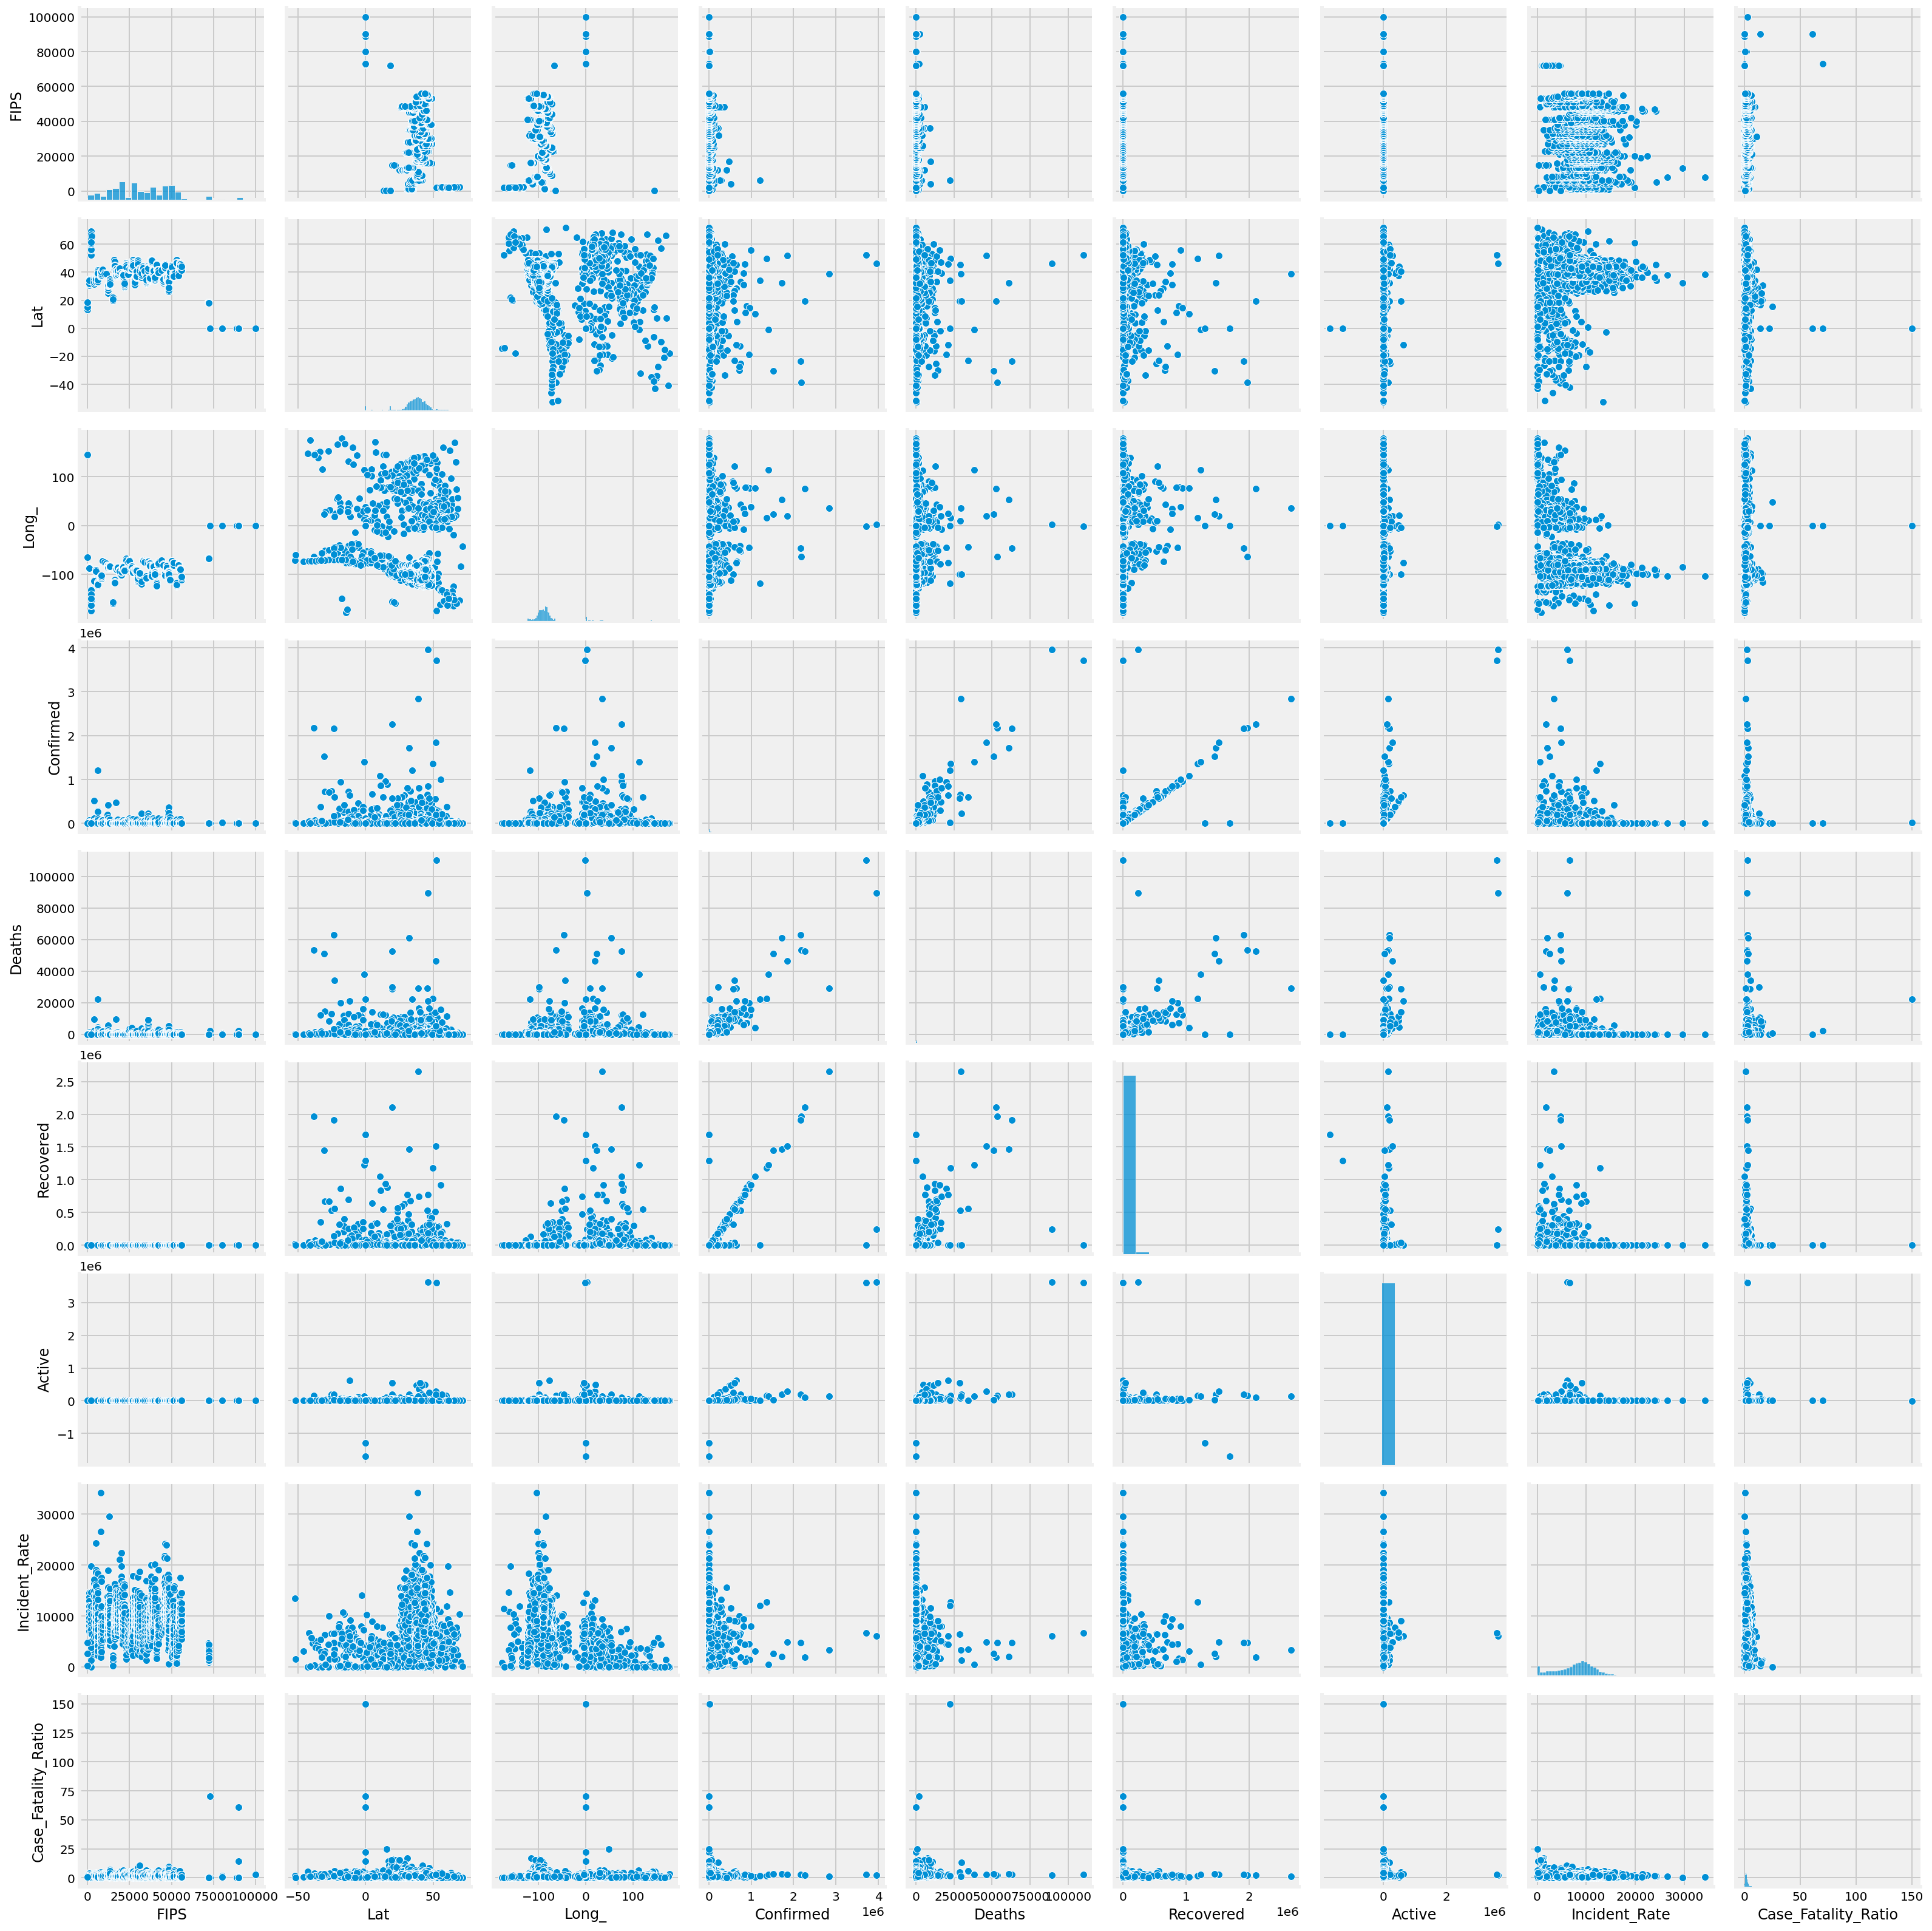

In [ ]:
# Pair plot for better visualization
sns.pairplot(latest_data)


In [ ]:
# Finding relation between features

rcParams['figure.figsize'] =40,20
sns.set(font_scale=2)
corr=latest_data.corr()
corr

FIPS       Lat  ...  Incident_Rate  Case_Fatality_Ratio
FIPS                 1.000000 -0.394761  ...      -0.165650            -0.008393
Lat                 -0.394761  1.000000  ...       0.236311            -0.091257
Long_                0.428674 -0.214572  ...      -0.549996             0.003359
Confirmed           -0.071879 -0.112246  ...      -0.120545             0.010049
Deaths              -0.063550 -0.125197  ...      -0.125709             0.134918
Recovered                 NaN -0.174302  ...      -0.159351             0.002200
Active                    NaN  0.025869  ...      -0.041302             0.016212
Incident_Rate       -0.165650  0.236311  ...       1.000000            -0.030377
Case_Fatality_Ratio -0.008393 -0.091257  ...      -0.030377             1.000000

[9 rows x 9 columns]

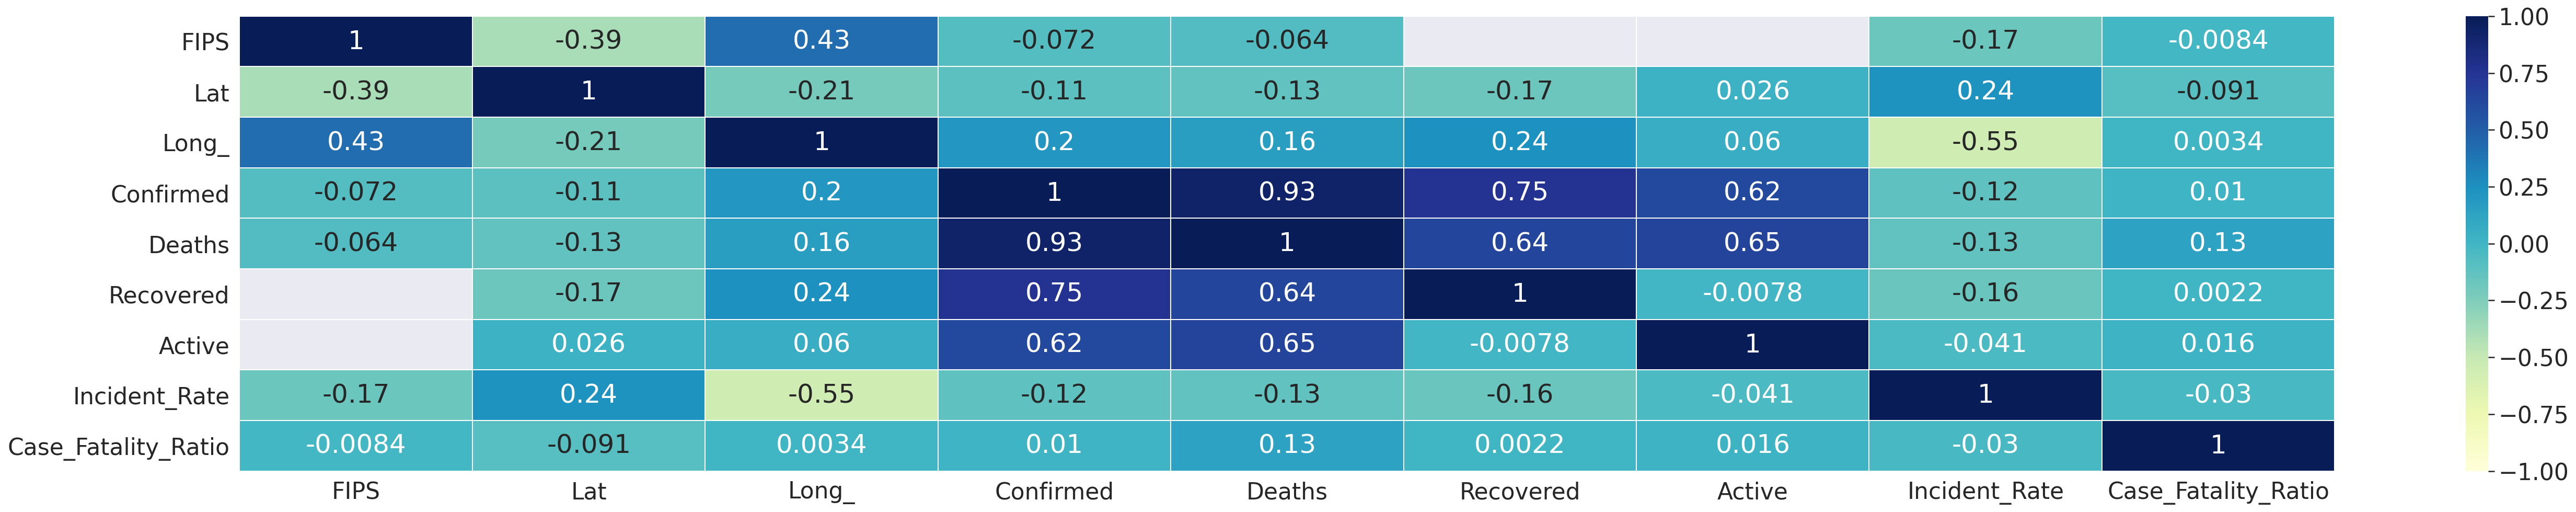

In [ ]:
rcParams['figure.figsize'] =40,8
sns.heatmap(corr, xticklabels=corr.columns.values,yticklabels=corr.columns.values,annot=True,linewidths=.5,cmap="YlGnBu",annot_kws={"size":25},vmin=-1,vmax=1)


In [ ]:
confirmed_df.head()

Province/State Country/Region       Lat  ...  4/25/21  4/26/21  4/27/21
0            NaN    Afghanistan  33.93911  ...    58843    59015    59225
1            NaN        Albania  41.15330  ...   130537   130606   130736
2            NaN        Algeria  28.03390  ...   120922   121112   121344
3            NaN        Andorra  42.50630  ...    13060    13083    13121
4            NaN         Angola -11.20270  ...    25609    25710    25942

[5 rows x 466 columns]

In [ ]:
confirmed_df.isna().sum()

Province/State    189
Country/Region      0
Lat                 2
Long                2
1/22/20             0
                 ... 
4/23/21             0
4/24/21             0
4/25/21             0
4/26/21             0
4/27/21             0
Length: 466, dtype: int64

In [ ]:
deaths_df.isna().sum()

Province/State    189
Country/Region      0
Lat                 2
Long                2
1/22/20             0
                 ... 
4/23/21             0
4/24/21             0
4/25/21             0
4/26/21             0
4/27/21             0
Length: 466, dtype: int64

In [ ]:
recoveries_df.isna().sum()

Province/State    190
Country/Region      0
Lat                 1
Long                1
1/22/20             0
                 ... 
4/23/21             0
4/24/21             0
4/25/21             0
4/26/21             0
4/27/21             0
Length: 466, dtype: int64

In [ ]:
cols = confirmed_df.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '4/18/21', '4/19/21', '4/20/21', '4/21/21', '4/22/21', '4/23/21',
       '4/24/21', '4/25/21', '4/26/21', '4/27/21'],
      dtype='object', length=466)



Get all the dates for the ongoing coronavirus pandemic 

In [ ]:

confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]


In [ ]:
dates = confirmed.keys()
world_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = [] 

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    
    # confirmed, deaths, recovered, and active
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum-death_sum-recovered_sum)
    
    # calculate rates
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)

Getting daily increases and moving averages

In [ ]:
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

def moving_average(data, window_size):
    moving_average = []
    for i in range(len(data)):
        if i + window_size < len(data):
            moving_average.append(np.mean(data[i:i+window_size]))
        else:
            moving_average.append(np.mean(data[i:len(data)]))
    return moving_average

# window size
window = 7

# confirmed cases
world_daily_increase = daily_increase(world_cases)
world_confirmed_avg= moving_average(world_cases, window)
world_daily_increase_avg = moving_average(world_daily_increase, window)

# deaths
world_daily_death = daily_increase(total_deaths)
world_death_avg = moving_average(total_deaths, window)
world_daily_death_avg = moving_average(world_daily_death, window)


# recoveries
world_daily_recovery = daily_increase(total_recovered)
world_recovery_avg = moving_average(total_recovered, window)
world_daily_recovery_avg = moving_average(world_daily_recovery, window)


# active 
world_active_avg = moving_average(total_active, window)

In [ ]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)


In [ ]:

len(days_since_1_22)


462

Future forcasting

In [ ]:
days_in_future = 10
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-10]

Convert integer into datetime for better visualization

In [ ]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [ ]:
# slightly modify the data to fit the model better (regression models cannot pick the pattern)
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22[50:], world_cases[50:], test_size=0.02, shuffle=False) 

<hr>
<center>
<h4>
<b>
Building A Linear Model
</b>
</h4>
<hr>
</center>

The linear model is: Y = -3.0009e+07 + 3.2838e+05X


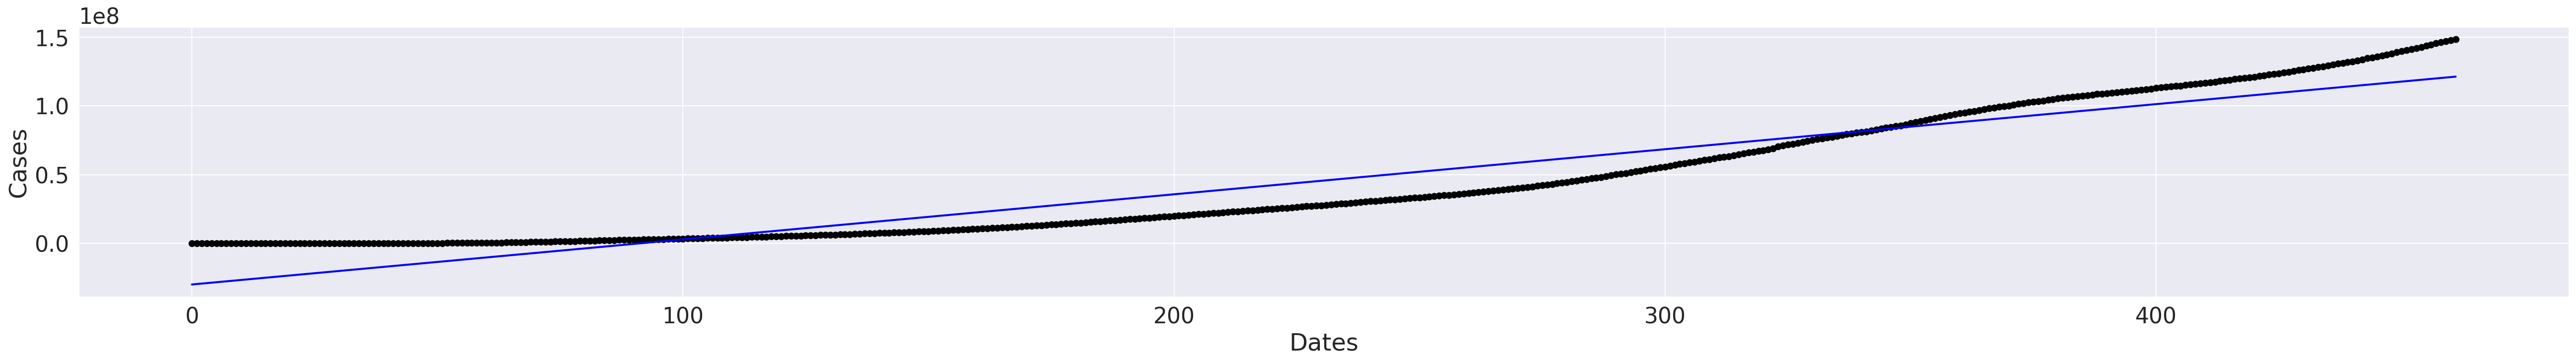

In [ ]:
X=days_since_1_22
y=world_cases

reg = LinearRegression()
reg.fit(X, y)
print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))
predictions = reg.predict(X)

actvspred = pd.DataFrame({'Actual': y.flatten(), 'Predicted': predictions.flatten()})

plt.figure(figsize=(40, 5))
plt.scatter(
    X,
    y,
    c='black'
)
plt.plot(
    X,
    predictions,
    c='blue',
    linewidth=2
)

plt.xlabel("Dates")
plt.ylabel("Cases")
plt.show()

In [ ]:
# linear 

model = LinearRegression()
model.fit(X_train_confirmed, y_train_confirmed)
linear_pred = model.predict(future_forcast)


MAE: 20976878.189097088
MSE: 441456940950946.94


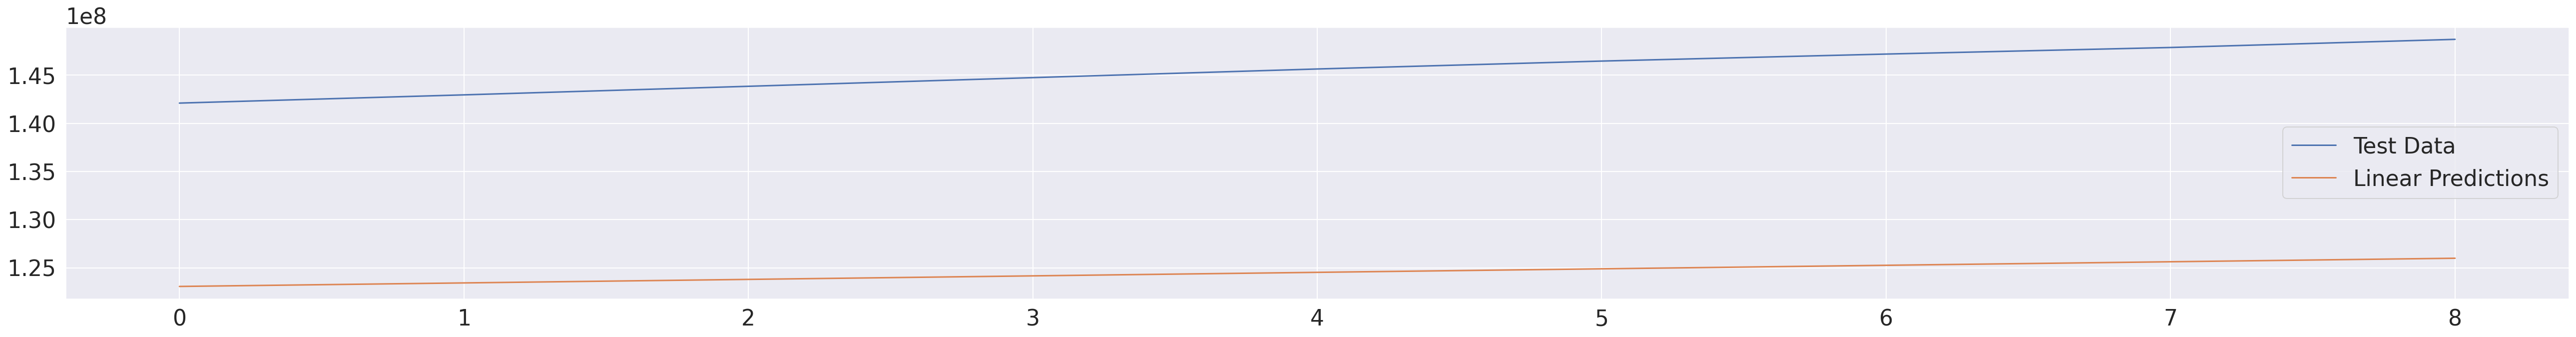

In [ ]:
# check against testing data
plt.figure(figsize=(40, 5))

linear_test_pred = model.predict(X_test_confirmed)
plt.plot(y_test_confirmed)
plt.plot(linear_test_pred)
plt.legend(['Test Data', 'Linear Predictions'])
print('MAE:', mean_absolute_error(linear_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(linear_test_pred, y_test_confirmed))

<hr>
<center>
<h4>
<b>
Building A SVM Model
</b>
</h4>
<hr>
</center>

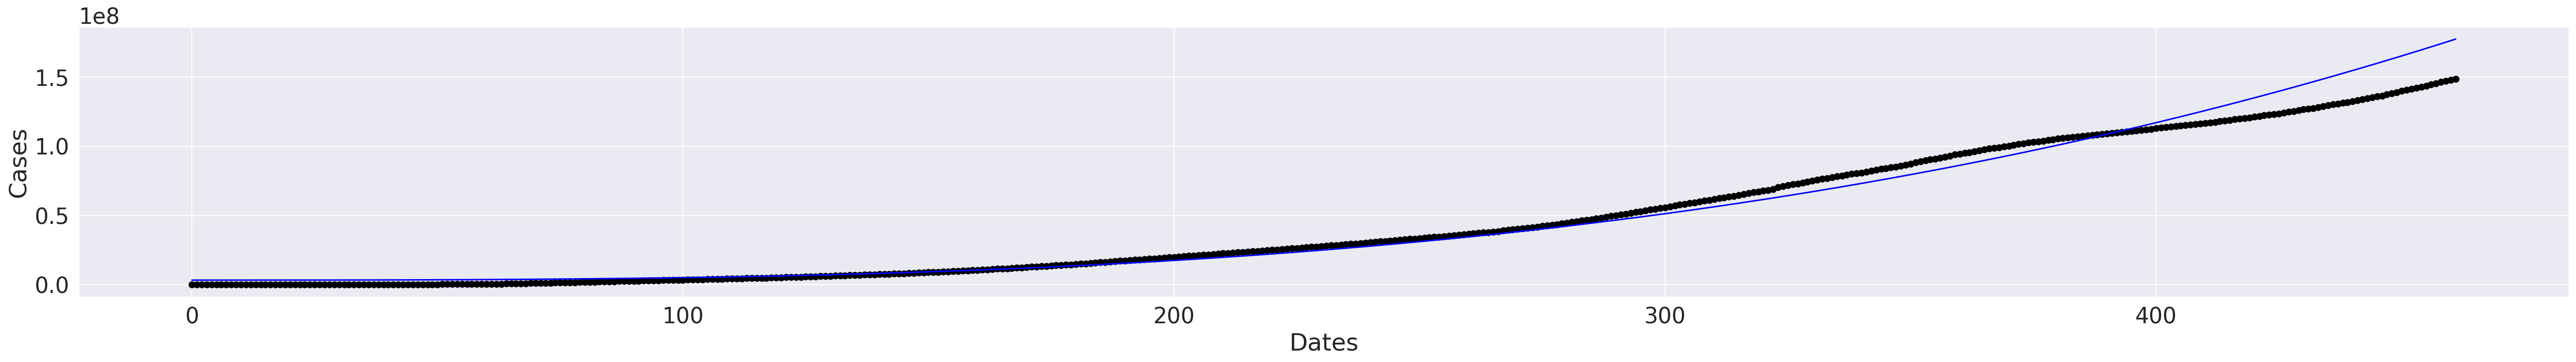

In [ ]:
X=days_since_1_22
y=world_cases

svm_scatter = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=3, C=0.1)
svm_scatter.fit(X, y) 

svm_scatter_pred = svm_scatter.predict(X)
new_X, new_y = zip(*sorted(zip(X,svm_scatter_pred)))

plt.figure(figsize=(40, 5))
plt.scatter(
    X,
    y,
    c='black'
)
plt.plot(
    new_X, new_y,
    c='blue'
)
plt.xlabel("Dates")
plt.ylabel("Cases")
plt.show()

In [ ]:
# svm_confirmed 

svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=3, C=0.1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forcast)


MAE: 30448396.503838792
MSE: 927705001693765.4


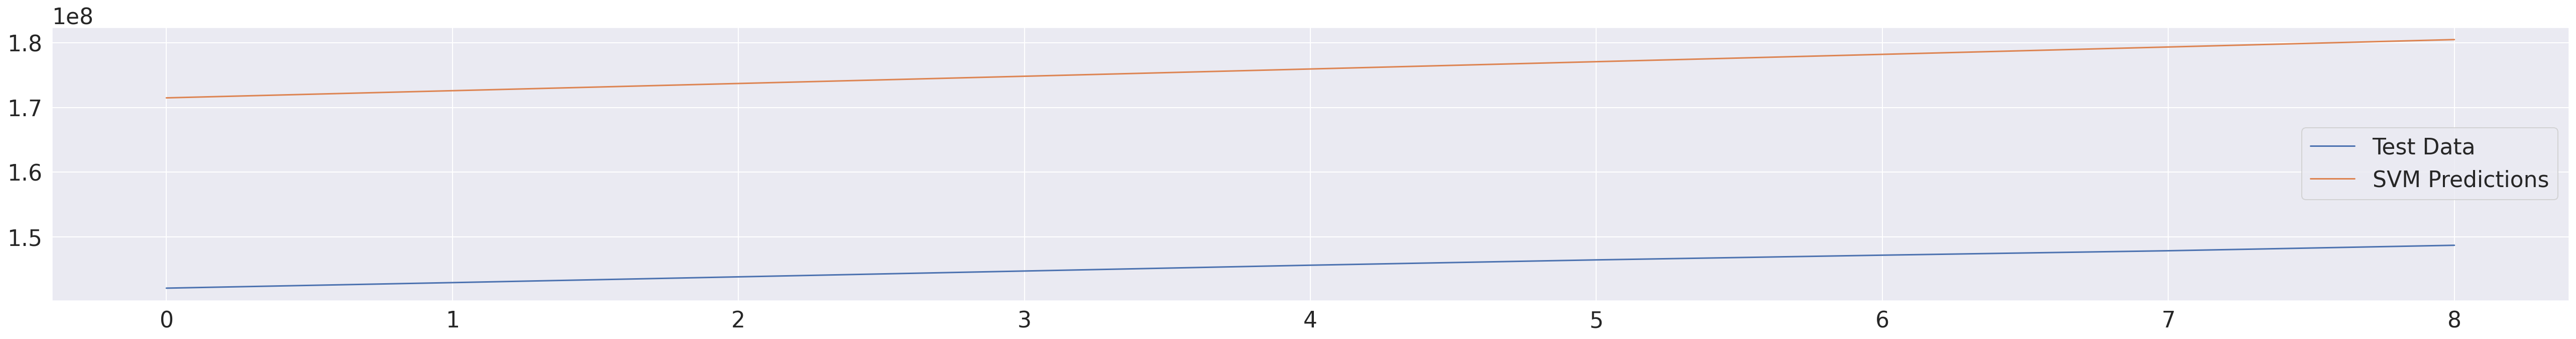

In [ ]:
# check against testing data
plt.figure(figsize=(40, 5))

svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(y_test_confirmed)
plt.plot(svm_test_pred)
plt.legend(['Test Data', 'SVM Predictions'])
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))

<hr>
<center>
<h4>
<b>
Building A Polyn Model
</b>
</h4>
<hr>
</center>

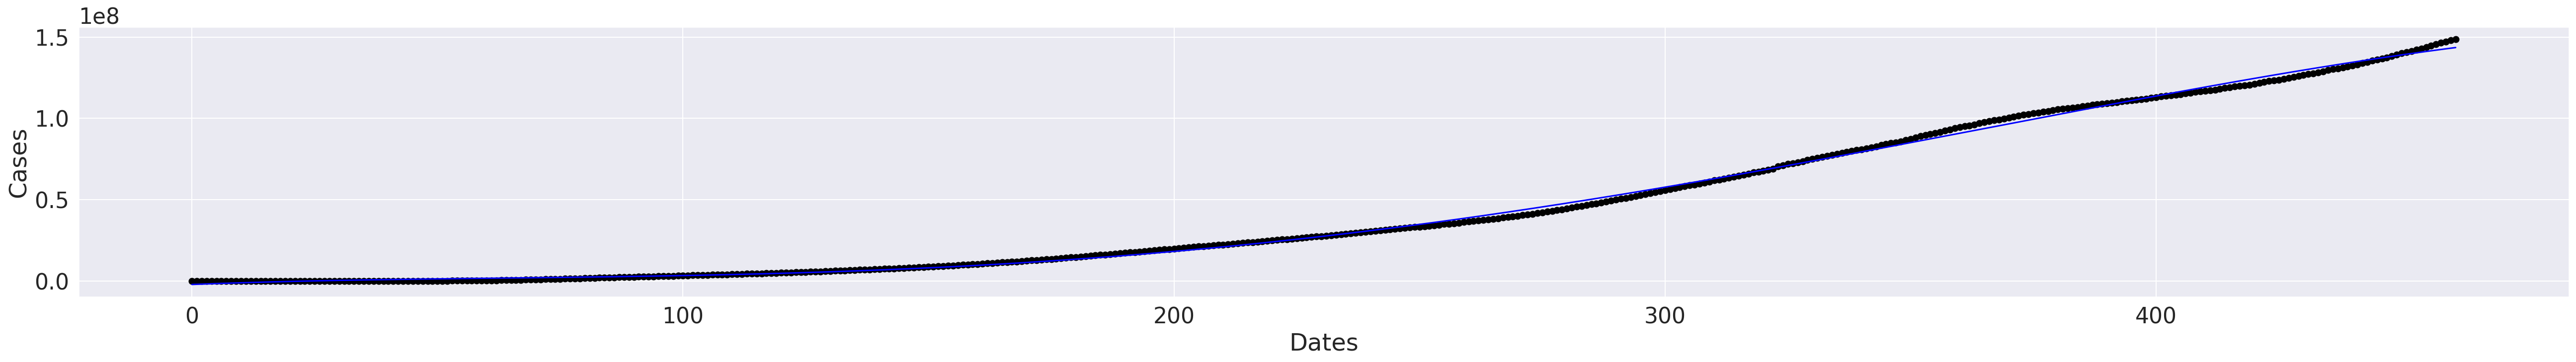

In [ ]:
X=days_since_1_22
y=world_cases

poly = PolynomialFeatures(degree =4) 
X_poly = poly.fit_transform(X) 
  
poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y) 
pred = lin2.predict(X_poly)
new_X, new_y = zip(*sorted(zip(X, pred)))

plt.figure(figsize=(40, 5))
plt.scatter(
    X,
    y,
    c='black'
)
plt.plot(
    new_X, new_y,
    c='blue'
)
plt.xlabel("Dates")
plt.ylabel("Cases")
plt.show()

In [ ]:
# transform our data for polynomial regression
poly = PolynomialFeatures(degree=4)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forcast = poly.fit_transform(future_forcast)



In [ ]:
# polynomial regression
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))

MAE: 7769666.376625531
MSE: 62579744652441.625


In [ ]:
print(linear_model.coef_)

[[-1.66380330e+07  4.48535624e+05 -3.78160263e+03  1.53692627e+01
  -1.66836582e-02]]


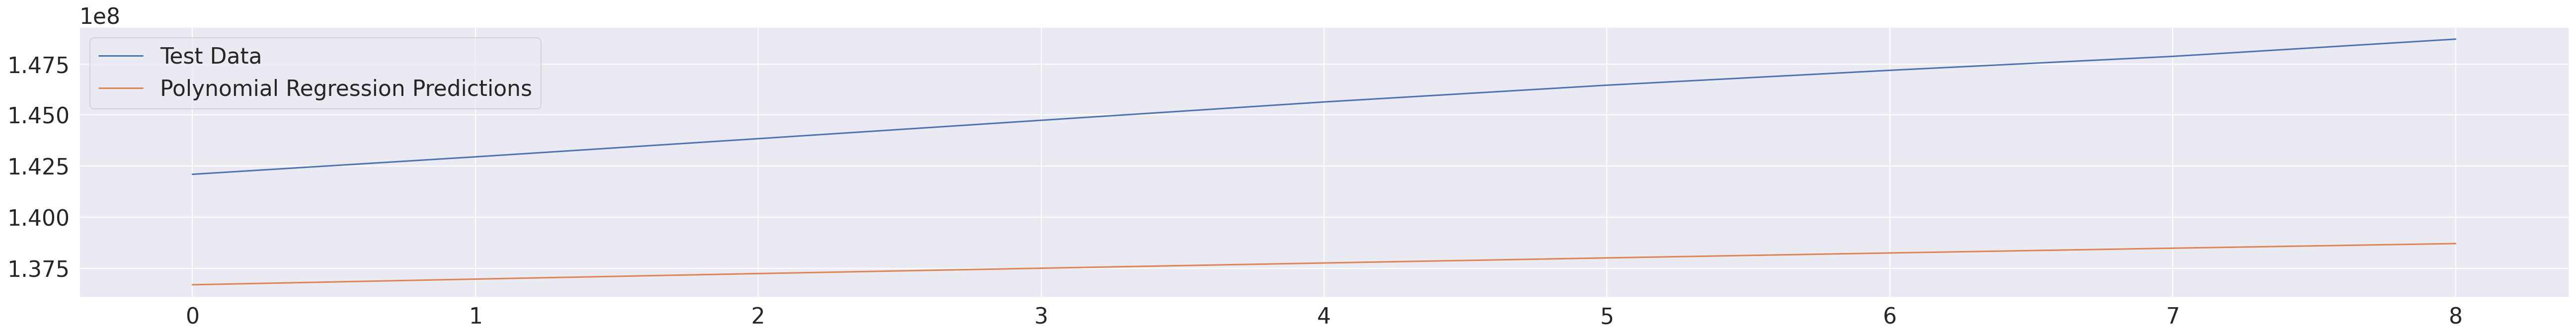

In [ ]:
plt.figure(figsize=(40, 5))
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)
plt.legend(['Test Data', 'Polynomial Regression Predictions'])

<hr>
<center>
<h4>
<b>
Building A Ridge Model
</b>
</h4>
<hr>
</center>

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    1.4s finished


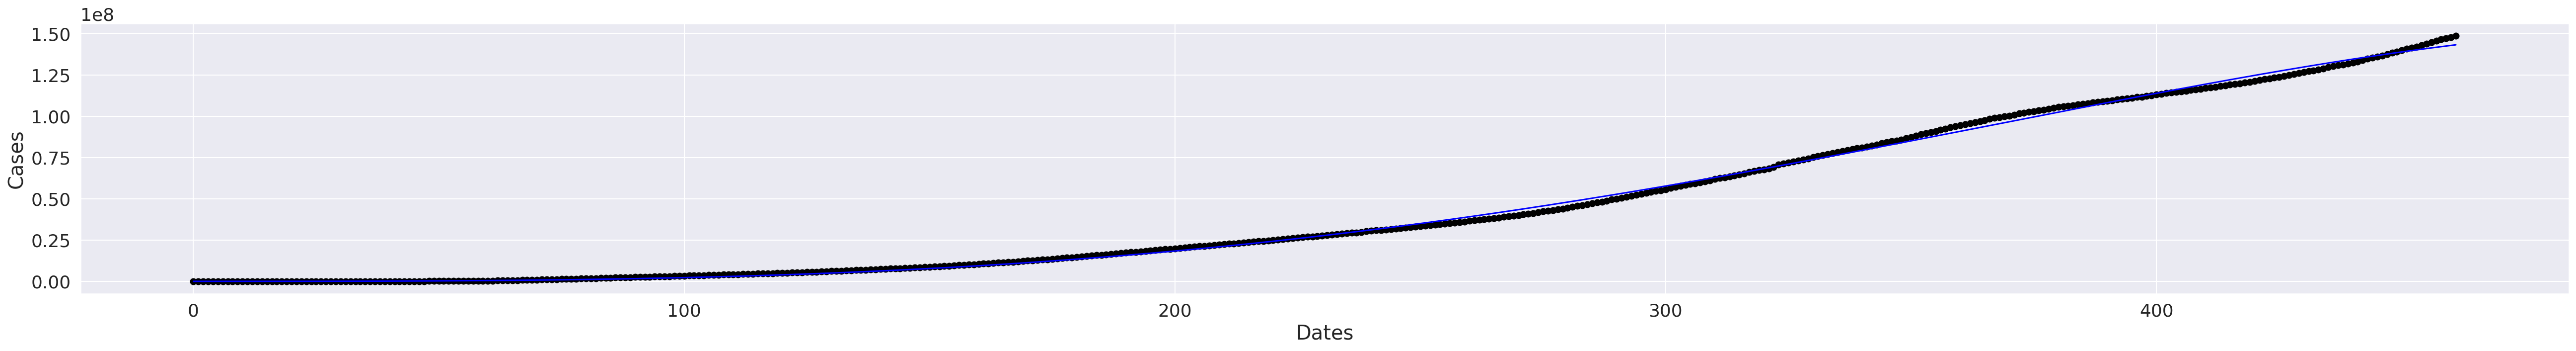

In [ ]:
X=days_since_1_22
y=world_cases

# bayesian ridge polynomial regression
tol = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
normalize = [True, False]

bayesian_grid = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 'lambda_1': lambda_1, 'lambda_2' : lambda_2, 
                 'normalize' : normalize}

bayesian = BayesianRidge(fit_intercept=False)


bayesian_poly = PolynomialFeatures(degree=5)
bayesian_poly_X_test_confirmed = bayesian_poly.fit_transform(X)
bayesian_poly_future_forcast = bayesian_poly.fit_transform(future_forcast)
  

bayesian = BayesianRidge(fit_intercept=False)
bayesian_search = RandomizedSearchCV(bayesian, bayesian_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
bayesian_search.fit(bayesian_poly_X_test_confirmed, y)


bayesian_confirmed = bayesian_search.best_estimator_
test_bayesian_pred = bayesian_confirmed.predict(bayesian_poly_X_test_confirmed)
bayesian_pred = bayesian_confirmed.predict(bayesian_poly_X_test_confirmed)


new_X, new_y = zip(*sorted(zip(X,bayesian_pred)))

plt.figure(figsize=(40, 5))
plt.scatter(
    X,
    y,
    c='black'
)
plt.plot(
    new_X, new_y,
    c='blue'
)
plt.xlabel("Dates")
plt.ylabel("Cases")
plt.show()

In [ ]:

bayesian_poly = PolynomialFeatures(degree=5)
bayesian_poly_X_train_confirmed = bayesian_poly.fit_transform(X_train_confirmed)
bayesian_poly_X_test_confirmed = bayesian_poly.fit_transform(X_test_confirmed)
bayesian_poly_future_forcast = bayesian_poly.fit_transform(future_forcast)


In [ ]:
# bayesian ridge polynomial regression
tol = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
normalize = [True, False]

bayesian_grid = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 'lambda_1': lambda_1, 'lambda_2' : lambda_2, 
                 'normalize' : normalize}

bayesian = BayesianRidge(fit_intercept=False)
bayesian_search = RandomizedSearchCV(bayesian, bayesian_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
bayesian_search.fit(bayesian_poly_X_train_confirmed, y_train_confirmed)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    0.4s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=BayesianRidge(alpha_1=1e-06, alpha_2=1e-06,
                                           alpha_init=None, compute_score=False,
                                           copy_X=True, fit_intercept=False,
                                           lambda_1=1e-06, lambda_2=1e-06,
                                           lambda_init=None, n_iter=300,
                                           normalize=False, tol=0.001,
                                           verbose=False),
                   iid='deprecated', n_iter=40, n_jobs=-1,
                   param_distributions={'alpha_1': [1e-07, 1e-06, 1e-05, 0.0001,
                                                    0.001],
                                        'alpha_2': [1e-07, 1e-06, 1e-05, 0.0001,
                                                    0.001],
                                        'lambda_1': [1e-07, 1e-06, 1e-05,
                                  

In [ ]:
bayesian_search.best_params_

{'alpha_1': 1e-07,
 'alpha_2': 1e-06,
 'lambda_1': 0.001,
 'lambda_2': 1e-06,
 'normalize': False,
 'tol': 0.01}

In [ ]:

bayesian_confirmed = bayesian_search.best_estimator_
test_bayesian_pred = bayesian_confirmed.predict(bayesian_poly_X_test_confirmed)
bayesian_pred = bayesian_confirmed.predict(bayesian_poly_future_forcast)
print('MAE:', mean_absolute_error(test_bayesian_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_bayesian_pred, y_test_confirmed))


MAE: 6579384.048095739
MSE: 45116829227268.9


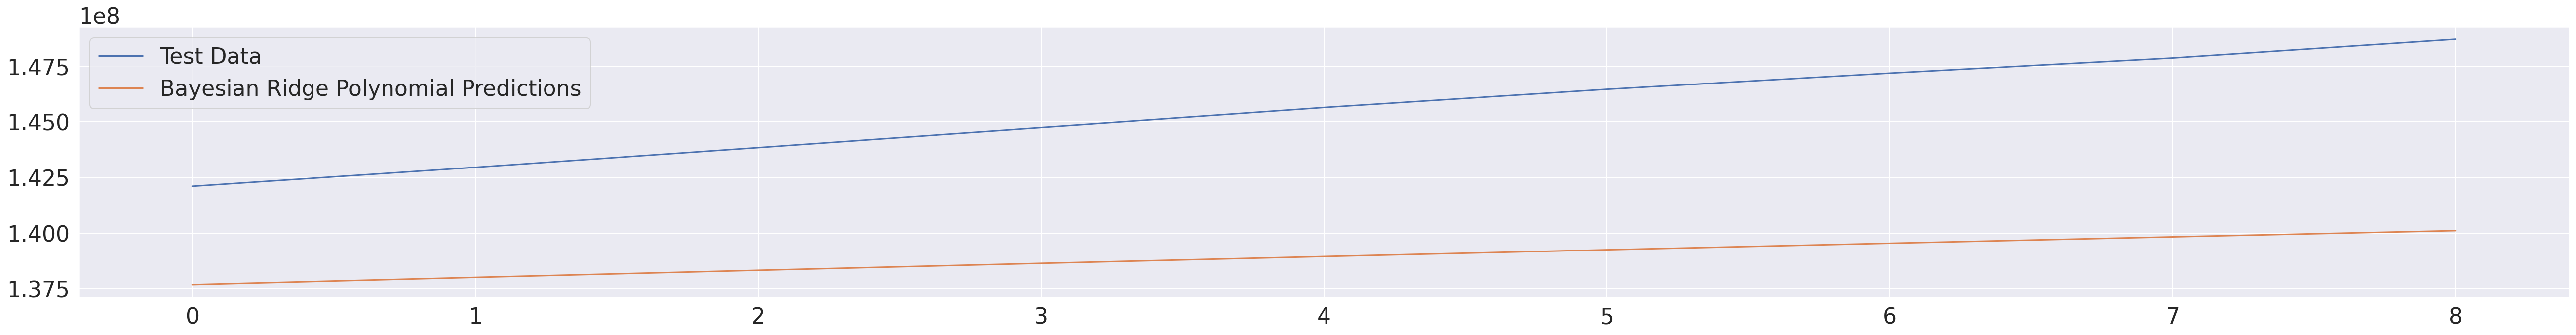

In [ ]:
plt.figure(figsize=(40, 5))
plt.plot(y_test_confirmed)
plt.plot(test_bayesian_pred)
plt.legend(['Test Data', 'Bayesian Ridge Polynomial Predictions'])

# Worldwide Overview 
Graphing the number of confirmed cases, deaths, and mortality rate (CFR). This gives us a big picture of the ongoing pandemic. 
 <a id='world_wide_graphs'></a>

In [ ]:
# helper method for flattening the data, so it can be displayed on a bar graph 
def flatten(arr):
    a = [] 
    arr = arr.tolist()
    for i in arr:
        a.append(i[0])
    return a

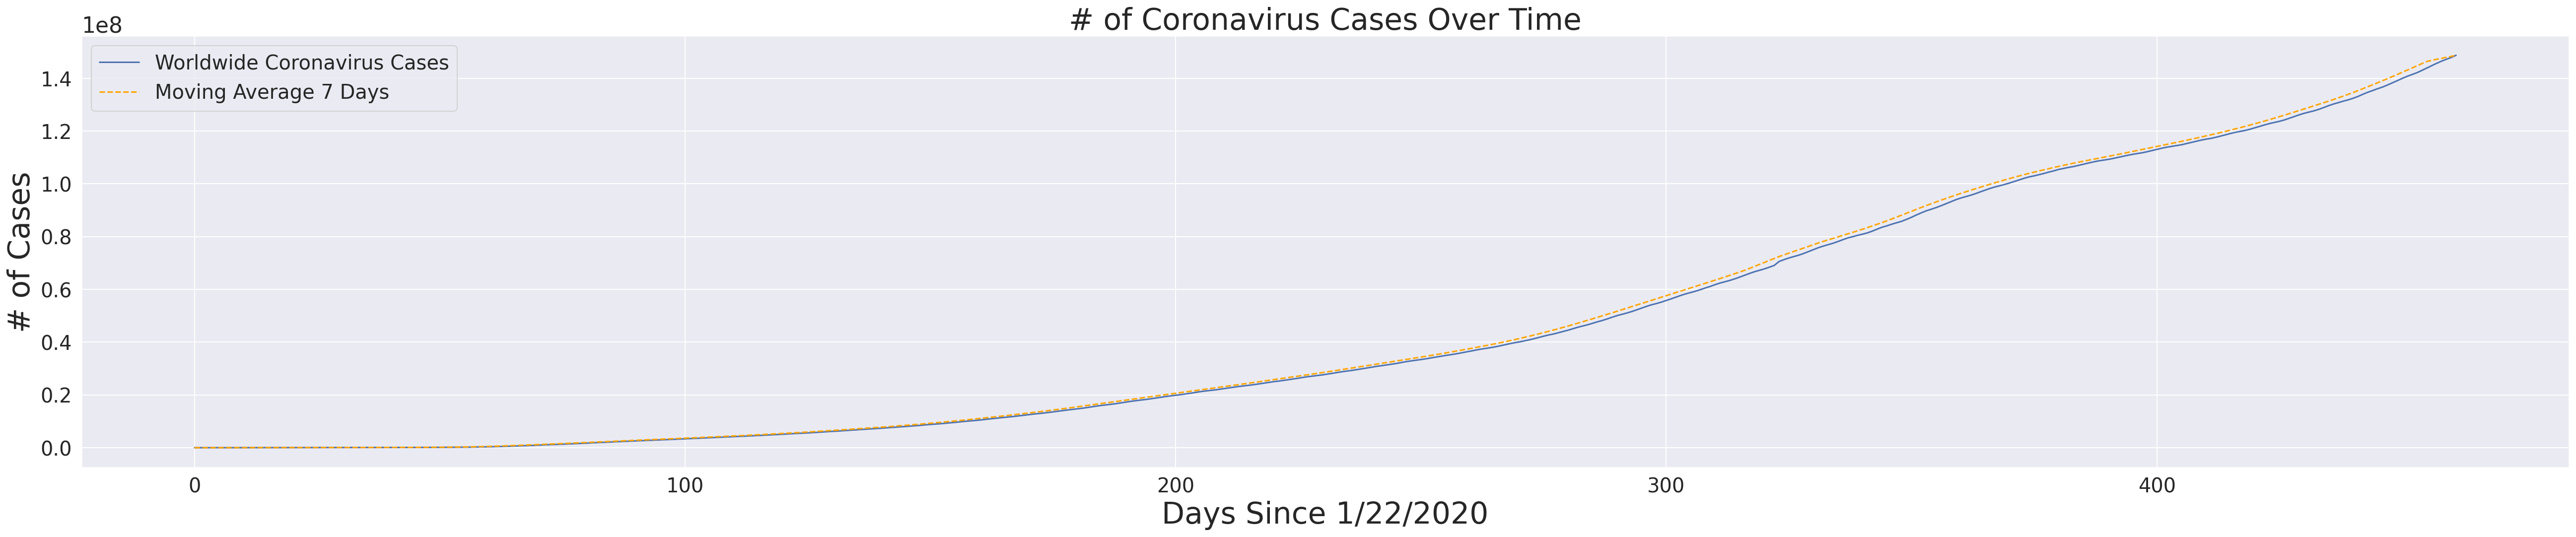

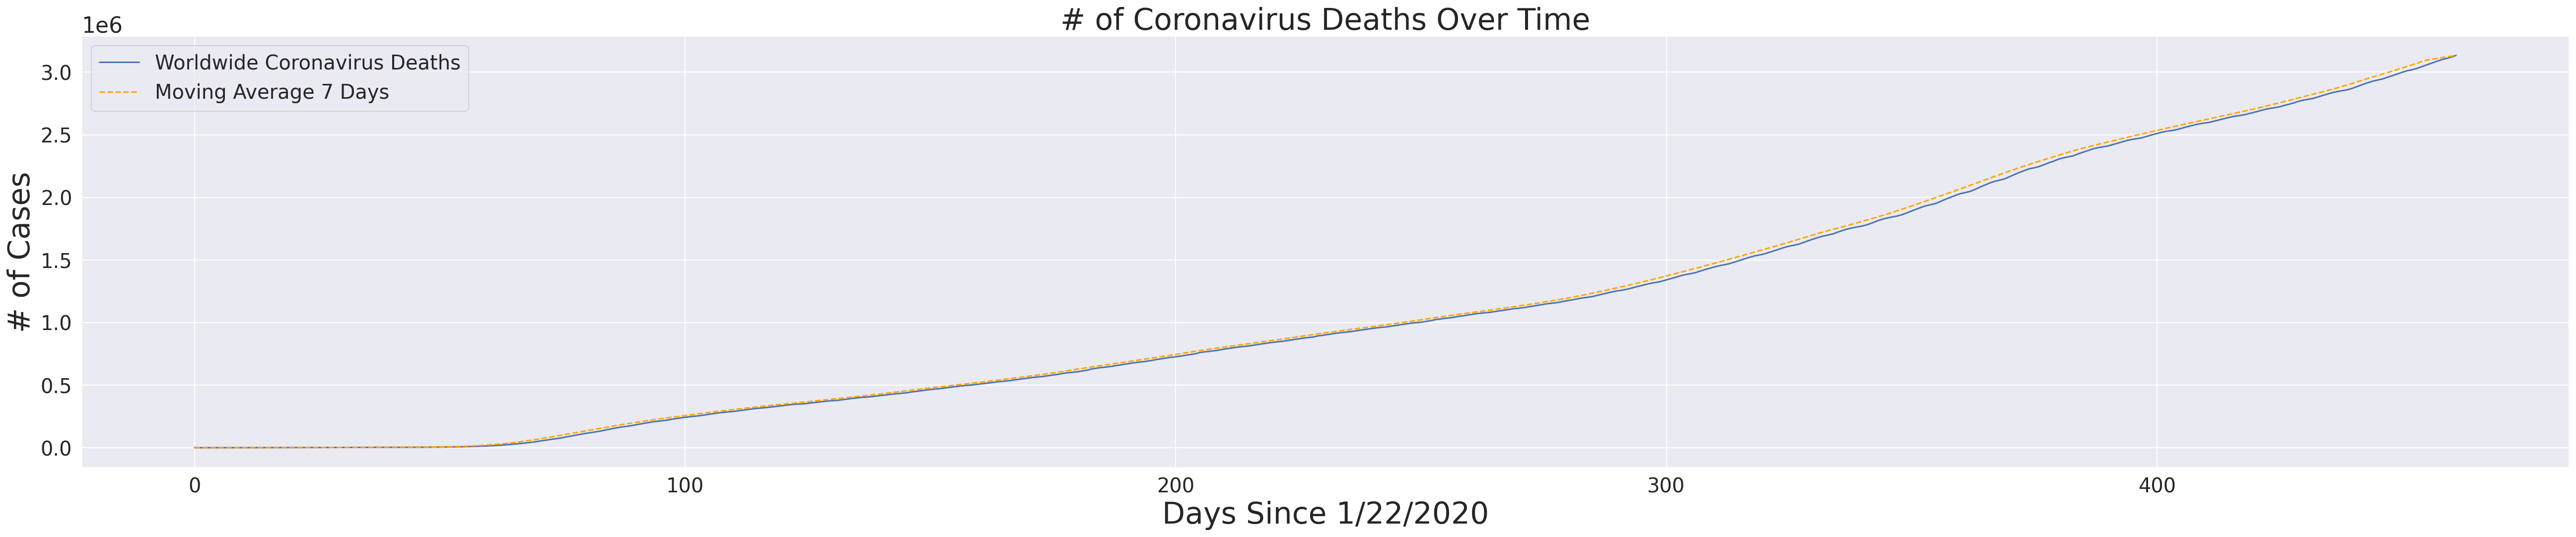

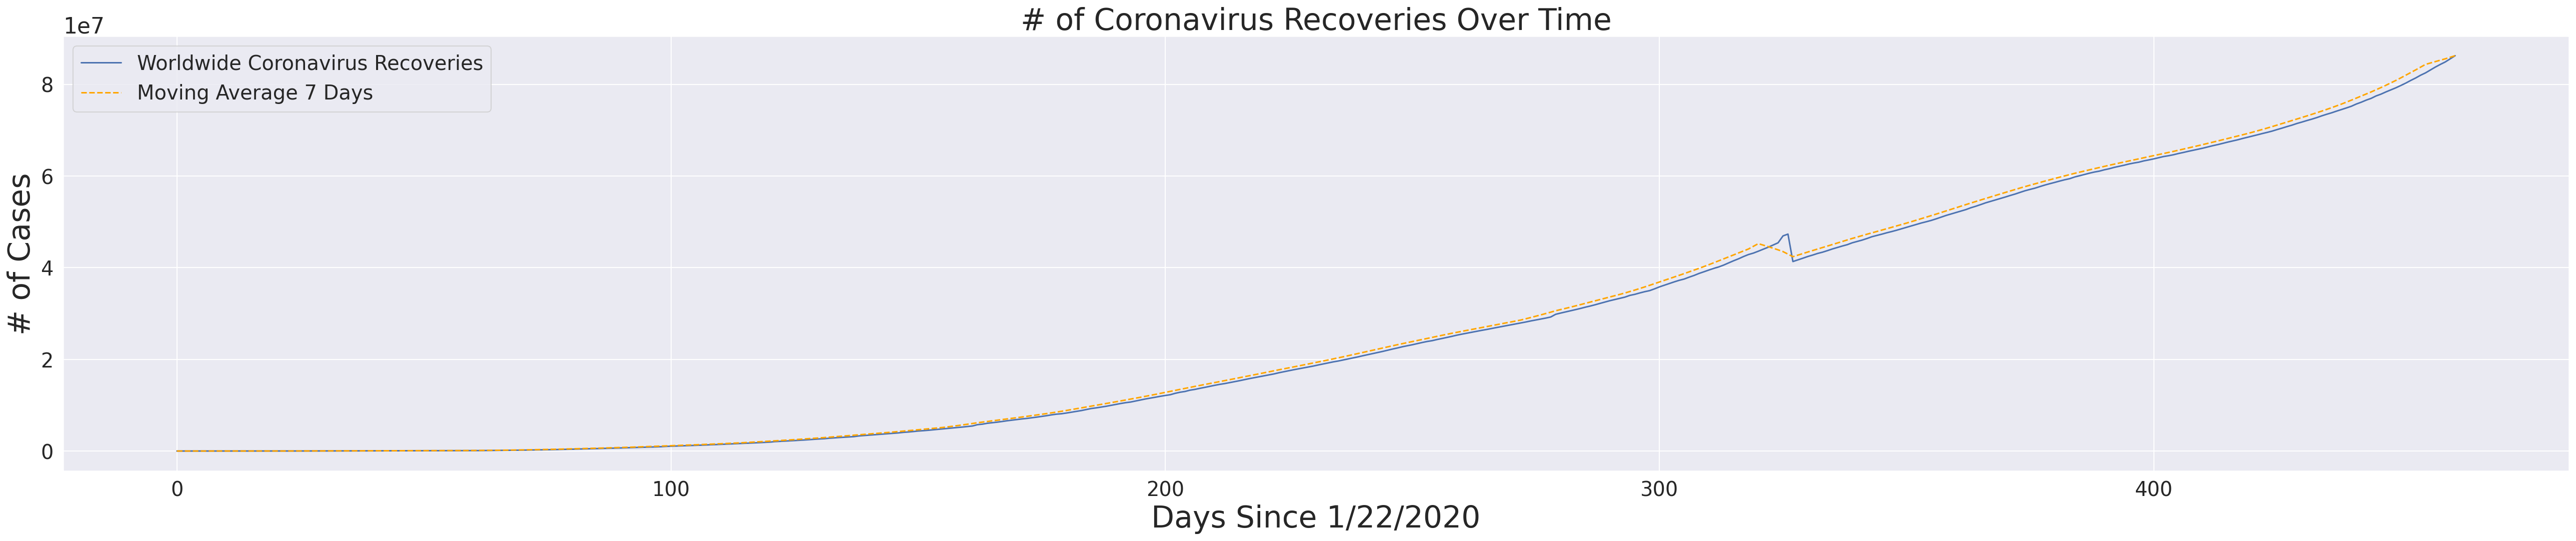

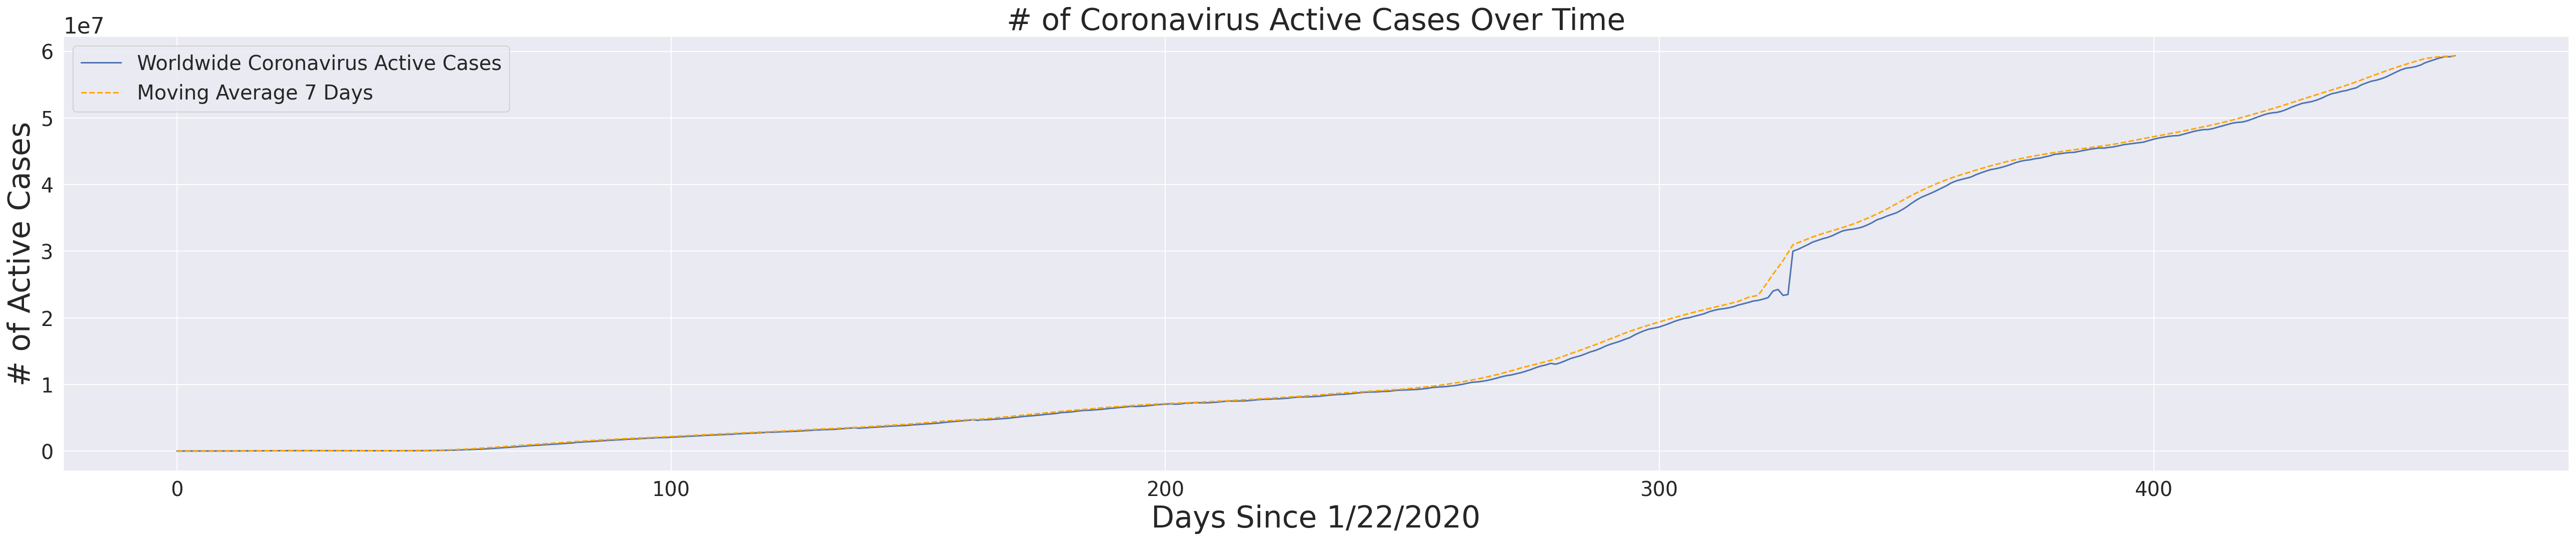

In [ ]:
adjusted_dates = adjusted_dates.reshape(1, -1)[0]
plt.figure(figsize=(40, 8))
plt.plot(adjusted_dates, world_cases)
plt.plot(adjusted_dates, world_confirmed_avg, linestyle='dashed', color='orange')
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Worldwide Coronavirus Cases', 'Moving Average {} Days'.format(window)], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(40,8))
plt.plot(adjusted_dates, total_deaths)
plt.plot(adjusted_dates, world_death_avg, linestyle='dashed', color='orange')
plt.title('# of Coronavirus Deaths Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Worldwide Coronavirus Deaths', 'Moving Average {} Days'.format(window)], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(40, 8))
plt.plot(adjusted_dates, total_recovered)
plt.plot(adjusted_dates, world_recovery_avg, linestyle='dashed', color='orange')
plt.title('# of Coronavirus Recoveries Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Worldwide Coronavirus Recoveries', 'Moving Average {} Days'.format(window)], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(40, 8))
plt.plot(adjusted_dates, total_active)
plt.plot(adjusted_dates, world_active_avg, linestyle='dashed', color='orange')
plt.title('# of Coronavirus Active Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Active Cases', size=30)
plt.legend(['Worldwide Coronavirus Active Cases', 'Moving Average {} Days'.format(window)], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

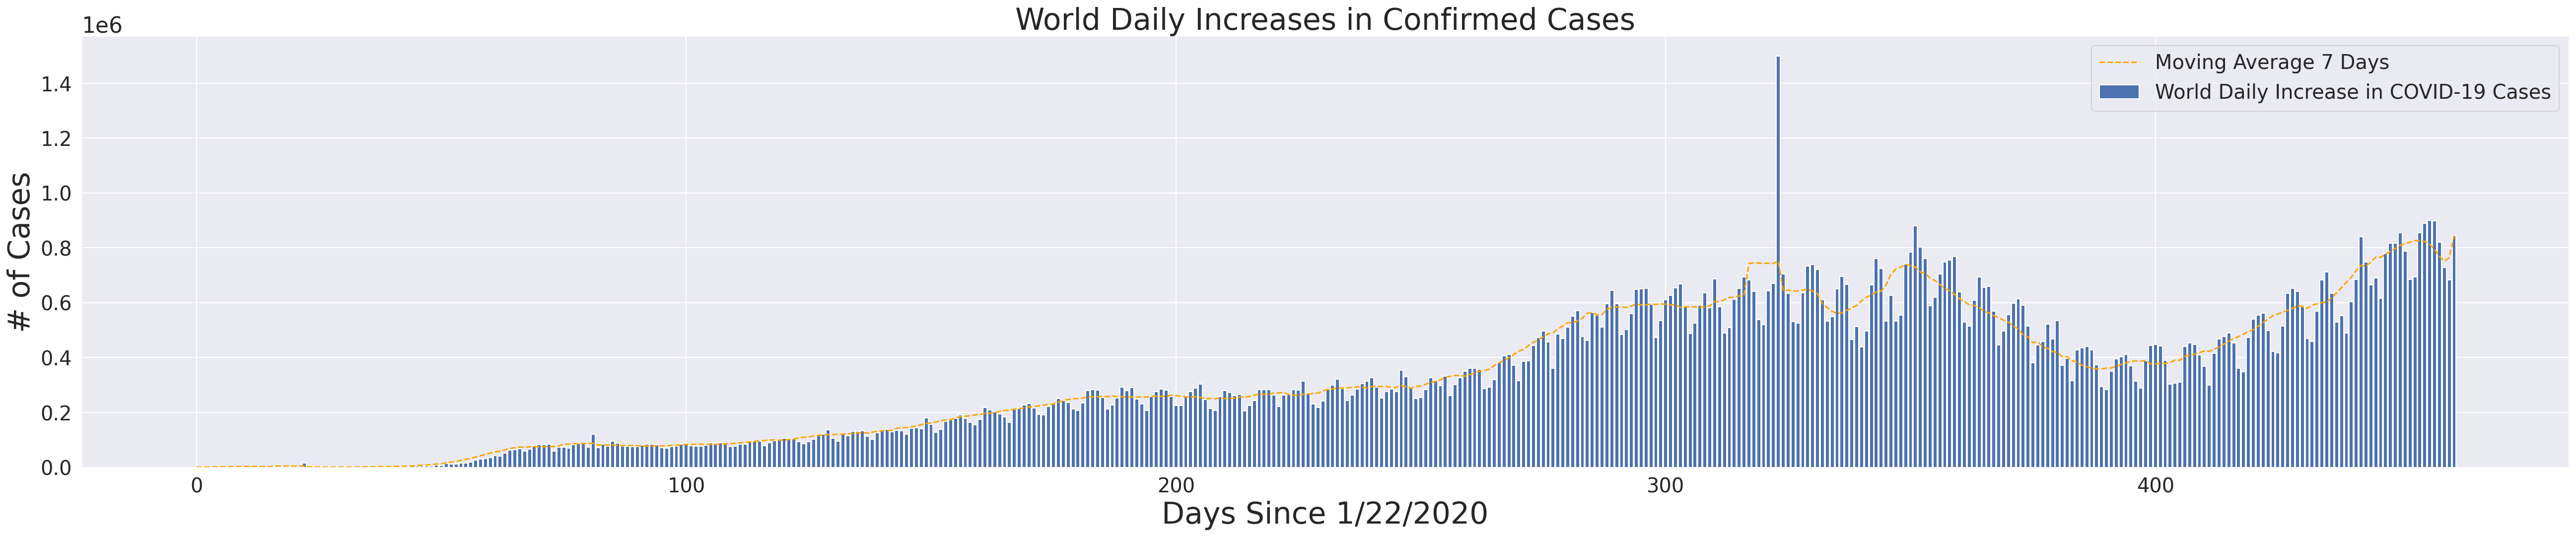

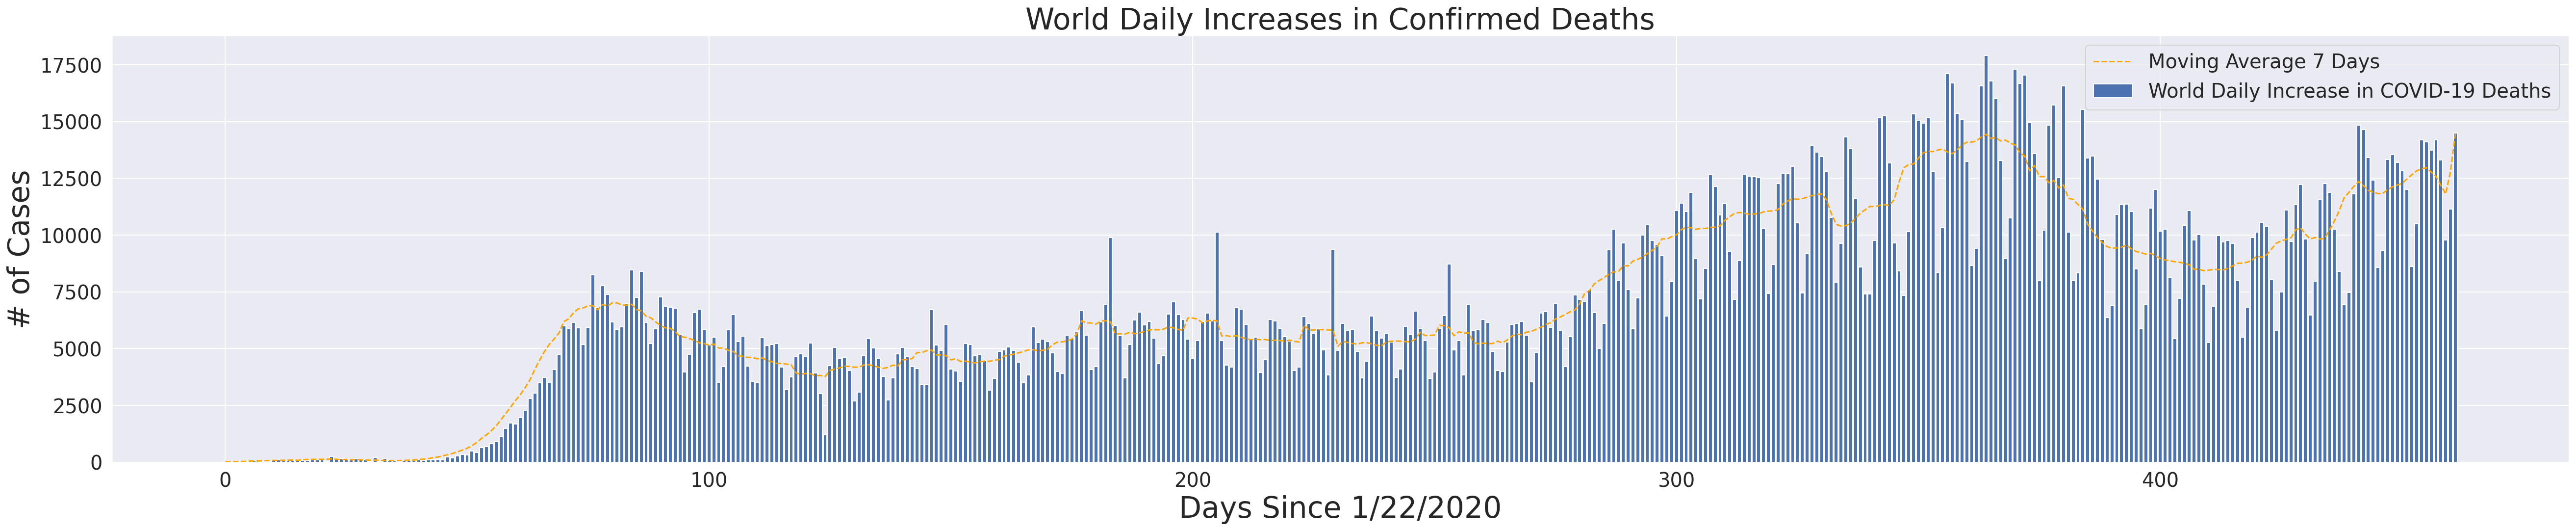

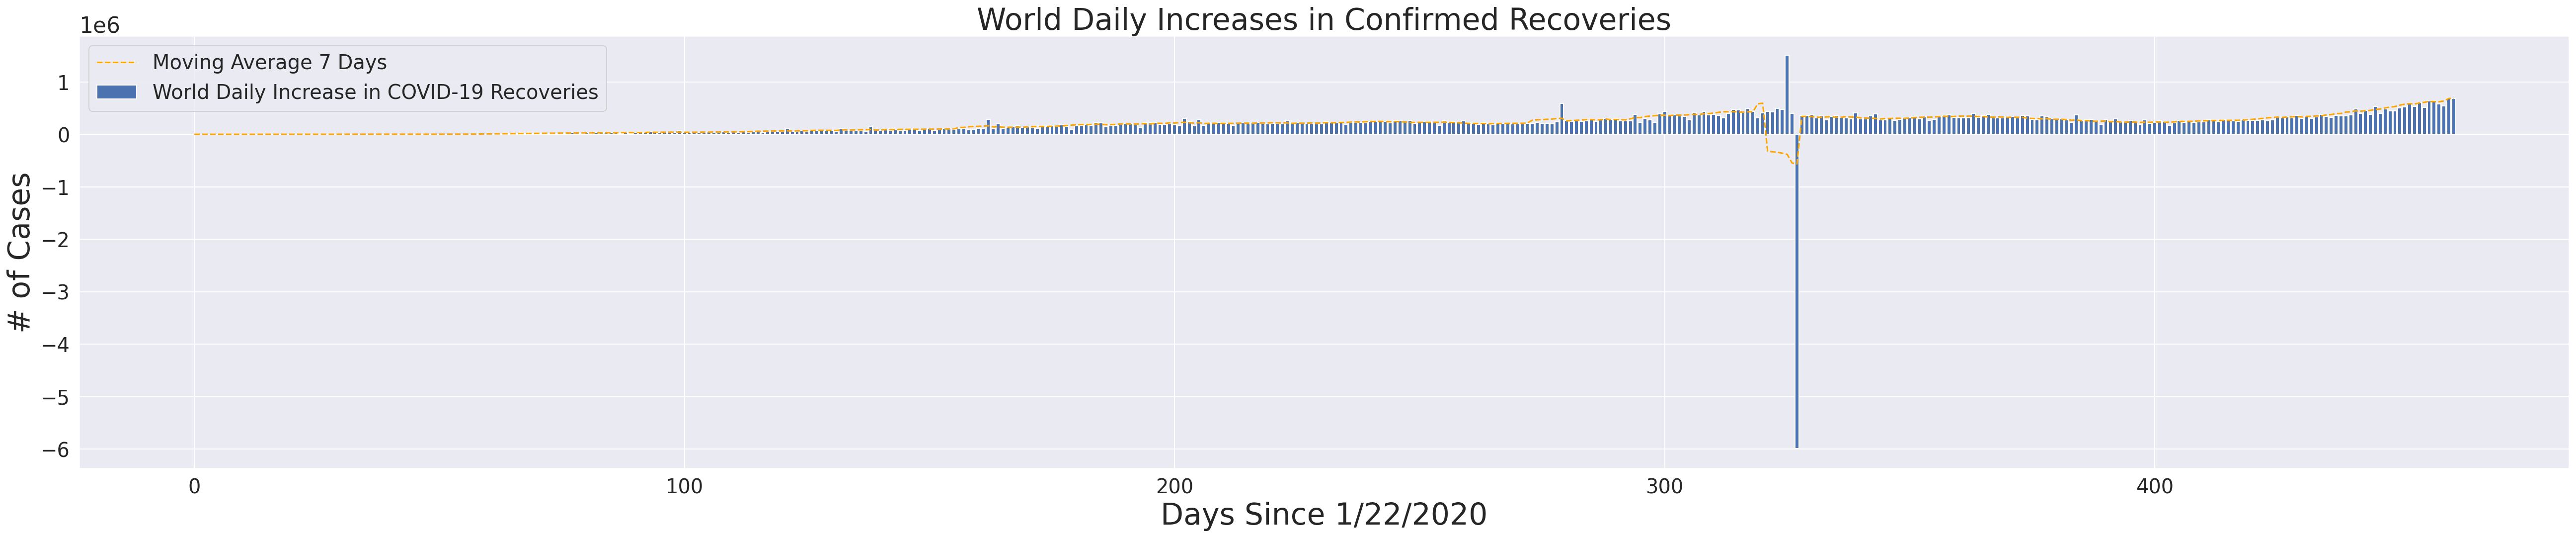

In [ ]:
plt.figure(figsize=(40, 8))
plt.bar(adjusted_dates, world_daily_increase)
plt.plot(adjusted_dates, world_daily_increase_avg, color='orange', linestyle='dashed')
plt.title('World Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Moving Average {} Days'.format(window), 'World Daily Increase in COVID-19 Cases'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(40, 8))
plt.bar(adjusted_dates, world_daily_death)
plt.plot(adjusted_dates, world_daily_death_avg, color='orange', linestyle='dashed')
plt.title('World Daily Increases in Confirmed Deaths', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Moving Average {} Days'.format(window), 'World Daily Increase in COVID-19 Deaths'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(40, 8))
plt.bar(adjusted_dates, world_daily_recovery)
plt.plot(adjusted_dates, world_daily_recovery_avg, color='orange', linestyle='dashed')
plt.title('World Daily Increases in Confirmed Recoveries', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Moving Average {} Days'.format(window), 'World Daily Increase in COVID-19 Recoveries'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

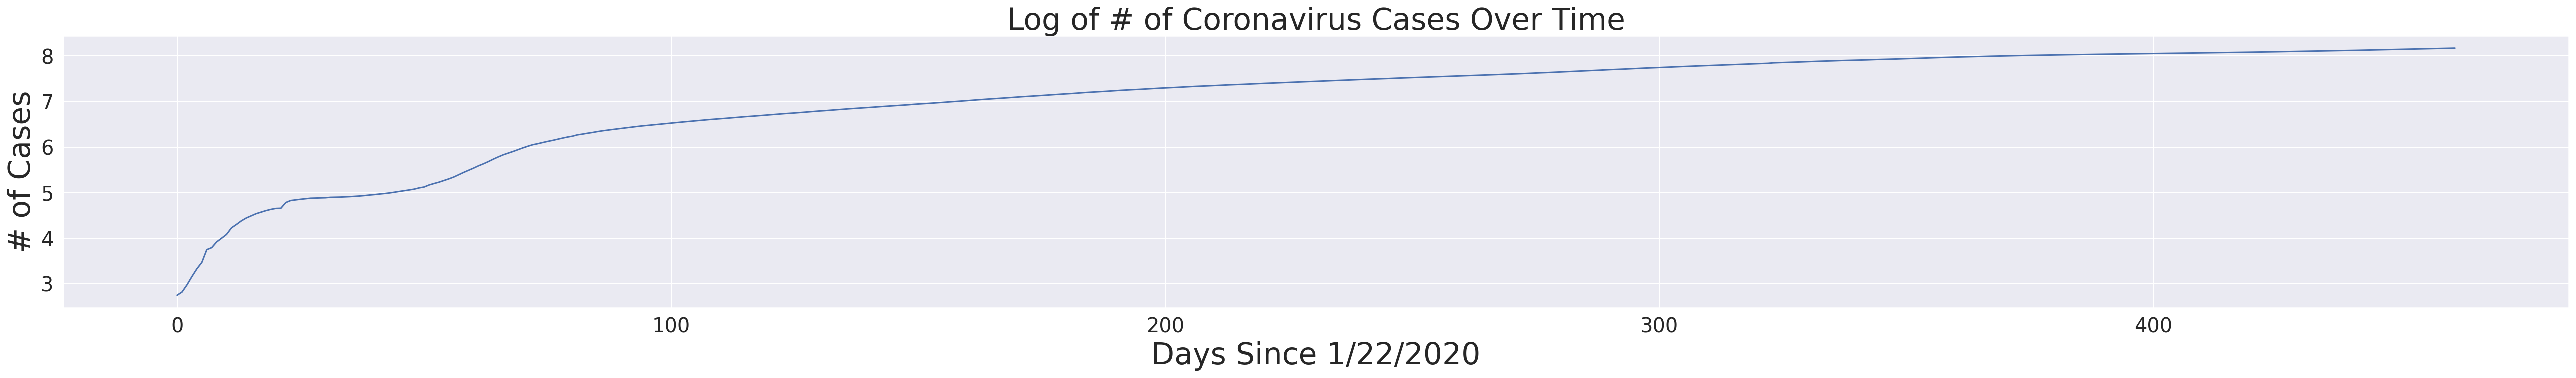

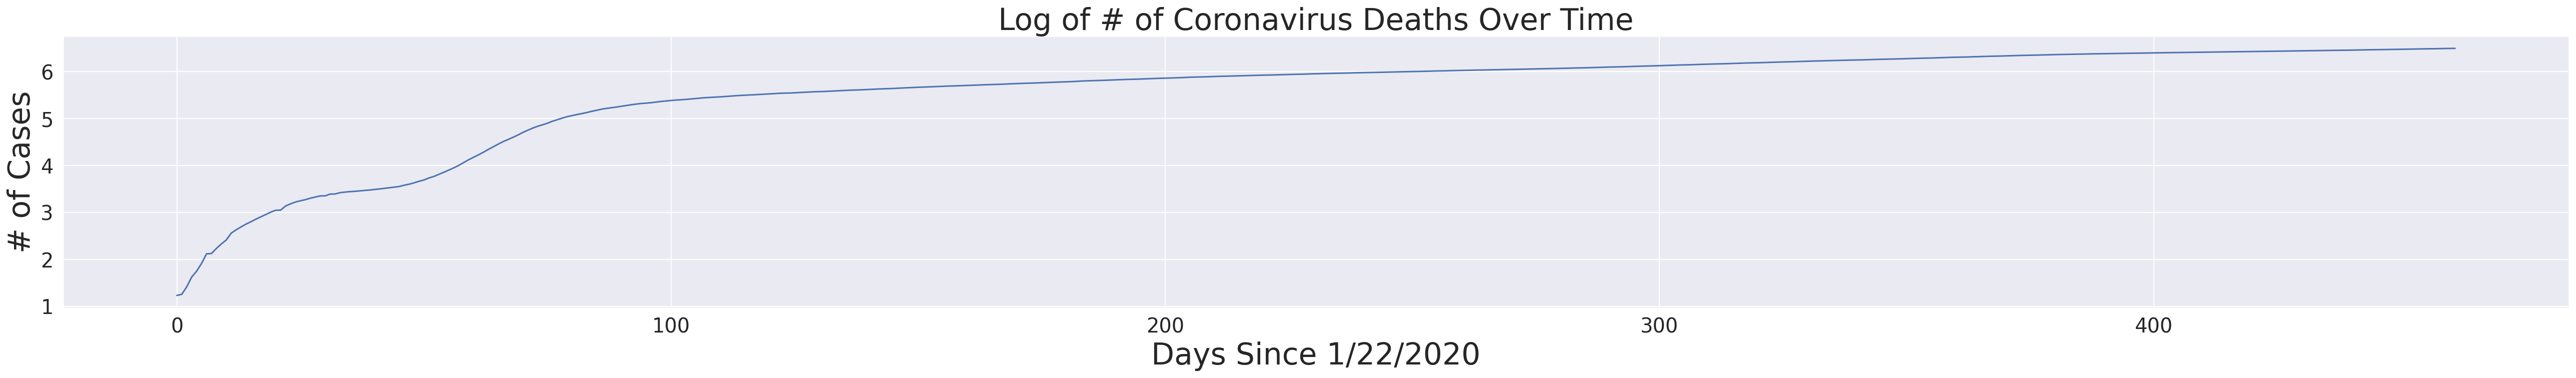

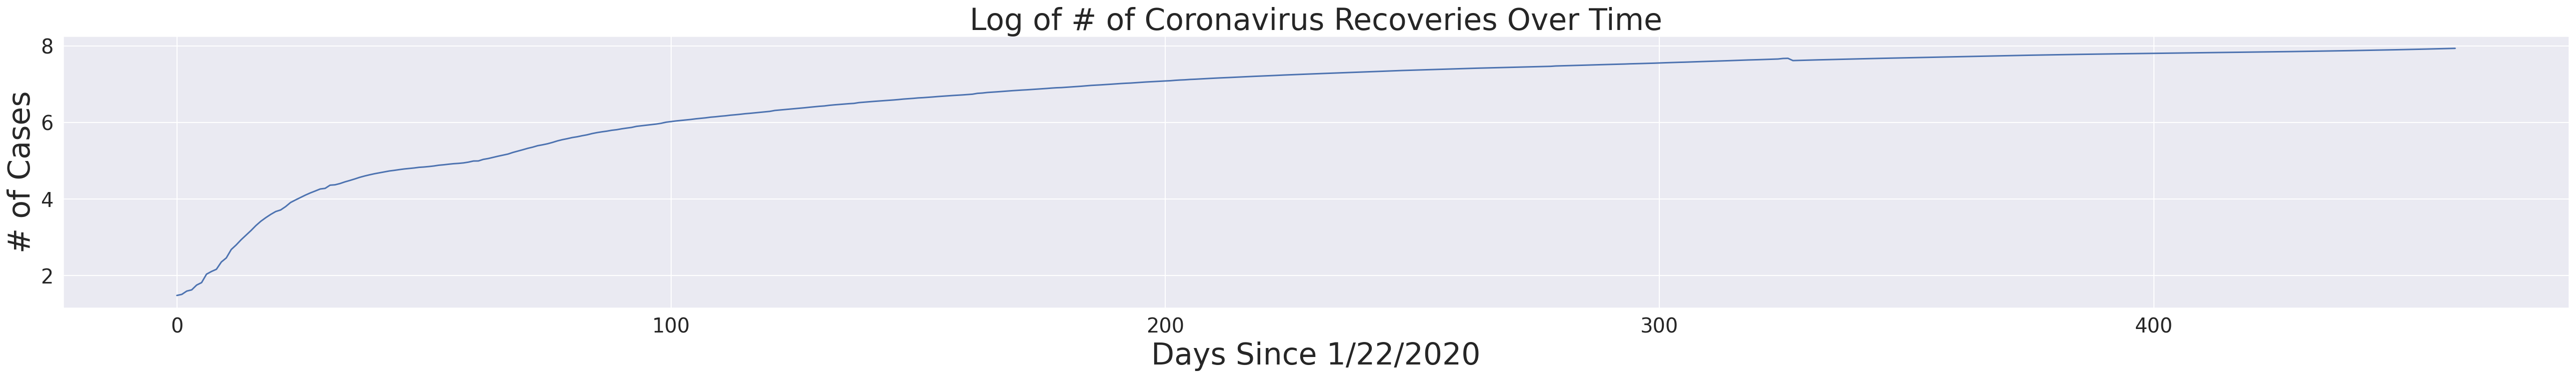

In [ ]:
plt.figure(figsize=(40, 5))
plt.plot(adjusted_dates, np.log10(world_cases))
plt.title('Log of # of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(40, 5))
plt.plot(adjusted_dates, np.log10(total_deaths))
plt.title('Log of # of Coronavirus Deaths Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(40, 5))
plt.plot(adjusted_dates, np.log10(total_recovered))
plt.title('Log of # of Coronavirus Recoveries Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [ ]:
def country_plot(x, y1, y2, y3,y4, country):
    # window is set as 14 in in the beginning of the notebook 
    confirmed_avg = moving_average(y1, window)
    confirmed_increase_avg = moving_average(y2, window)
    death_increase_avg = moving_average(y3, window)
    recovery_increase_avg = moving_average(y4, window)
    
    plt.figure(figsize=(40, 8))
    plt.plot(x, y1)
    plt.plot(x, confirmed_avg, color='red', linestyle='dashed')
    plt.legend(['{} Confirmed Cases'.format(country), 'Moving Average {} Days'.format(window)], prop={'size': 20})
    plt.title('{} Confirmed Cases'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(40, 8))
    plt.bar(x, y2)
    plt.plot(x, confirmed_increase_avg, color='red', linestyle='dashed')
    plt.legend(['Moving Average {} Days'.format(window), '{} Daily Increase in Confirmed Cases'.format(country)], prop={'size': 20})
    plt.title('{} Daily Increases in Confirmed Cases'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(40, 8))
    plt.bar(x, y3)
    plt.plot(x, death_increase_avg, color='red', linestyle='dashed')
    plt.legend(['Moving Average {} Days'.format(window), '{} Daily Increase in Confirmed Deaths'.format(country)], prop={'size': 20})
    plt.title('{} Daily Increases in Deaths'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(40, 8))
    plt.bar(x, y4)
    plt.plot(x, recovery_increase_avg, color='red', linestyle='dashed')
    plt.legend(['Moving Average {} Days'.format(window), '{} Daily Increase in Confirmed Recoveries'.format(country)], prop={'size': 20})
    plt.title('{} Daily Increases in Recoveries'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()
      
# helper function for getting country's cases, deaths, and recoveries        
def get_country_info(country_name):
    country_cases = []
    country_deaths = []
    country_recoveries = []  
    
    for i in dates:
        country_cases.append(confirmed_df[confirmed_df['Country/Region']==country_name][i].sum())
        country_deaths.append(deaths_df[deaths_df['Country/Region']==country_name][i].sum())
        country_recoveries.append(recoveries_df[recoveries_df['Country/Region']==country_name][i].sum())
    return (country_cases, country_deaths,country_recoveries)
    
    
def country_visualizations(country_name):
    country_info = get_country_info(country_name)
    country_cases = country_info[0]
    country_deaths = country_info[1]
    country_recoveries= country_info[2]
    
    country_daily_increase = daily_increase(country_cases)
    country_daily_death = daily_increase(country_deaths)
    country_daily_recovery = daily_increase(country_recoveries)
    
    country_plot(adjusted_dates, country_cases, country_daily_increase, country_daily_death,country_daily_recovery, country_name)
    

# Country Specific Graphs
Unlike the previous section, we are taking a look at specific countries. This allows us to examine the pandemic at a local level. 
<a id='country_graphs'></a>

In [ ]:
countries = ['US', 'Russia', 'India', 'Brazil', 'South Africa', 'China', 'Italy'] 

for country in countries:
    country_visualizations(country)

Output hidden; open in https://colab.research.google.com to view.

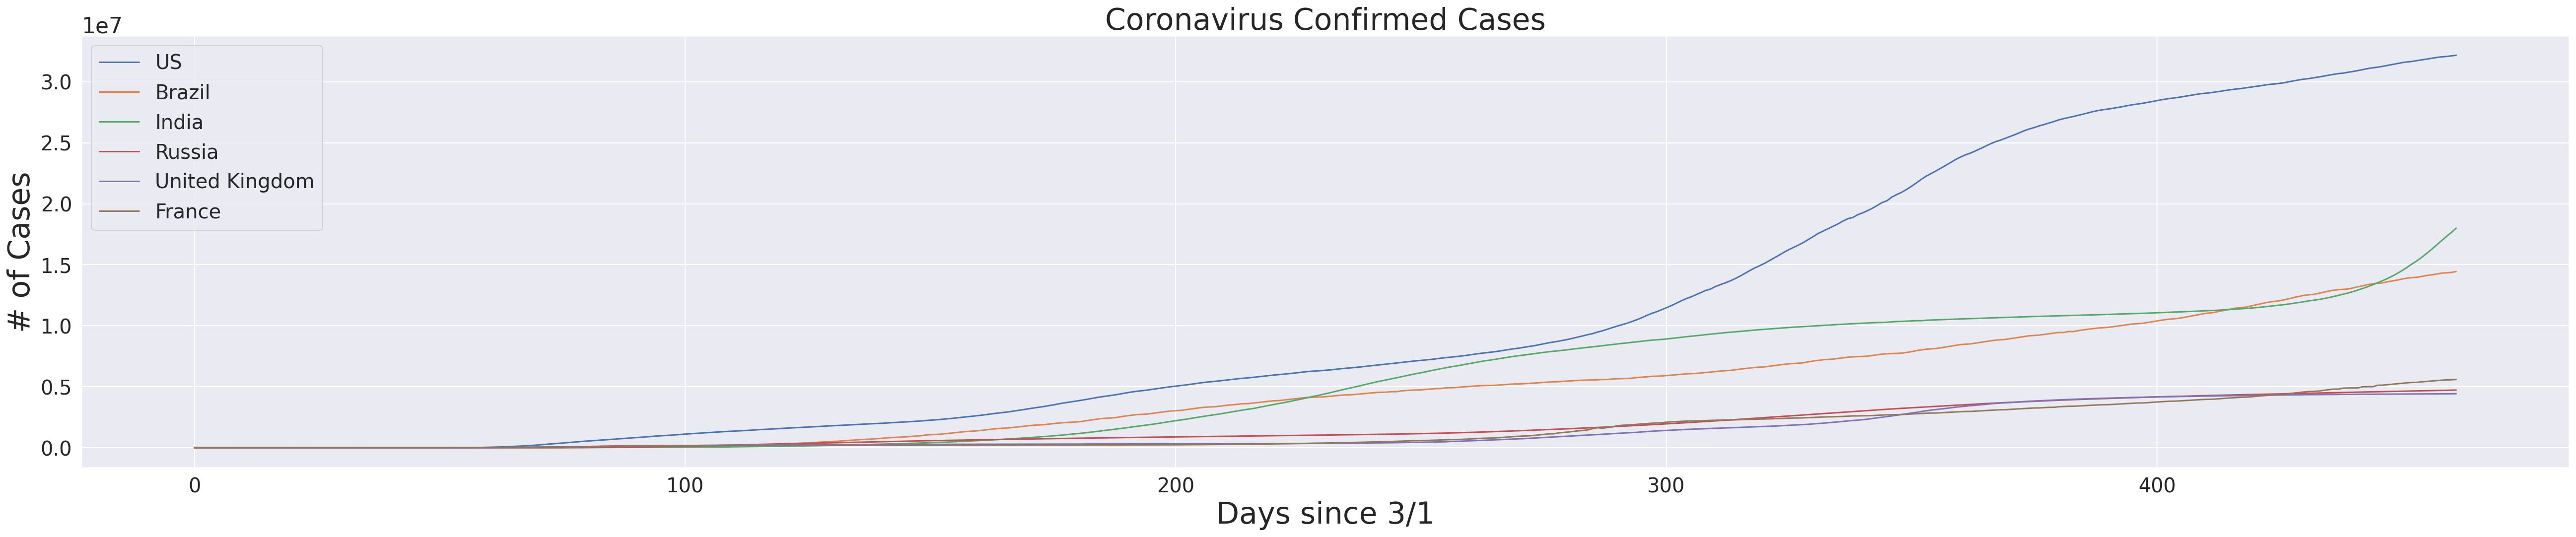

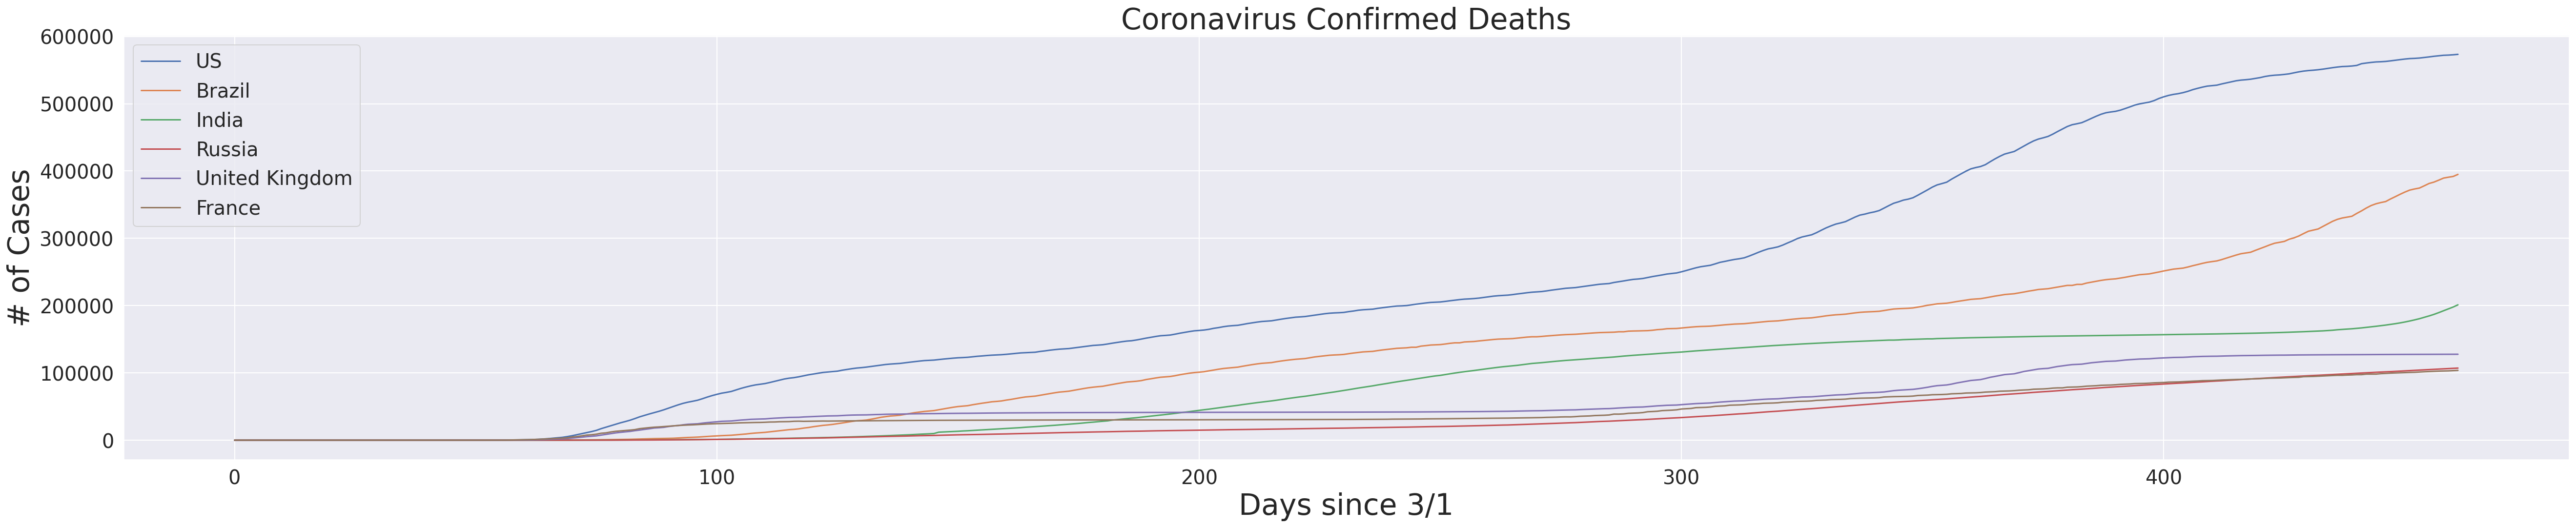

In [ ]:
# Country Comparison
# removed redundant code

compare_countries = ['US', 'Brazil', 'India', 'Russia', 'United Kingdom', 'France'] 
graph_name = ['Coronavirus Confirmed Cases', 'Coronavirus Confirmed Deaths']

for num in range(2):
    plt.figure(figsize=(40,8))
    for country in compare_countries:
        plt.plot(get_country_info(country)[num])
    plt.legend(compare_countries, prop={'size': 20})
    plt.xlabel('Days since 3/1', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.title(graph_name[num], size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

In [ ]:
def plot_predictions(x, y, pred, algo_name, color):
    plt.figure(figsize=(40, 8))
    plt.plot(x, y)
    plt.plot(future_forcast, pred, linestyle='dashed', color=color)
    plt.title('Worldwide Coronavirus Cases Over Time', size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.legend(['Confirmed Cases', algo_name], prop={'size': 20})
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

# Predictions for confirmed coronavirus cases
These three models predict future covid cases  

The prediction models include 
* Support Vector Machine 
* Polynomial Regression 
* Bayesian Ridge Regression 

<a id='prediction'></a>

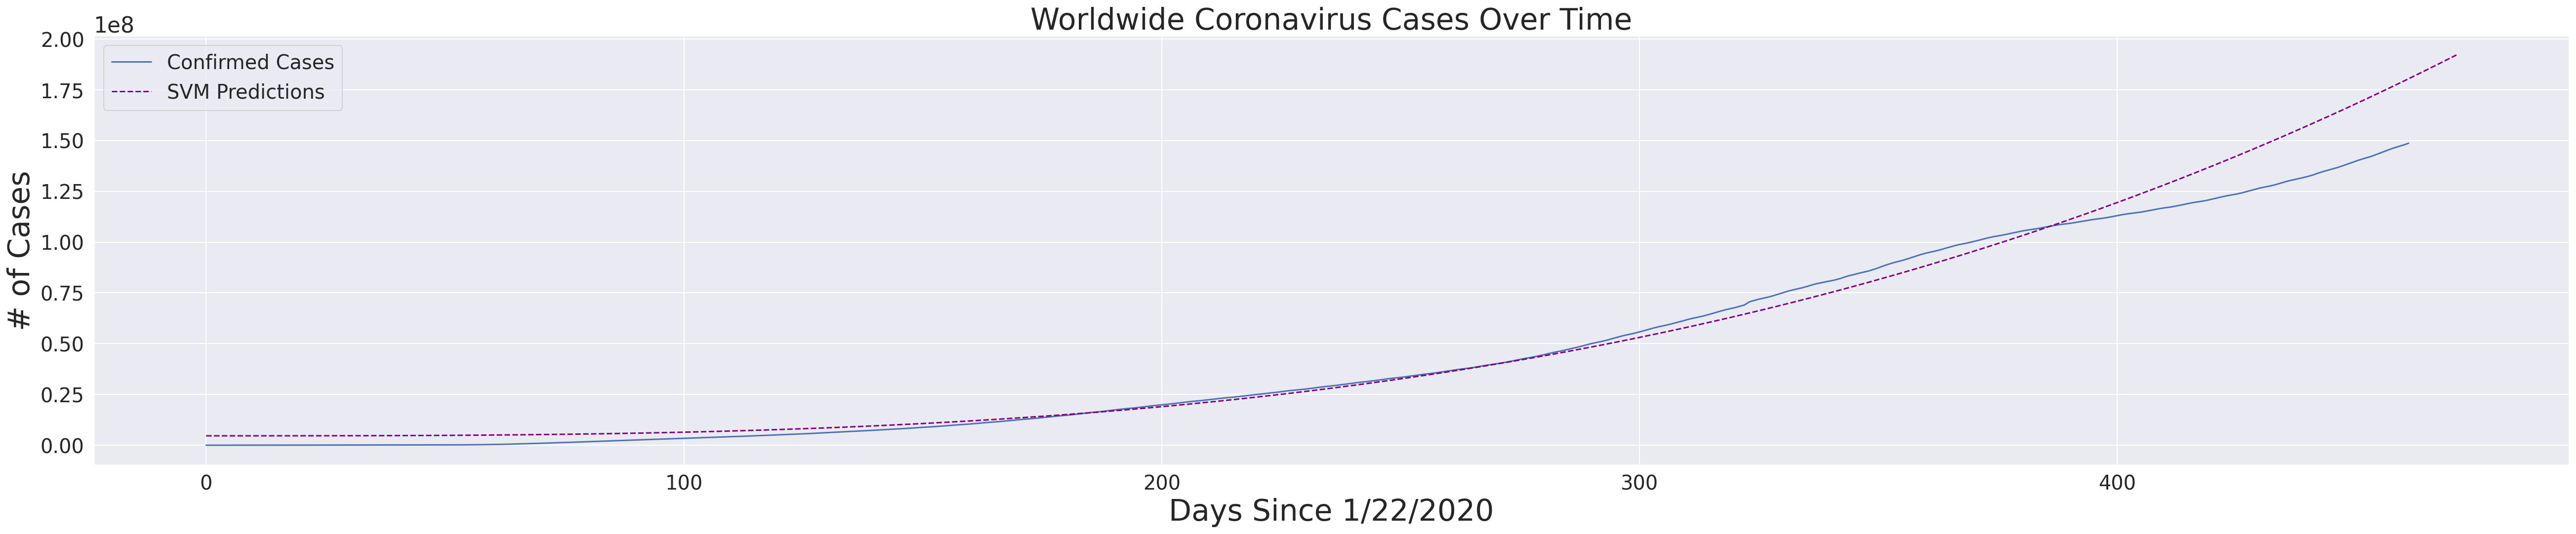

In [ ]:
plot_predictions(adjusted_dates, world_cases, svm_pred, 'SVM Predictions', 'purple')

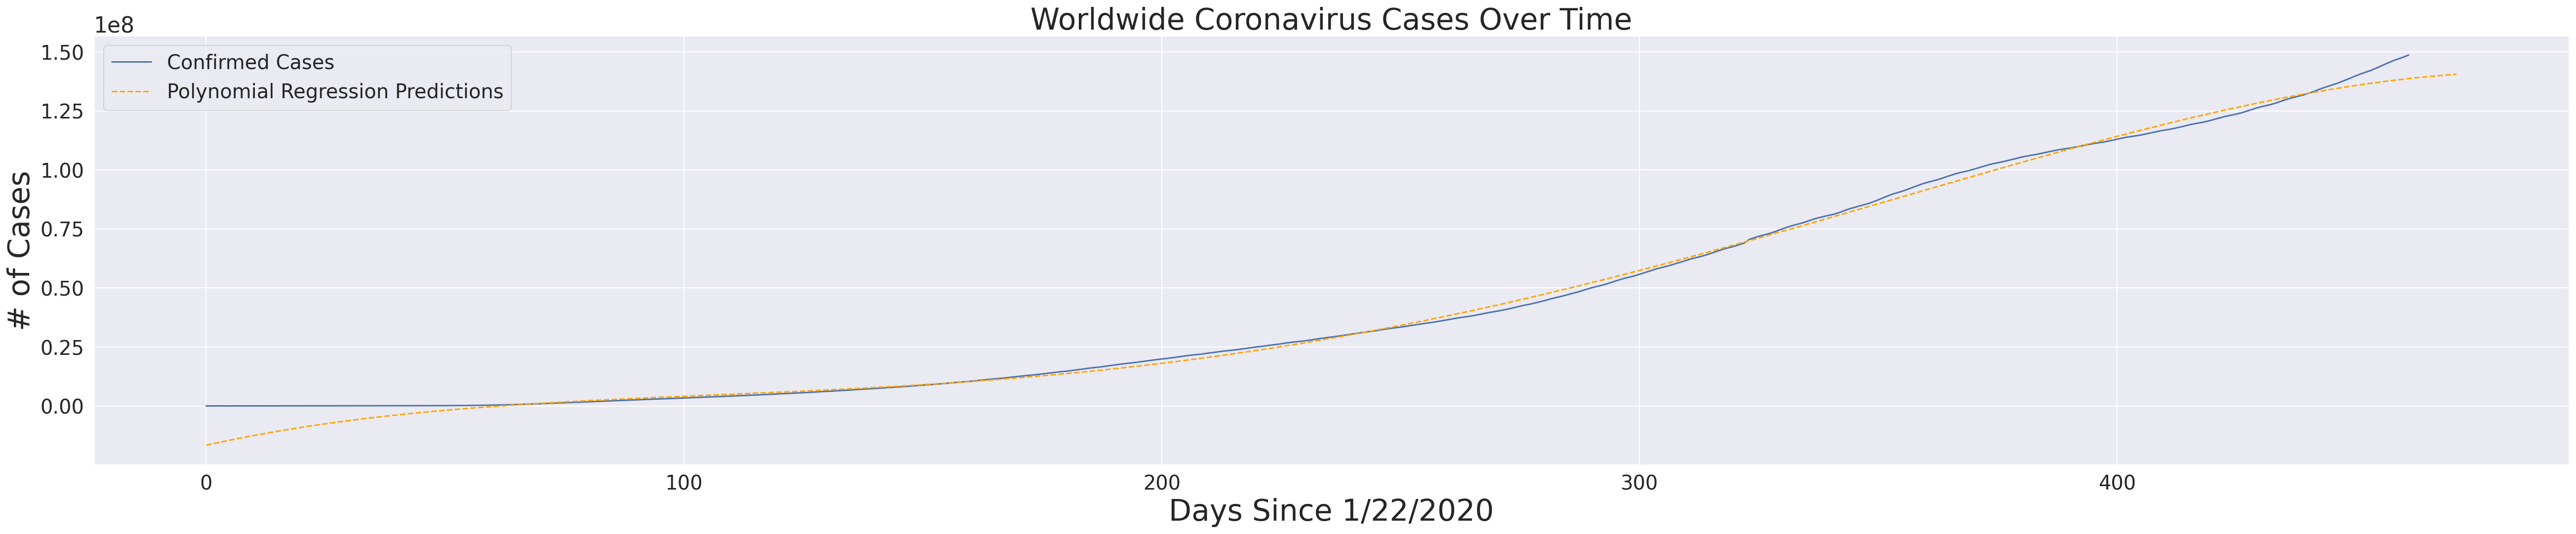

In [ ]:
plot_predictions(adjusted_dates, world_cases, linear_pred, 'Polynomial Regression Predictions', 'orange')

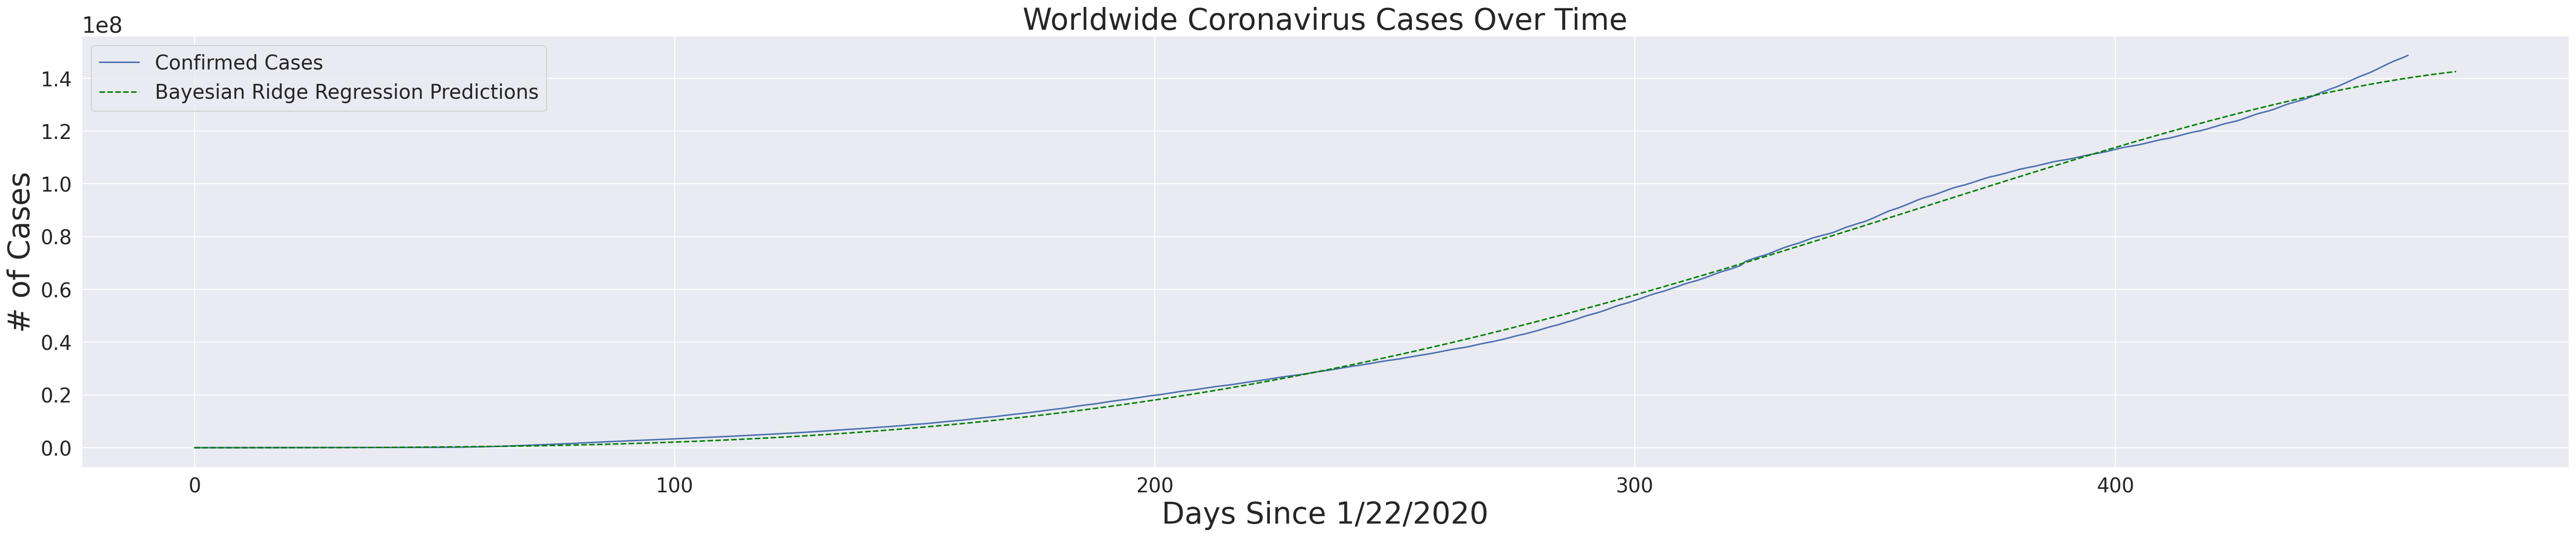

In [ ]:
plot_predictions(adjusted_dates, world_cases, bayesian_pred, 'Bayesian Ridge Regression Predictions', 'green')

In [ ]:
# Future predictions using SVM 
svm_df = pd.DataFrame({'Date': future_forcast_dates[-10:], 'SVM Predicted # of Confirmed Cases Worldwide': np.round(svm_pred[-10:])})
svm_df.style.background_gradient(cmap='Reds')

In [ ]:
# Future predictions using polynomial regression
linear_pred = linear_pred.reshape(1,-1)[0]
linear_df = pd.DataFrame({'Date': future_forcast_dates[-10:], 'Polynomial Predicted # of Confirmed Cases Worldwide': np.round(linear_pred[-10:])})
linear_df.style.background_gradient(cmap='Reds')

In [ ]:
# Future predictions using Bayesian Ridge 
bayesian_df = pd.DataFrame({'Date': future_forcast_dates[-10:], 'Bayesian Ridge Predicted # of Confirmed Cases Worldwide': np.round(bayesian_pred[-10:])})
bayesian_df.style.background_gradient(cmap='Reds')

Mortality Rate (worldwide) **susceptible to change **

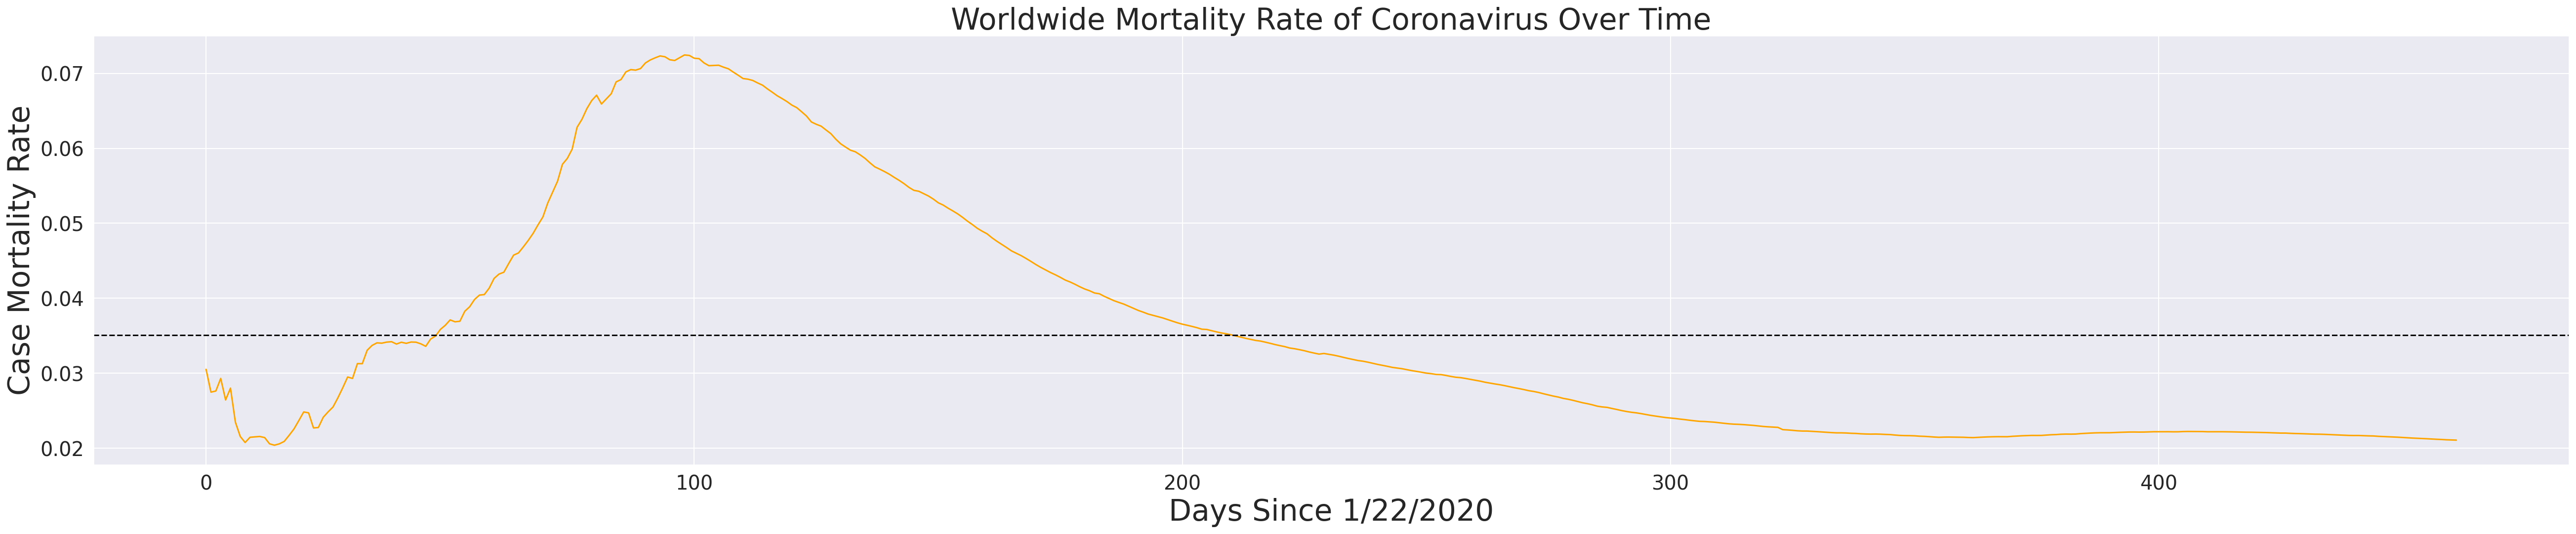

In [ ]:
mean_mortality_rate = np.mean(mortality_rate)
plt.figure(figsize=(40,8))
plt.plot(adjusted_dates, mortality_rate, color='orange')
plt.axhline(y = mean_mortality_rate,linestyle='--', color='black')
plt.title('Worldwide Mortality Rate of Coronavirus Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Case Mortality Rate', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

Recovery Rate (worldwide) **suceptible to change **

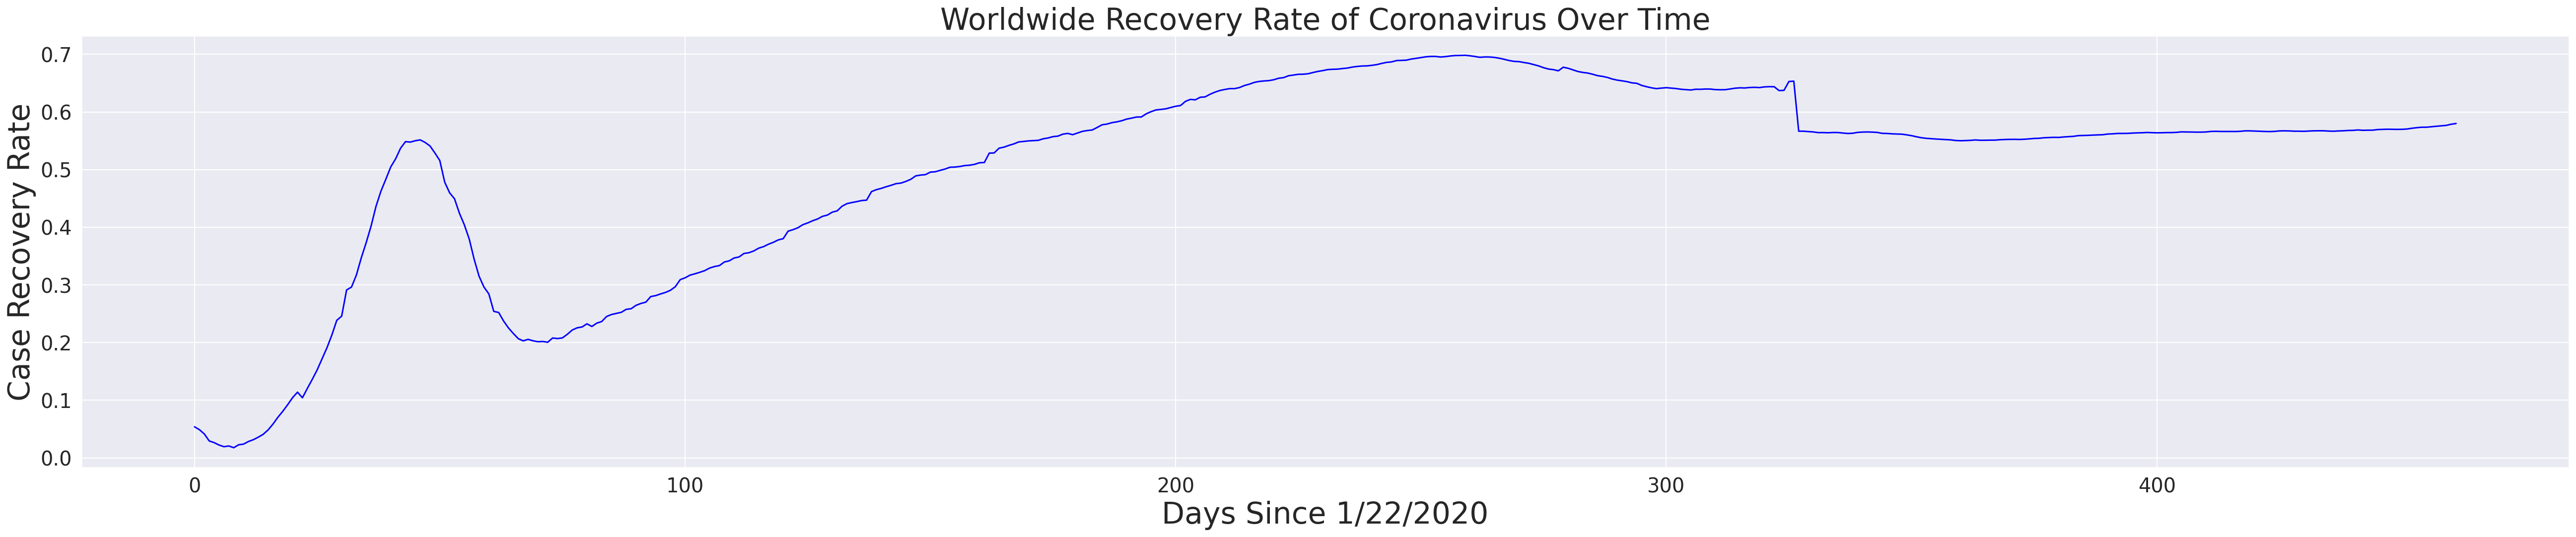

In [ ]:
mean_recovery_rate = np.mean(recovery_rate)
plt.figure(figsize=(40, 8))
plt.plot(adjusted_dates, recovery_rate, color='blue')
plt.title('Worldwide Recovery Rate of Coronavirus Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Case Recovery Rate', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

Graphing deaths against recoveries

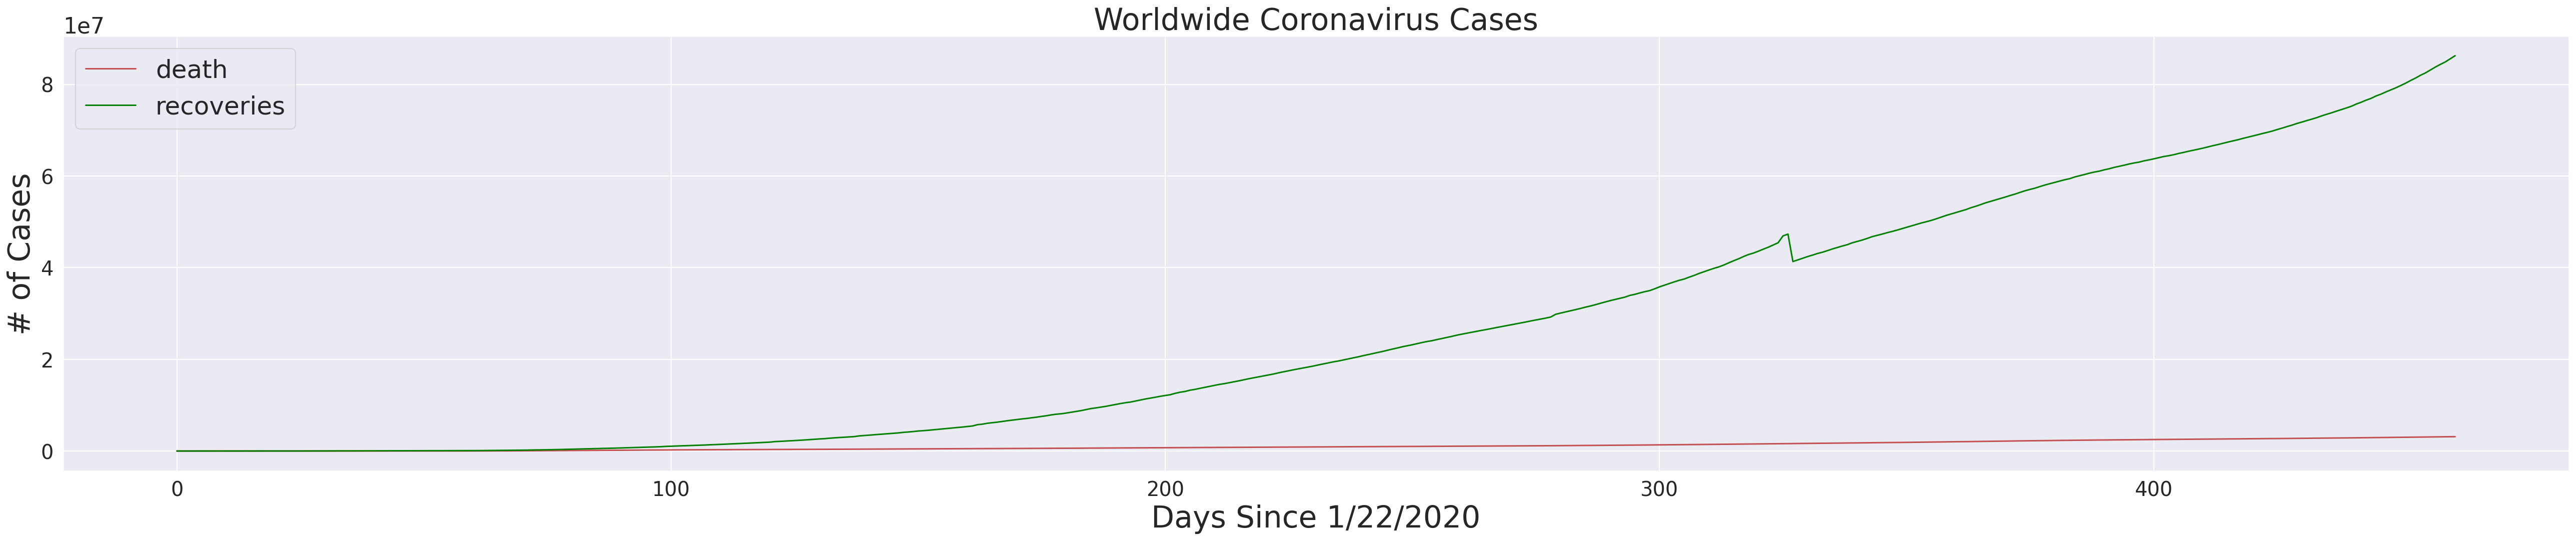

In [ ]:
plt.figure(figsize=(40, 8))
plt.plot(adjusted_dates, total_deaths, color='r')
plt.plot(adjusted_dates, total_recovered, color='green')
plt.legend(['death', 'recoveries'], loc='best', fontsize=25)
plt.title('Worldwide Coronavirus Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

Plotting the number of deaths against the number of recoveries. 

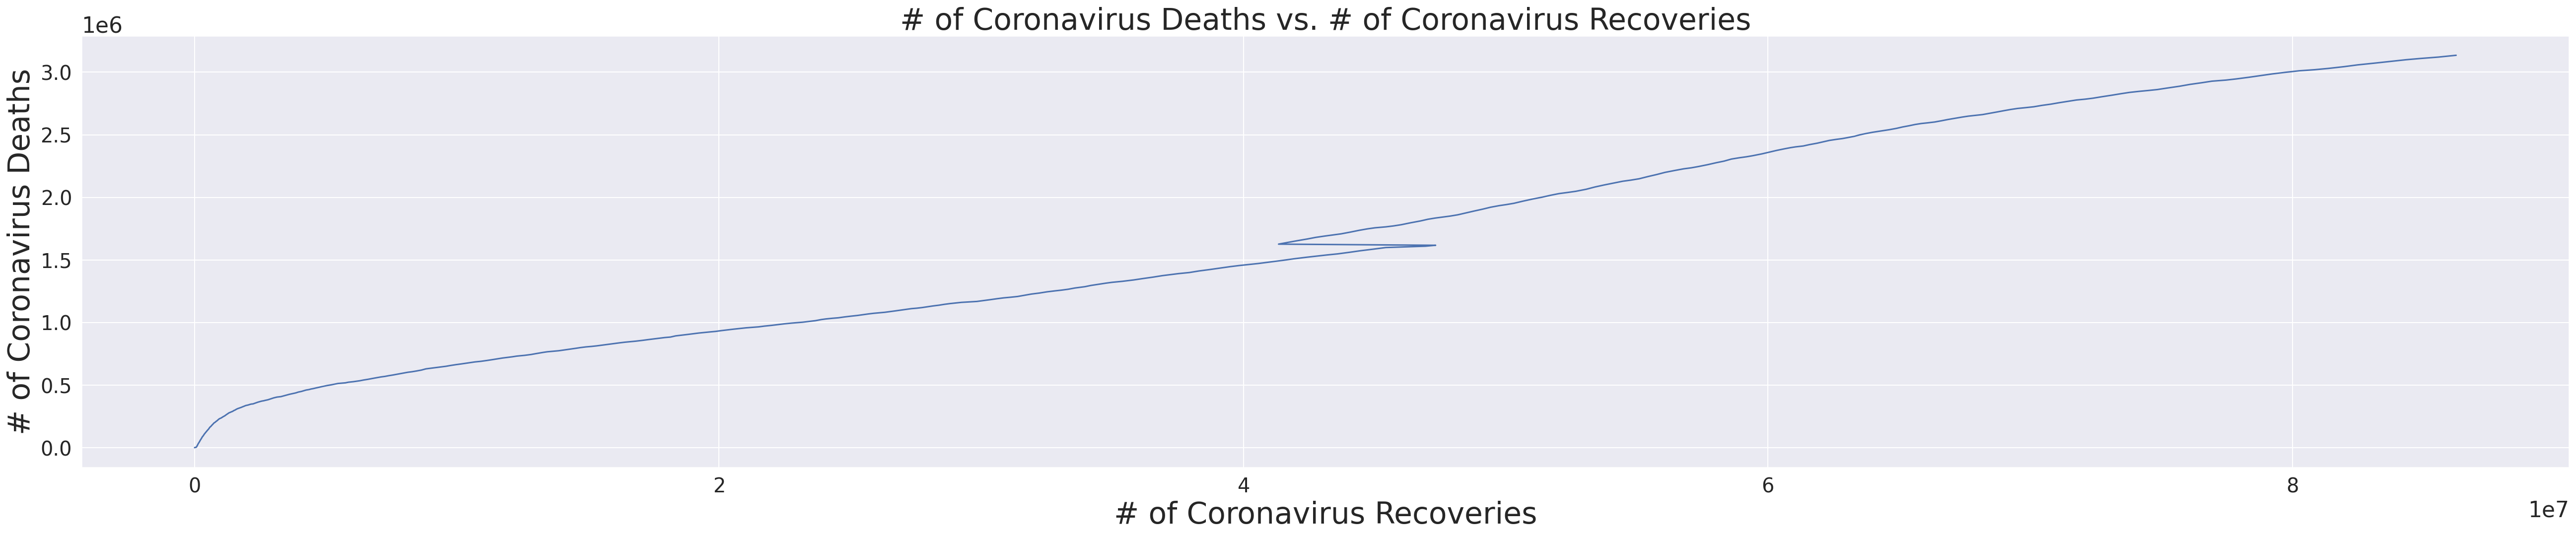

In [ ]:
plt.figure(figsize=(40, 8))
plt.plot(total_recovered, total_deaths)
plt.title('# of Coronavirus Deaths vs. # of Coronavirus Recoveries', size=30)
plt.xlabel('# of Coronavirus Recoveries', size=30)
plt.ylabel('# of Coronavirus Deaths', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

Getting information about **countries/regions** that have confirmed coronavirus cases

In [ ]:
unique_countries =  list(latest_data['Country_Region'].unique())

In [ ]:
country_confirmed_cases = []
country_death_cases = [] 
country_active_cases = []
country_recovery_cases = []
country_incidence_rate = [] 
country_mortality_rate = [] 

no_cases = []
for i in unique_countries:
    cases = latest_data[latest_data['Country_Region']==i]['Confirmed'].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_countries.remove(i)
    
# sort countries by the number of confirmed cases
unique_countries = [k for k, v in sorted(zip(unique_countries, country_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_countries)):
    country_confirmed_cases[i] = latest_data[latest_data['Country_Region']==unique_countries[i]]['Confirmed'].sum()
    country_death_cases.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Deaths'].sum())
    country_recovery_cases.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Recovered'].sum())
    country_active_cases.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Active'].sum())
    country_incidence_rate.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Incident_Rate'].sum())
    country_mortality_rate.append(country_death_cases[i]/country_confirmed_cases[i])

# Data table
<a id='data_table'></a>
This shows covid data for several countries. The table includes the number of confirmed cases, deaths, active cases, incidence rate, and mortality rate. 

In [ ]:
country_df = pd.DataFrame({'Country Name': unique_countries, 'Number of Confirmed Cases': [format(int(i), ',d') for i in country_confirmed_cases],
                          'Number of Deaths': [format(int(i), ',d') for i in country_death_cases], 
                          'Number of Active Cases' : [format(int(i), ',d') for i in country_active_cases], 'Incidence Rate' : country_incidence_rate,
                          'Mortality Rate': country_mortality_rate})
# number of cases per country/region

country_df.style.background_gradient(cmap='Oranges')

In [ ]:
unique_provinces =  list(latest_data['Province_State'].unique())

Getting the latest information about **provinces/states** that have confirmed coronavirus cases

In [ ]:
province_confirmed_cases = []
province_country = [] 
province_death_cases = [] 
province_recovery_cases = []
province_active = [] 
province_incidence_rate = []
province_mortality_rate = [] 

no_cases = [] 
for i in unique_provinces:
    cases = latest_data[latest_data['Province_State']==i]['Confirmed'].sum()
    if cases > 0:
        province_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
 
# remove areas with no confirmed cases
for i in no_cases:
    unique_provinces.remove(i)
    
unique_provinces = [k for k, v in sorted(zip(unique_provinces, province_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_provinces)):
    province_confirmed_cases[i] = latest_data[latest_data['Province_State']==unique_provinces[i]]['Confirmed'].sum()
    province_country.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Country_Region'].unique()[0])
    province_death_cases.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Deaths'].sum())
    province_recovery_cases.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Recovered'].sum())
    province_active.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Active'].sum())
    province_incidence_rate.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Incident_Rate'].sum())
    province_mortality_rate.append(province_death_cases[i]/province_confirmed_cases[i])

In [ ]:
# number of cases per province/state/city top 100 
province_limit = 100 
province_df = pd.DataFrame({'Province/State Name': unique_provinces[:province_limit], 'Country': province_country[:province_limit], 'Number of Confirmed Cases': [format(int(i), ',d') for i in province_confirmed_cases[:province_limit]],
                          'Number of Deaths': [format(int(i), ',d') for i in province_death_cases[:province_limit]],'Number of Active Cases' : [format(int(i), ',d') for i in province_active[:province_limit]], 
                            'Incidence Rate' : province_incidence_rate[:province_limit], 'Mortality Rate': province_mortality_rate[:province_limit]})
# number of cases per country/region

province_df.style.background_gradient(cmap='Oranges')

In [ ]:
# return the data table with province/state info for a given country
def country_table(country_name):
    states = list(latest_data[latest_data['Country_Region']==country_name]['Province_State'].unique())
    state_confirmed_cases = []
    state_death_cases = [] 
    state_recovery_cases = []
    state_active = [] 
    state_incidence_rate = [] 
    state_mortality_rate = [] 

    no_cases = [] 
    for i in states:
        cases = latest_data[latest_data['Province_State']==i]['Confirmed'].sum()
        if cases > 0:
            state_confirmed_cases.append(cases)
        else:
            no_cases.append(i)

    # remove areas with no confirmed cases
    for i in no_cases:
        states.remove(i)

    states = [k for k, v in sorted(zip(states, state_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
    for i in range(len(states)):
        state_confirmed_cases[i] = latest_data[latest_data['Province_State']==states[i]]['Confirmed'].sum()
        state_death_cases.append(latest_data[latest_data['Province_State']==states[i]]['Deaths'].sum())
        state_recovery_cases.append(latest_data[latest_data['Province_State']==states[i]]['Recovered'].sum())
        state_active.append(latest_data[latest_data['Province_State']==states[i]]['Active'].sum())
        state_incidence_rate.append(latest_data[latest_data['Province_State']==states[i]]['Incident_Rate'].sum())
        state_mortality_rate.append(state_death_cases[i]/state_confirmed_cases[i])
        
      
    state_df = pd.DataFrame({'State Name': states, 'Number of Confirmed Cases': [format(int(i), ',d') for i in state_confirmed_cases],
                              'Number of Deaths': [format(int(i), ',d') for i in state_death_cases], 'Number of Active Cases' : [format(int(i), ',d') for i in state_active], 
                             'Incidence Rate' : state_incidence_rate, 'Mortality Rate': state_mortality_rate})
    # number of cases per country/region
    return state_df

Data table for the **United States**

In [ ]:
us_table = country_table('US')
us_table.style.background_gradient(cmap='Oranges')

Data table for **Brazil**

In [ ]:
brazil_table = country_table('Brazil')
brazil_table.style.background_gradient(cmap='Oranges')

Data table for **India**

In [ ]:
india_table = country_table('India')
india_table.style.background_gradient(cmap='Oranges')

Data table for **Russia**

In [ ]:
russia_table = country_table('Russia')
russia_table.style.background_gradient(cmap='Oranges')

Data table for **United Kingdom**

In [ ]:
uk_table = country_table('United Kingdom')
uk_table.style.background_gradient(cmap='Oranges')79384.048095739
MSE: 45116829227268.9

Data table for **France**

In [ ]:
france_table = country_table('France')
france_table.style.background_gradient(cmap='Oranges')

Data table for **Italy**

In [ ]:
italy_table = country_table('Italy')
italy_table.style.background_gradient(cmap='Oranges')

Data table for **Spain**

In [ ]:
spain_table = country_table('Spain')
spain_table.style.background_gradient(cmap='Oranges')

Data table for **Germany**

In [ ]:
germany_table = country_table('Germany')
germany_table.style.background_gradient(cmap='Oranges')

Data table for **the Netherlands**

In [ ]:
netherlands_table = country_table('Netherlands')
netherlands_table.style.background_gradient(cmap='Oranges')

Data table for **China**

In [ ]:
china_table = country_table('China')
china_table.style.background_gradient(cmap='Oranges')

Data table for **Colombia**

In [ ]:
colombia_table = country_table('Colombia')
colombia_table.style.background_gradient(cmap='Oranges')

Data table for **Mexico**

In [ ]:
mexico_table = country_table('Mexico')
mexico_table.style.background_gradient(cmap='Oranges')

<a id='bar_charts'></a>
# Bar Chart Visualizations for COVID-19
This offers us some insights for how different countries/regions compare in terms of covid cases.

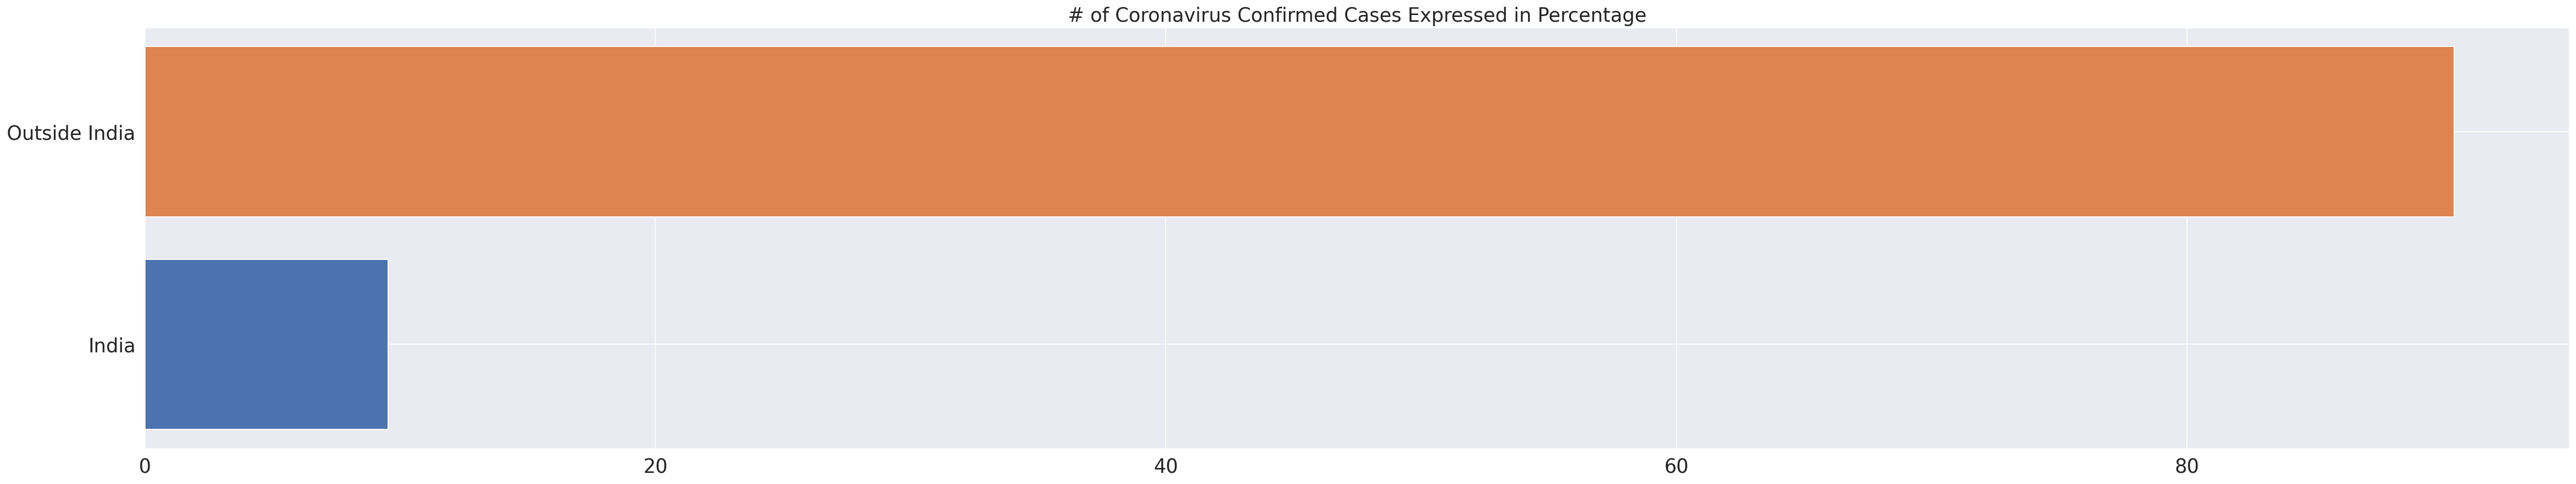

In [ ]:
total_world_cases = np.sum(country_confirmed_cases)
India_confirmed = latest_data[latest_data['Country_Region']=='India']['Confirmed'].sum()
outside_India_confirmed = total_world_cases - India_confirmed


plt.figure(figsize=(40, 8))
plt.barh('India', (India_confirmed/total_world_cases)*100)
plt.barh('Outside India', (outside_India_confirmed/total_world_cases)*100)
plt.title('# of Coronavirus Confirmed Cases Expressed in Percentage', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [ ]:
print('Outside India {} cases ({}%):'.format(outside_India_confirmed, np.round((outside_India_confirmed/total_world_cases)*100, 1)))
print('India {} cases ({}%)'.format(India_confirmed, np.round((India_confirmed/total_world_cases)*100, 1)))
print('Total: {} cases'.format(total_world_cases))

Outside India 107264504 cases (90.5%):
India 11308846 cases (9.5%)
Total: 118573350 cases


In [ ]:
# Only show 10 countries with the most confirmed cases, the rest are grouped into the other category
visual_unique_countries = [] 
visual_confirmed_cases = []
others = np.sum(country_confirmed_cases[10:])

for i in range(len(country_confirmed_cases[:10])):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(country_confirmed_cases[i])
    
visual_unique_countries.append('Others')
visual_confirmed_cases.append(others)

In [ ]:
def plot_bar_graphs(x, y, title):
    plt.figure(figsize=(40, 8))
    plt.barh(x, y)
    plt.title(title, size=20)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()
    
# good for a lot x values 
def plot_bar_graphs_tall(x, y, title):
    plt.figure(figsize=(40, 8))
    plt.barh(x, y)
    plt.title(title, size=25)
    plt.xticks(size=25)
    plt.yticks(size=25)
    plt.show()

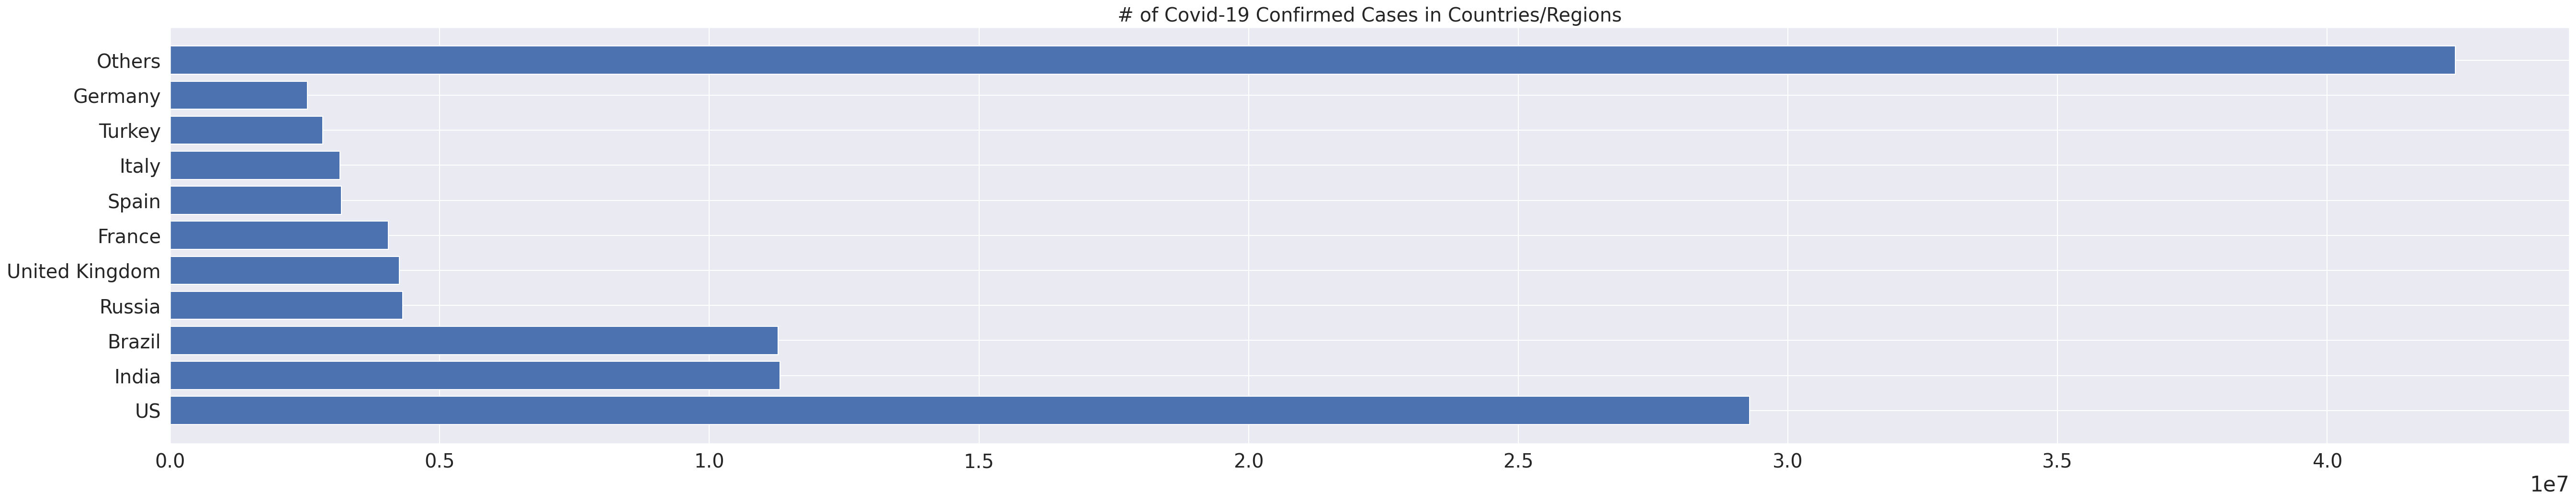

In [ ]:
plot_bar_graphs(visual_unique_countries, visual_confirmed_cases, '# of Covid-19 Confirmed Cases in Countries/Regions')

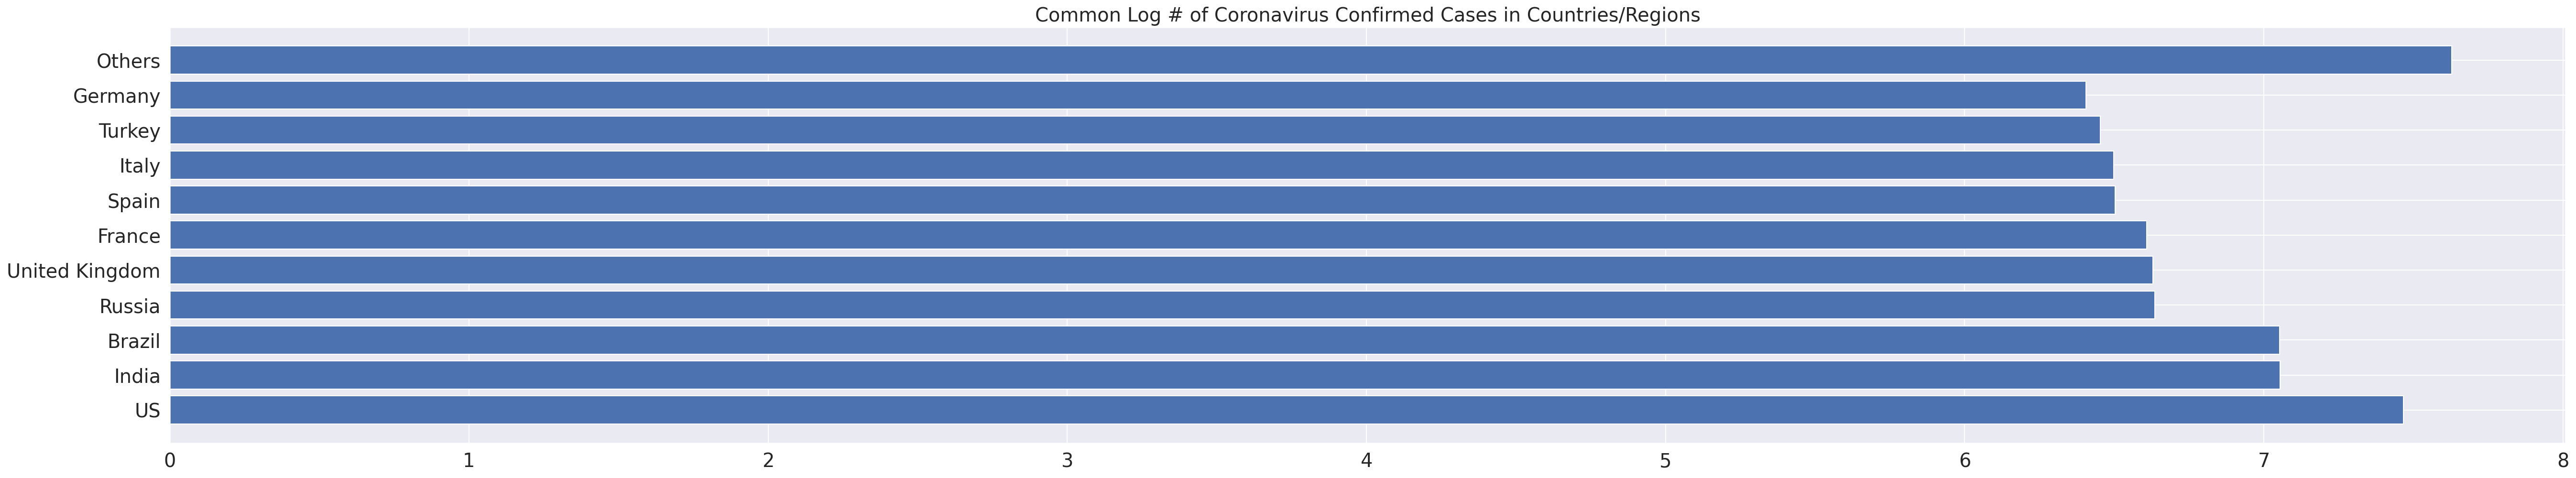

In [ ]:
log_country_confirmed_cases = [math.log10(i) for i in visual_confirmed_cases]
plot_bar_graphs(visual_unique_countries, log_country_confirmed_cases, 'Common Log # of Coronavirus Confirmed Cases in Countries/Regions')

<a id='pie_charts'></a>
# Pie Chart Visualizations for COVID-19
Although pie charts are not necessarily the most informative visualizations, I added them to increase some variety for the visualizations. 

In [ ]:
def plot_pie_charts(x, y, title):
    # more muted color 
    c = ['lightcoral', 'rosybrown', 'sandybrown', 'navajowhite', 'gold',
        'khaki', 'lightskyblue', 'turquoise', 'lightslategrey', 'thistle', 'pink']
    plt.figure(figsize=(10,10))
    plt.title(title, size=20)
    plt.pie(y, colors=c,shadow=True, labels=y)
    plt.legend(x, loc='best', fontsize=12)
    plt.show()

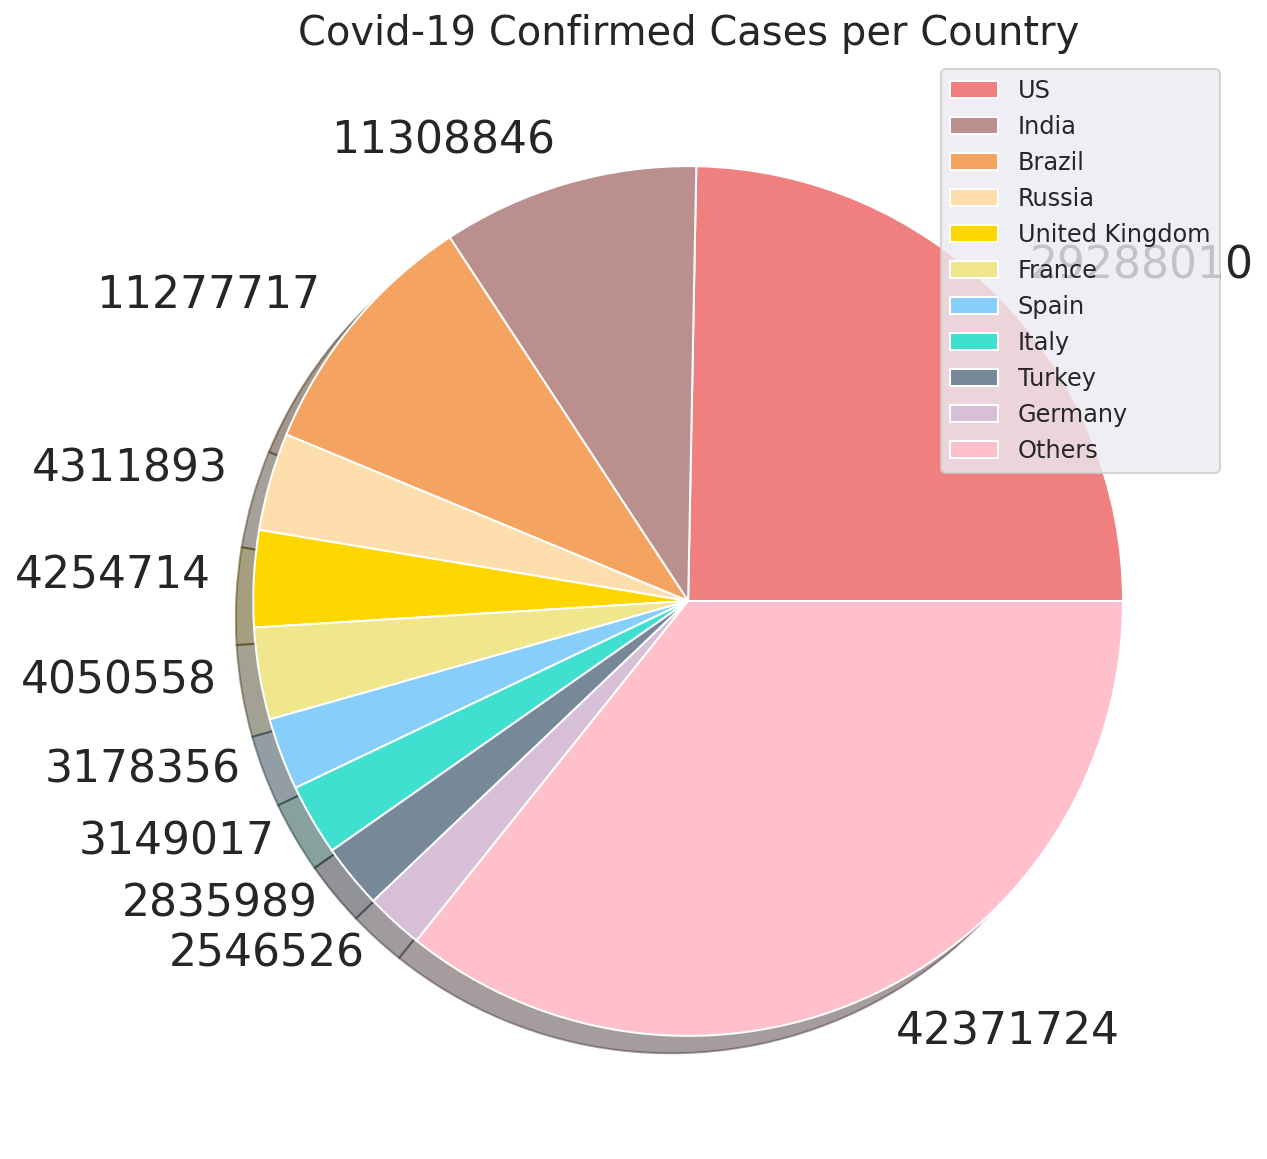

In [ ]:
plot_pie_charts(visual_unique_countries, visual_confirmed_cases, 'Covid-19 Confirmed Cases per Country')

<center>
<hr/>
<h1>
<b>

Map

</b>
</h1>
<hr/>
<center>

In [ ]:
df_loc = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-11-2021.csv')
df_loc

FIPS        Admin2  ... Incident_Rate Case_Fatality_Ratio
0        NaN           NaN  ...    143.640850            4.383282
1        NaN           NaN  ...   4011.467093            1.734204
2        NaN           NaN  ...    261.911672            2.636459
3        NaN           NaN  ...  14404.969909            1.006289
4        NaN           NaN  ...     64.519038            2.438104
...      ...           ...  ...           ...                 ...
3978     NaN           NaN  ...      8.941872           25.009374
3979     NaN           NaN  ...    456.446915            1.368084
3980     NaN           NaN  ...    244.749907            4.101493
3981  2066.0  Copper River  ...           NaN                 NaN
3982  2063.0       Chugach  ...           NaN                 NaN

[3983 rows x 14 columns]

In [ ]:
df_loc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3983 entries, 0 to 3982
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 3266 non-null   float64
 1   Admin2               3271 non-null   object 
 2   Province_State       3812 non-null   object 
 3   Country_Region       3983 non-null   object 
 4   Last_Update          3983 non-null   object 
 5   Lat                  3895 non-null   float64
 6   Long_                3895 non-null   float64
 7   Confirmed            3983 non-null   int64  
 8   Deaths               3983 non-null   int64  
 9   Recovered            708 non-null    float64
 10  Active               706 non-null    float64
 11  Combined_Key         3983 non-null   object 
 12  Incident_Rate        3893 non-null   float64
 13  Case_Fatality_Ratio  3937 non-null   float64
dtypes: float64(7), int64(2), object(5)
memory usage: 435.8+ KB


In [ ]:

df_loc['Lat'].fillna(0,inplace=True)
df_loc['Long_'].fillna(0,inplace=True)

df_loc['Recovered'].fillna(0,inplace=True)
df_loc['Active'].fillna(0,inplace=True)

In [ ]:

Confirmed_Cases_list=df_loc['Confirmed'].values.tolist()
Deaths_Cases_list=df_loc['Deaths'].values.tolist()
Recovered_Cases_list=df_loc['Recovered'].values.tolist()
Active_Cases_list=df_loc['Active'].values.tolist()
Country_list=df_loc['Country_Region'].values.tolist()
State_list=df_loc['Province_State'].values.tolist()


In [ ]:

locations = df_loc[['Lat', 'Long_']]
locationlist = locations.values.tolist()
len(locationlist)
locationlist[7]



[40.0691, 45.0382]

In [ ]:

map2 = folium.Map(location=[28.644800, 77.216721], zoom_start=8)
marker_cluster = MarkerCluster().add_to(map2)
for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point],tooltip=('Confirmed Cases:'+str(Confirmed_Cases_list[point])+'<br/>'
    'Deaths_Cases:'+str(Deaths_Cases_list[point])+'<br/>''Recovered_Cases:'+str(Recovered_Cases_list[point])+'<br/>'
    'Active Cases:'+str(Active_Cases_list[point])+'<br/>''State:'+str(State_list[point])+'<br/>''Country:'+str(Country_list[point])),icon=folium.Icon(color='red', icon_color='white', icon='male', angle=0, prefix='fa')).add_to(marker_cluster)
map2

Output hidden; open in https://colab.research.google.com to view.

<center>
<hr/>
<h1>
<b>
<i>
Pandemic Model
</i>
</b>
</h1>
</center>
<hr/>

In [ ]:

url_pop='/content/drive/MyDrive/Prashant/lab/DSPL_Lab/Project/Datasets/Population data/India-2019.csv'
pop=pd.read_csv(url_pop)
total_india_population=pop['M'].sum() + pop['F'].sum()
total_india_population



1366417755

In [ ]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [ ]:
india_confirmed=confirmed_df[confirmed_df['Country/Region']=='India']
india_confirmed_np=india_confirmed.loc[:, cols[4]:cols[-1]]

In [ ]:
india_recoveries=recoveries_df[recoveries_df['Country/Region']=='India']
india_recoveries_np=india_recoveries.loc[:, cols[4]:cols[-1]]

In [ ]:
india_death=deaths_df[deaths_df['Country/Region']=='India']
india_death_np=india_death.loc[:, cols[4]:cols[-1]]

In [ ]:
india_confirmed_np.shape

(1, 462)

In [ ]:
india_death_np.shape

(1, 462)

In [ ]:
india_recoveries_np.shape

(1, 462)

In [ ]:
# X_cml = confirmed cases
X_cml = np.array([41, 45, 62, 121, 199, 291, 440, 574, 835, 1279, 1985, 2761, 4535, 5997, 7736, 9720, 11821, 14411, 17238, 20471, 24363, 28060, 31211, 34598, 37251, 40235, 42708, 44730, 59882, 63932, 66576, 68584, 70635, 72528, 74279, 75101, 75993, 76392, 77041, 77262, 77779, 78190, 78630, 78959, 79389, 79968, 80174, 80302, 80422, 80565, 80710, 80813, 80859, 80904, 80924, 80955, 80980, 81003, 81201, 81048, 81077, 81116, 81151, 81235, 81300, 81416, 81498, 81600, 81747, 81846, 81960, 82078, 82213, 82341, 82447, 82545, 82631, 82724, 82802, 82875, 82930, 83005, 83071, 83157, 83249], dtype=np.float64)[:-27]
# recovered 
recovered = np.array([12, 12, 16, 21, 25, 25, 28, 28, 34, 38, 49, 51, 60, 103, 124, 171, 243, 328, 475, 632, 892, 1153, 1540, 2050, 2651, 3283, 3998, 4742, 5915, 6728, 8101, 9425, 10853, 12561, 14387, 16170, 18279, 20673, 22907, 24757, 27353, 29775, 32531, 36157, 39049, 41675, 44518, 47260, 49914, 52109, 53793, 55477, 57143, 58684, 59982, 61567, 62887, 64216, 65649, 67022, 67863, 68799, 69725, 70547, 71284, 71876, 72382, 72841, 73299, 73791, 74196, 74737, 75122, 75600, 75937, 76225, 76415, 76610, 76785, 76984, 77210, 77348, 77450, 77586, 77711], dtype=np.float64)[:-27]
# death 
death = np.array([2, 3, 3, 3, 4, 6, 9, 18, 25, 41, 56, 80, 106, 132, 170, 213, 259, 304, 361, 425, 491, 564, 637, 723, 812, 909, 1017, 1114, 1368, 1381, 1524, 1666, 1772, 1870, 2006, 2121, 2239, 2348, 2445, 2595, 2666, 2718, 2747, 2791, 2838, 2873, 2915, 2946, 2984, 3015, 3045, 3073, 3100, 3123, 3140, 3162, 3173, 3180, 3194, 3204, 3218, 3231, 3242, 3250, 3253, 3261, 3267, 3276, 3283, 3287, 3293, 3298, 3301, 3306, 3311, 3314, 3321, 3327, 3331, 3335, 3338, 3340, 3340, 3342, 3344], dtype=np.float64)[:-27]
# Population
population = total_india_population


<center>
<hr/>
<h1>
<b>
<i>
SIR Model
</i>
</b>
</h1>
</center>
<hr/>

In [ ]:
def data_spilt(data, orders, start):
    x_train = np.empty((len(data) - start - orders, orders))
    y_train = data[start + orders:]

    for i in range(len(data) - start - orders):
        x_train[i] = data[i + start:start + orders + i]

    # Exclude the day (Feb. 12, 2020) of the change of the definition of confirmed cases in Hubei China.
    x_train = np.delete(x_train, np.s_[28 - (orders + 1) - start:28 - start], 0)
    y_train = np.delete(y_train, np.s_[28 - (orders + 1) - start:28 - start])

    return x_train, y_train

In [ ]:
def ridge(x, y):
    print('\nStart searching good parameters for the task...')
    parameters = {'alpha': np.arange(0, 0.100005, 0.000005).tolist(),
                  "tol": [1e-8],
                  'fit_intercept': [True, False],
                  'normalize': [True, False]}

    clf = GridSearchCV(Ridge(), parameters, n_jobs=-1, cv=5)
    clf.fit(x, y)

    print('\nResults for the parameters grid search:')
    print('Model:', clf.best_estimator_)
    print('Score:', clf.best_score_)

    return clf

In [ ]:
########## data preprocess ##########
X = X_cml - recovered - death
R = recovered + death

n = np.array([population] * len(X), dtype=np.float64)

S = n - X - R

X_diff = np.array([X[:-1], X[1:]], dtype=np.float64).T
R_diff = np.array([R[:-1], R[1:]], dtype=np.float64).T

gamma = (R[1:] - R[:-1]) / X[:-1]
beta = n[:-1] * (X[1:] - X[:-1] + R[1:] - R[:-1]) / (X[:-1] * (n[:-1] - X[:-1] - R[:-1]))
R0 = beta / gamma

In [ ]:
########## Parameters for Ridge Regression ##########
##### Orders of the two FIR filters in (12), (13) in the paper. #####
orders_beta = 3
orders_gamma = 3

##### Select a starting day for the data training in the ridge regression. #####
start_beta = 10
start_gamma = 10

########## Print Info ##########
print("\nThe latest transmission rate beta of SIR model:", beta[-1])
print("The latest recovering rate gamma of SIR model:", gamma[-1])
print("The latest basic reproduction number R0:", R0[-1])

########## Ridge Regression ##########
##### Split the data to the training set and testing set #####
x_beta, y_beta = data_spilt(beta, orders_beta, start_beta)
x_gamma, y_gamma = data_spilt(gamma, orders_gamma, start_gamma)

##### Searching good parameters #####
#clf_beta = ridge(x_beta, y_beta)
#clf_gamma = ridge(x_gamma, y_gamma)

##### Training and Testing #####
clf_beta = Ridge(alpha=0.003765, copy_X=True, fit_intercept=False, max_iter=None, normalize=True, random_state=None, solver='auto', tol=1e-08).fit(x_beta, y_beta)
clf_gamma = Ridge(alpha=0.001675, copy_X=True, fit_intercept=False, max_iter=None,normalize=True, random_state=None, solver='auto', tol=1e-08).fit(x_gamma, y_gamma)

beta_hat = clf_beta.predict(x_beta)
gamma_hat = clf_gamma.predict(x_gamma)


The latest transmission rate beta of SIR model: 0.0015416463246107457
The latest recovering rate gamma of SIR model: 0.08954423592493298
The latest basic reproduction number R0: 0.017216589194006232


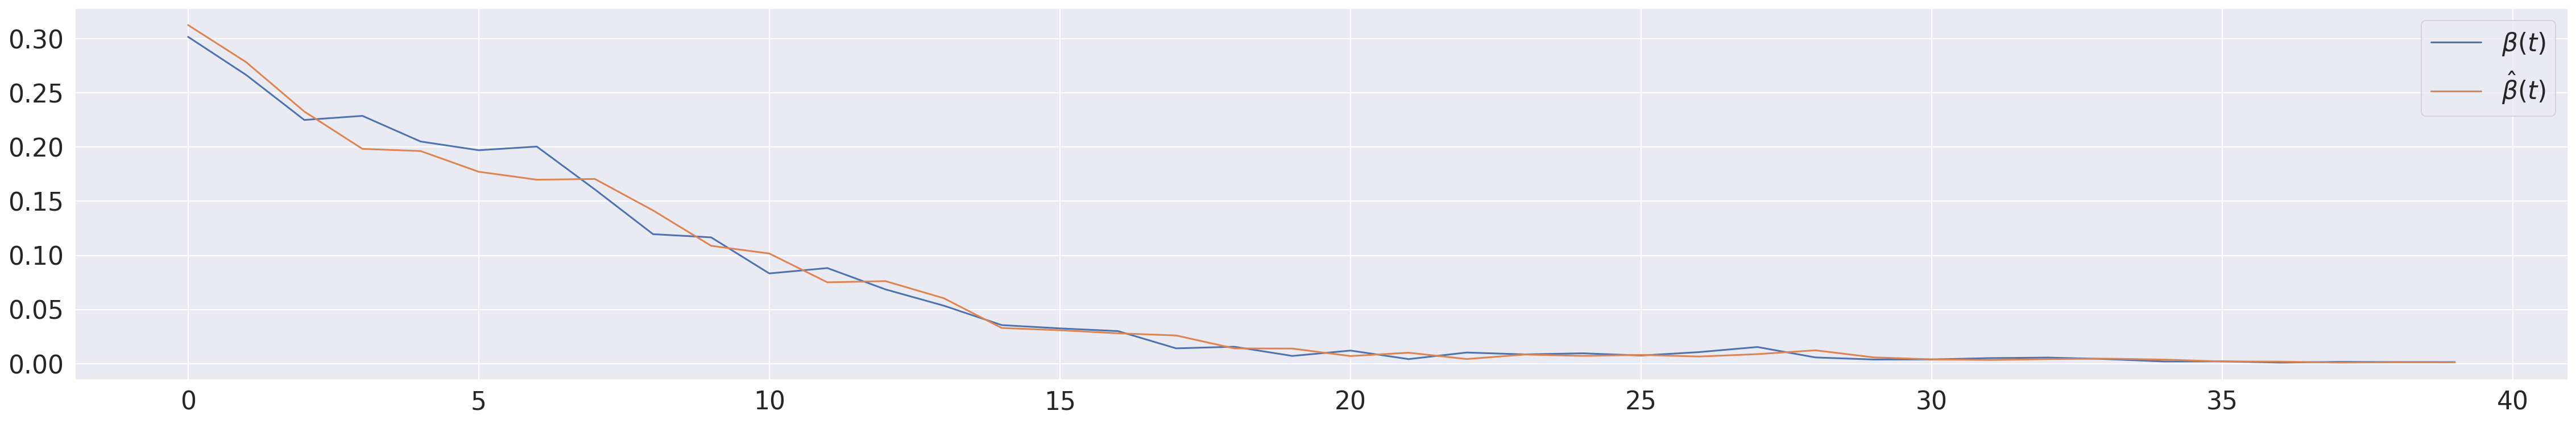

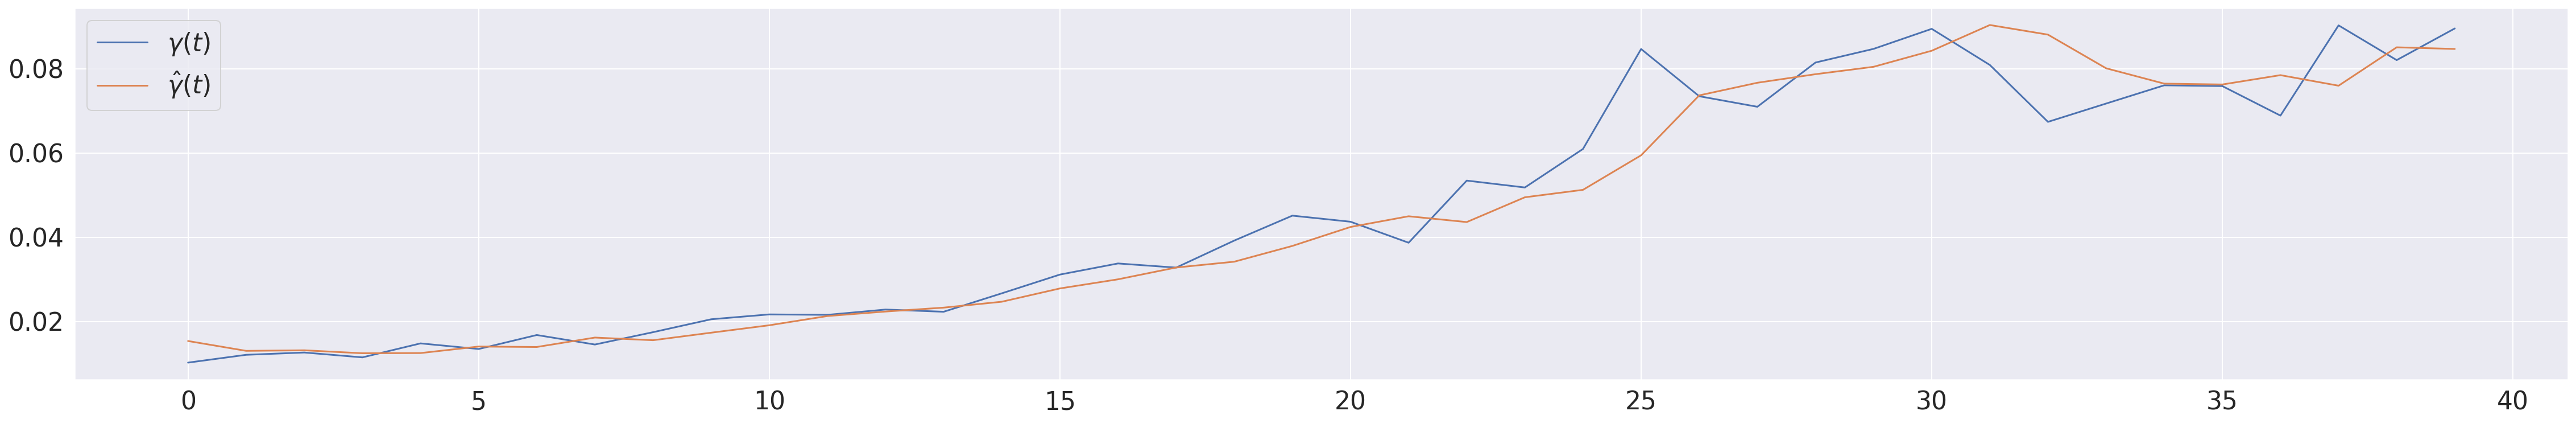

In [ ]:
##### Plot the training and testing results #####
plt.figure(figsize=(35,6))
plt.figure(1)
plt.plot(y_beta, label=r'$\beta (t)$')
plt.plot(beta_hat, label=r'$\hat{\beta}(t)$')
plt.legend()

plt.figure(figsize=(35,6))
plt.figure(2)
plt.plot(y_gamma, label=r'$\gamma (t)$')
plt.plot(gamma_hat, label=r'$\hat{\gamma}(t)$')
plt.legend()

In [ ]:
########## Time-dependent SIR model ##########

##### Parameters for the Time-dependent SIR model #####
stop_X = 0 # stopping criteria
stop_day = 100 # maximum iteration days (W in the paper)

day_count = 0
turning_point = 0

S_predict = [S[-1]]
X_predict = [X[-1]]
R_predict = [R[-1]]

predict_beta = np.array(beta[-orders_beta:]).tolist()
predict_gamma = np.array(gamma[-orders_gamma:]).tolist()
while (X_predict[-1] >= stop_X) and (day_count <= stop_day):
    if predict_beta[-1] > predict_gamma[-1]:
        turning_point += 1

    next_beta = clf_beta.predict(np.asarray([predict_beta[-orders_beta:]]))[0]
    next_gamma = clf_gamma.predict(np.asarray([predict_gamma[-orders_gamma:]]))[0]

    if next_beta < 0:
        next_beta = 0
    if next_gamma < 0:
        next_gamma = 0

    predict_beta.append(next_beta)
    predict_gamma.append(next_gamma)

    next_S = ((-predict_beta[-1] * S_predict[-1] *
               X_predict[-1]) / n[-1]) + S_predict[-1]
    next_X = ((predict_beta[-1] * S_predict[-1] * X_predict[-1]) /
              n[-1]) - (predict_gamma[-1] * X_predict[-1]) + X_predict[-1]
    next_R = (predict_gamma[-1] * X_predict[-1]) + R_predict[-1]

    S_predict.append(next_S)
    X_predict.append(next_X)
    R_predict.append(next_R)

    day_count += 1

In [ ]:

########## Print Info ##########
print('\nConfirmed cases tomorrow:', np.rint(X_predict[1] + R_predict[1]))
print('Infected persons tomorrow:', np.rint(X_predict[1]))
print('Recovered + Death persons tomorrow:', np.rint(R_predict[1]))

print('\nEnd day:', day_count)
print('Confirmed cases on the end day:', np.rint(X_predict[-2] + R_predict[-2]))

print('\nTuring point:', turning_point)



Confirmed cases tomorrow: 81021.0
Infected persons tomorrow: 12373.0
Recovered + Death persons tomorrow: 68648.0

End day: 91
Confirmed cases on the end day: 81088.0

Turing point: 0


<Figure size 2880x576 with 0 Axes>

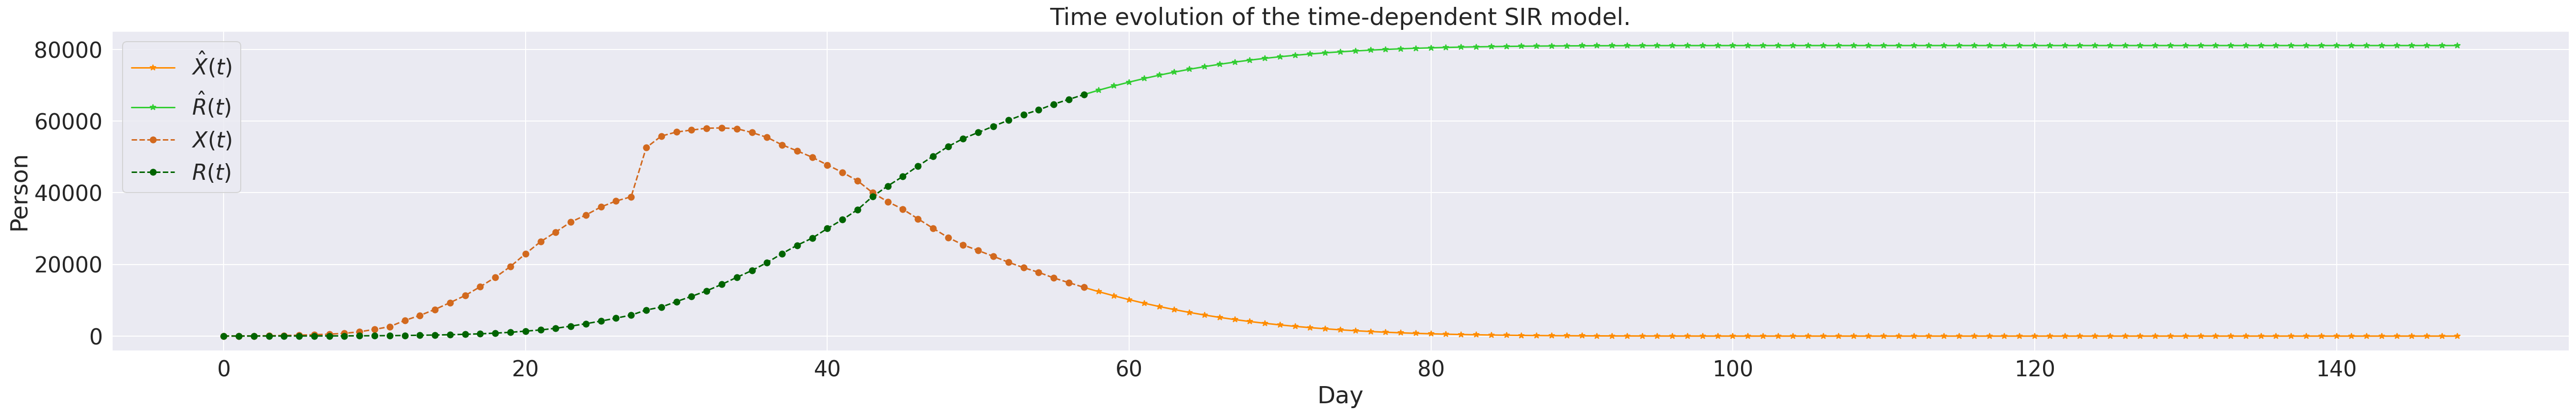

In [ ]:

########## Plot the time evolution of the time-dependent SIR model ##########
plt.figure(3);
plt.figure(figsize=(40,6));
plt.plot(range(len(X) - 1, len(X) - 1 + len(X_predict)), X_predict, '*-', label=r'$\hat{X}(t)$', color='darkorange');
plt.plot(range(len(X) - 1, len(X) - 1 + len(X_predict)), R_predict, '*-', label=r'$\hat{R}(t)$', color='limegreen');
plt.plot(range(len(X)), X, 'o--', label=r'$X(t)$', color='chocolate');
plt.plot(range(len(X)), R, 'o--', label=r'$R(t)$', color='darkgreen');
plt.xlabel('Day');
plt.ylabel('Person');
plt.title('Time evolution of the time-dependent SIR model.');

plt.legend();

# plt.show()


<center>
<hr/>
<h1>
<b>
<i>
SEIR Model
</i>
</b>
</h1>
</center>
<hr/>

In [ ]:

country_name = 'India'
lockdown='3/23/20'       
fac1=0.8
factor1 = np.array([fac1, fac1, fac1, fac1, fac1, fac1, fac1, 1.0, 1.0])

release='7/25/20' #release from lockdown m/dd/yy
fac2=0.0 # fraction released from confinment
factor2 = np.array([fac2,fac2,fac2,fac2,fac2,fac2,fac2,fac2,fac2])   


Tincubation      = 5.2  # length of incubation period
Tinfection       = 2.9  # duration patient is infectious
Thospitalization = 5.   # time to hospitalization
Thospitalized    = 10.  # length of hospital stay
Tdeath           = 14.  # time from exposure to death
p                =0.6   # fraction of symptomatic and asymptomatic cases
w                =0.8   # asymptomatic that cure on their own

# Date to end computations 
tmax_date = '6/25/21'


In [ ]:
def plottage(country,results):
  
    import matplotlib.dates as mdates
    
    t=np.array(results['Time'])    
    S=np.array(results['Susceptible'])
    C=np.array(results['Confined'])    
    E=np.array(results['Exposed'])
    A=np.array(results['Asymptomatic'])    
    I=np.array(results['Symptomatic'])
    Q=np.array(results['Quarantined'])    
    H=np.array(results['Hospitalized'])
    U=np.array(results['ICU'])    
    R=np.array(results['Removed'])
    F=np.array(results['Fatalities'])    
    Dm=np.array(results['Dead'])
#   
    
    N             = country['N']
    deaths        = country['deaths']
    days_past     = country['days past']
    D0            = country['D0']
    name          = country['name']
    lockdown      = country['lockdown']
    fatality_rate = country['fatality_rate']    
    #icu_fraction  = country['icu_fraction']
    number_of_icu_beds=country['number_of_icu_beds']
#
    strS    = 'Susceptible'
    strC    = 'Confined'    
    strE    = 'Exposed'    
    strA    = 'Asymptomatic'    
    strI    = 'Symptomatic'
    strR    = 'Removed'
    strQ    = 'Quarantined'    
    strH    = 'Hospitalized'    
    strD    = 'Dead'
    strII   = 'Infections'
    strDD   = 'Deaths'
    strdt   = 'Doubling Time'
    strdays = 'days'
    strDays = 'Days'
    strPop  = '# of Cases'
    strCCas  = '# of Cases'
    strCas  = 'Cummulative # of Cases'

    fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=[40,15],sharex=True)

# Evolution of the populations

    n=len(S)
    
    datelist=[]
    for i in range(n):
        datelist.append(datetime.datetime.today() + datetime.timedelta(days=t[i]))      
    date64=np.array(datelist, dtype='datetime64')         
    date=date64.astype('O')
   
    #ax4.plot(date,S,color='green'  ,label=strS)
    #ax4.plot(date,C,color='grey'   ,label=strC)    
    ax1.plot(date,N*E,color='magenta',label=strE)
    ax1.plot(date,N*A,color='purple' ,label=strA)    
    ax1.plot(date,N*I,color='orange' ,label=strI)
    #ax1.plot(date,N*Q,color='grey'   ,label=strQ)    
    ax1.plot(date,N*H,color='cyan'   ,label=strH)
    
    ax2.plot(date,N*H,color='cyan'   ,label=strH)    
    ax2.plot(date,N*U,color='green',label='ICU Cases')     
    ax2.axhline(number_of_icu_beds,linestyle='--',color='green',label='ICU Capacity')    
    
    #ax2.plot(date,N*D,color='black'  ,label=strD)
    ax2.set_yscale("log")
    ax2.set_ylim([1,1.5*N*H.max()])
    
    
    
# Cumulative number of infections and deaths 
    cumm_cases=1-(S+C)  # E+A+I+H+R
    ax3.plot(date,N*cumm_cases,color='orange',label="# of Cases (Model)")
    tretarted = t + tmu
    
    D = fatality_rate*np.interp(t,tretarted,cumm_cases)
    print("Number of dead:",np.round(N*D[n-1]))
    
    itD0     = int([D[i] for i in range(n) if D[i] >= (D0+1)/N][0])
    
    ax3.plot(date[itD0-1:n-1],N*D[itD0-1:n-1],color='black',label="Deaths (Model)")



    print("Number of dead:",np.round(N*Dm[n-1]))
    
    pastdatelist=[]
    for i in range(len(days_past)):
        pastdatelist.append(datetime.datetime.today() + datetime.timedelta(days=days_past[i]))
    pastdate64=np.array(pastdatelist, dtype='datetime64')         
    pastdate=pastdate64.astype('O')    
    ax3.plot(pastdate,country['cases'],'o',color='orange',label='Confirmed Cases')
    ax3.plot(pastdate,country['deaths'],'o',color='black',label='Deaths')
    
      

    ax3.plot(date,N*F,color='cyan',label='Hospitalized (model)')        
       

    
    

# Annotations and prettifying 

    ax1.set_ylabel(strPop)
    ax1.legend(loc="best",fancybox=True,shadow=True)
    title=name+" Populations"
    
    ax1.axvline(datetime.datetime.today(),linestyle='--',color='black')
    ax1.annotate('Today', xy=(datetime.datetime.today(), 80),rotation=-90,color='black')
    
    ax1.set_title(title)
    ax1.grid()

    ax2.set_ylabel(strCCas)
    ax2.legend(loc="best",fancybox=True,shadow=True)
    title=name+" Hospitalizations"
    
    ax2.axvline(datetime.datetime.today(),linestyle='--',color='black')
    ax2.annotate('Today', xy=(datetime.datetime.today(), 2),rotation=-90,color='black')
    
    ax2.set_title(title)
    ax2.grid()

    
    ax3.set_yscale("log")
    ax3.set_ylim([1,1.5*N])
    
    #ax2.set_xlim(['2020-03-10','2020-03-30'])
    ax3.set_ylabel(strCas)
    title=name+" Cumulative"#+", $N$="+strlog+", $I_{tot}$="+np.str(np.int(I0))
    ax3.set_title(title)

    ax3.legend(loc="best",fancybox=True,shadow=True)
    ax3.grid()
    
    if (lockdown!=''):
       date_object = datetime.datetime.strptime(lockdown, '%m/%d/%y')
       ax3.axvline(date_object,linestyle=':',color='red')
       ax3.annotate('Lockdown', xy=(date_object, 5e1),rotation=-90,color='red')

       ax3.axvline(date_object+datetime.timedelta(days=+Tdeath),linestyle='--',color='red')
       ax3.annotate(np.str(np.int(np.round(Tdeath)))+'days after\nlockdown', 
           xy=(date_object+datetime.timedelta(days=+Tdeath), 5e1),
           rotation=-90,
           color='red')    
 

    startdate=date[0]
    enddate   = datetime.datetime.strptime(tmax_date, '%m/%d/%y')
    ax1.set_xlim([startdate,enddate])
    ax2.set_xlim([startdate,enddate])
    ax3.set_xlim([startdate,enddate])    

    #fig.autofmt_xdate()
    
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    #plt.show()
  

    return

In [ ]:
D0=1. #initial number of dead to start computations.
name=country_name
if (name=="China"):
    lockdown = '1/23/20'
    D0=min(deaths)
    median_age=38.4
    icu_beds_per_1e5=3.6
elif (name== "Korea, South"):
    lockdown = '2/18/20'        
    median_age=40.8
    icu_beds_per_1e5=10.6        
elif (name == 'Iran'):    
    lockdown = '2/22/20'
    median_age=32.
    icu_beds_per_1e5=5.3        
elif (name == 'Italy'):
    lockdown = '3/09/20'
    median_age=47.3
    icu_beds_per_1e5=12.5        
elif (name == 'Denmark'):
    lockdown = '3/11/20'        
    median_age=41.6
    icu_beds_per_1e5=6.7        
elif (name == 'Norway'):
    lockdown = '3/12/20'                       
    median_age=39.2
    icu_beds_per_1e5=8.        
elif (name == 'Poland'):
    lockdown = '3/13/20'                               
    median_age=39.7
    icu_beds_per_1e5=6.9        
elif (name=="Spain"):
    lockdown = '3/14/20'
    median_age=43.1
    icu_beds_per_1e5=9.7        
elif (name=="US"):
    lockdown = '3/19/20'
    median_age=38.2
    icu_beds_per_1e5=34.7        
elif (name=="Sweden"):
    lockdown = ''
    median_age=40.9
    icu_beds_per_1e5=5.8        
elif (name=="Brazil"):
    lockdown='3/24/20'
    median_age=31.4
    icu_beds_per_1e5=18.        
elif (name=="Tunisia"):
    lockdown ='3/22/20'
    median_age=31.3
    icu_beds_per_1e5=2.72        
elif (name=="Germany"):
    lockdown = ''  
    median_age=45.9
    icu_beds_per_1e5=29.2        
elif (name=="Japan"):
    lockdown = '' 
    median_age=47.3
    icu_beds_per_1e5=7.3        
elif (name=="France"):
    lockdown = ''  
    median_age=41.2
    icu_beds_per_1e5=11.6        
elif (name=='Ireland'):
    lockdown = ''  
    median_age=36.5
    icu_beds_per_1e5=6.5        
elif (name=='Uruguay'):   
    lockdown= ''
    median_age=34.9
    icu_beds_per_1e5=6.        
elif (name=='Chile'):
    lockdown= ''
    median_age=33.8   
    icu_beds_per_1e5=6.        
elif (name=='India'):
    lockdown= '3/23/20'
    median_age=26.8
    icu_beds_per_1e5=5.2        
elif (name=='United Kingdom'):
    lockdown= ''
    median_age=26.8
    icu_beds_per_1e5=6.6        
elif (name=='Switzerland'):
    lockdown= ''
    median_age=26.8
    icu_beds_per_1e5=11.        
else:
    print("choose a valid country")
    sys.exit()

In [ ]:
R0=2.8  #initialization -- it will be  rewritten by the data on fatalities
# Timescales
sigma = 1./Tincubation
gamma = 1./Tinfection
mu    = 1./Tdeath  
eta   = 1./Thospitalized
xi    = 1./Thospitalization

theta = mu
tmu = Tdeath

a = 1.575  # empirically determined for dirac delta
ampl1 =  factor1*a
ampl2 =  factor2*a

#
#  age
#
age_bins                     = np.array([10,20,30,40,50,60,70,80,90])
fatality_rate_age            = .01*np.array([0.002,0.006,0.03,0.08,0.15,0.60,2.2,5.1,9.3])
hospitalization_fraction_age = .01*np.array([0.1,0.3,1.2,3.2,4.9,10.2,16.6,24.3,27.3])
critical_care_age            = .01*np.array([5,5,5,5,6.3,12.2,27.4,43.2,70.9])
#icu_fraction_age             =  hospitalization_fraction_age*critical_care_age

q = hospitalization_fraction_age
gammap = gamma + (1-q)*xi
    
SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=MEDIUM_SIZE) # controls default text sizes                   
plt.rc('axes', titlesize=MEDIUM_SIZE) # fontsize of the axes title               
plt.rc('axes', labelsize=BIGGER_SIZE) # fontsize of the x and y labels           
plt.rc('xtick', labelsize=MEDIUM_SIZE) # fontsize of the tick labels             
plt.rc('ytick', labelsize=MEDIUM_SIZE) # fontsize of the tick labels             
plt.rc('legend', fontsize=MEDIUM_SIZE) # legend fontsize                         
plt.rc('figure', titlesize=BIGGER_SIZE) # fontsize of the figure title         


In [ ]:
def date_to_time(d):
    #from datetime import datetime    

    n=len(d)    
    
    date=np.zeros(n)
    for i in range(n):
        date_object = datetime.datetime.strptime(d[i], '%m/%d/%y')
        date[i] = datetime.datetime.fromisoformat(np.str(date_object)).timestamp()
                  
    return (date-date[n-1])/86400.  

In [ ]:
def date_to_time_scl(d,d0):  
    date1             = datetime.datetime.fromisoformat(
                        np.str(datetime.datetime.strptime(d, '%m/%d/%y'))
                        ).timestamp()
    time              = (date1-d0)/86400.
    return time;

In [ ]:
def calc_doubling_time(time,cases):

    exponential_slope = np.gradient(np.log(1.0*cases+1e-10),time) 

    n=len(exponential_slope)
    doubling_time=np.zeros(n)
    for i in range(n):
        if (exponential_slope[i] != 0):
            doubling_time[i] = np.log(2.)/exponential_slope[i]
        else:
            doubling_time[i]=0.0
    
    return doubling_time

In [ ]:
def get_fatality_rate(age):
    return np.sum(fatality_rate_age*age)/np.sum(age)

In [ ]:
def read_jhu_data(country,mode):
    import csv
    base='/content/drive/MyDrive/Prashant/lab/DSPL_Lab/Project/Datasets/covid data/' 
    with open(base+mode+'_global.csv', newline='') as csvfile:    
        datareader = csv.reader(csvfile, delimiter=',')#, quotechar='|')
        data = {} 
        for row in datareader:
            if (row[0] == 'Province/State'):
                n=len(row)
                dates = row[4:n]
                for i in range(len(dates)):
                    data[dates[i]]=0
            else:
                if (row[1]==country):
                    for i in range(len(dates)):
                        if (row[i+4]==''): 
                            row[i+4]='0'                        
                        data[dates[i]] += np.int(row[i+4])
    
    return data,dates                


In [ ]:
def read_jhu_data_pandas(country,mode):
    import csv
    import pandas as pd
    base='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_'
    datareader=pd.read_csv(base+mode+'_global.csv',sep=',',index_col ='Type')
    data = {}
    #dates = []
    for row in datareader:
        print(row[0])
    return data,dates

In [ ]:
def read_population_pyramid_data(country):
    import csv
    
    if (country=='Korea, South'):
        file='/content/drive/MyDrive/Prashant/lab/DSPL_Lab/Project/Datasets/Population data/SKorea-2019.csv' 
    else:
        file='/content/drive/MyDrive/Prashant/lab/DSPL_Lab/Project/Datasets/Population data/'+country+'-2019.csv' 
#
    with open(file, newline='') as csvfile:    
        datareader = csv.reader(csvfile)#, delimiter=',', quotechar='|')
        #data = {} 
        population=[]
        for row in datareader:
            if (row[0] != 'Age'):
                population.append(np.int(row[1])+np.int(row[2]))
    
    pop=np.array(population)
    age_brackets=np.zeros(9)
    for i in range(9):
        #print(i,2*i,2*i+1)
        age_brackets[i] = pop[2*i]+pop[2*i+1]
    #add the 90+ to the 80-90    
    age_brackets[8]=age_brackets[8] + np.sum(pop[len(pop)-3:len(pop)-1])
    
    return age_brackets

In [ ]:
def appendvalues(S,C,E,A,I,Q,H,U,R,F,D,t,SS,CC,EE,AA,II,QQ,HH,UU,RR,FF,DD,tt):
    SS.append(S)
    CC.append(C)    
    EE.append(E)
    AA.append(A)    
    II.append(I)
    QQ.append(Q)    
    HH.append(H)
    UU.append(U)    
    RR.append(R)
    FF.append(F)
    DD.append(D)
    tt.append(t)
    return SS,CC,EE,AA,II,QQ,HH,UU,RR,FF,DD,tt 

In [ ]:
def get_kronecker_delta(time,t0,tt,ampl,dt):    
    
    if (time-t0 > 0 and tt-t0<0):
        delta=1.
    else:
        delta=0.
    psi=delta*ampl/dt
    
    return psi  

In [ ]:
def write_output(it,t,dt,Rt,g,d):        
    g.write("%d %E %E %E %E %E %E %E %E %E %E %E %E\n"
                %(it,t,dt,Rt,d[0],d[1],d[2],d[3],d[4],d[5],d[6],d[7],d[8]))   

In [ ]:
def get_data_country(name):

    dict_confirmed,dates = read_jhu_data(name,'confirmed')
    dict_recovered,dates = read_jhu_data(name,'recovered')
    dict_deaths,dates    = read_jhu_data(name,'deaths')
    
    n1=len(dict_confirmed.keys())
    n2=len(dict_recovered.keys())
    if (n1!=n2):
        sys.exit()
    n3=len(dict_deaths.keys())    
    if (n2!=n3):
        sys.exit()
    
    confirmed=np.zeros(len(dates))
    recovered=np.zeros(len(dates))
    deaths   =np.zeros(len(dates))
    for i in range(len(dates)):
        confirmed[i] = dict_confirmed[dates[i]]
        recovered[i] = dict_recovered[dates[i]]
        deaths[i]    = dict_deaths[dates[i]]


    country = dict([
                    ('name',name),
                    ('dates', dates),
                    ('confirmed', confirmed),
                    ('recovered', recovered),
                    ('deaths', deaths),
                   ])        
        
    return country

In [ ]:
def select_country(name):
    
    import csv
    #import urllib2
    from urllib.request import urlopen
    
    dict_confirmed,dates = read_jhu_data(name,'confirmed')
    dict_deaths,dates    = read_jhu_data(name,'deaths')
    
    n1=len(dict_confirmed.keys())
    n2=len(dict_deaths.keys())    
    if (n1!=n2):
        sys.exit()
    
    confirmed=np.zeros(len(dates))
    deaths   =np.zeros(len(dates))
    for i in range(len(dates)):
        confirmed[i] = dict_confirmed[dates[i]]
        deaths[i]    = dict_deaths[dates[i]]

    age=read_population_pyramid_data(name)    
    N=np.sum(age)
    fatality_rate            = np.sum(fatality_rate_age           *age)/np.sum(age)
    number_of_icu_beds=icu_beds_per_1e5 * N / 1e5  

    
    # picks the day of the first death to start the integration; 
    # it is the best predictor of what is actually happening in a country;
    if (deaths.max() >= D0):  
        index_D0 = [i for i in range(len(deaths)) if deaths[i] >= D0][0]
    else:
        index_D0 = 0
    date_D0 = dates[index_D0]
    
    days_past=date_to_time(dates)    
    time_D0=days_past[index_D0]
    doubling_time=calc_doubling_time(days_past,confirmed)[len(days_past)-1]    

    country = dict([
                    ('name', name),
                    ('D0',D0),
                    ('N',N),
                    ('days past',days_past),
                    ('cases',confirmed),
                    ('doubling time',doubling_time),
                    ('deaths',deaths),
                    ('time_D0',time_D0),
                    ('index_D0',index_D0),
                    ('lockdown',lockdown),
                    ('fatality_rate',fatality_rate),
                    ('median_age',median_age),
                    ('number_of_icu_beds',number_of_icu_beds),
                    ('age',age)
                   ])
    
    return country

In [ ]:

def RK3(f):
    
    N             = f['N']
    D0            = f['D0']
    time_D0       = f['time_D0']
    iD0           = f['index_D0']
    days_past     = f['days past']
    deaths        = f['deaths']    
    name          = f['name']
    lockdown      = f['lockdown']
    fatality_rate = f['fatality_rate']
    number_of_icu_beds=f['number_of_icu_beds']
    pop               =f['age']
    
    alpha_ts   = np.double([0.   , -5./9.  ,-153./128.])
    beta_ts    = np.double([1./3., 15./16. ,   8./15. ])
    Cdt = 0.5

    #
    # Deaths reflect infections 1/gamma days past
    #
    E0    = (D0/N)/fatality_rate
    nu    = fatality_rate_age
#    
    cases=np.array(deaths[iD0:len(deaths)])
    tpast=days_past[iD0:len(deaths)]
    dDdt = np.gradient((1.0*cases/N),tpast)  
    beta = R0*gamma
#
# Lists to store the populations 
#
    SS=[]  # susceptible
    CC=[]  # confined
    EE=[]  # exposed
    AA=[]  # assymptomatic    
    II=[]  # infected symptomatic
    QQ=[]  # isolated
    HH=[]  # hospitalized 
    UU=[]  # ICU patients    
    RR=[]  # removed
    FF=[]  # dead (fatalities)
    DD=[]  # dead -- different array for comparison
    tt=[]  # time
#
# Initial values 1/gamma ago  
#
    E=np.zeros(9)
    E[4]=E0
    C=np.zeros(9)
    I=np.repeat(1e-30,9)
    A=np.zeros(9)
    Q=np.zeros(9)
    H=np.zeros(9)
    R=np.zeros(9)
    F=np.zeros(9)    
    ni=pop/N
    S=(1-C-E-A-I-Q-H-R-F) * ni
    U=np.zeros(9)
    D=np.zeros(9)
    
#    
    sS=sum(S)
    sE=sum(E)
    sA=sum(A)
    sI=sum(I)
#
    dSdt=np.zeros(9)
    dCdt=np.zeros(9)
    dEdt=np.zeros(9)
    dAdt=np.zeros(9)
    dIdt=np.zeros(9)
    dQdt=np.zeros(9)    
    dHdt=np.zeros(9)
    dRdt=np.zeros(9)
    dFdt=np.zeros(9)    
    
#  Start the integration
    itmax=100000   
#
#  Use t=0 as the time of first death minus 1/gamma
#
    t= time_D0-tmu
    ds=0.
#
    SS,CC,EE,AA,II,QQ,HH,UU,RR,FF,DD,tt = appendvalues(sS,0.,sE,sA,sI,0.,0.,0.,0.,0.,0.,t,SS,CC,EE,AA,II,QQ,HH,UU,RR,FF,DD,tt)
    RRt=[R0]

    today        = datetime.datetime.fromisoformat(np.str(datetime.datetime.today())).timestamp() 
    
    if (lockdown!=''):
        tlockdown = date_to_time_scl(lockdown,today)
    else:
        #default to today
        tlockdown=0.
        
    if (release!=''):
        trelease=date_to_time_scl(release,today)        
    else:
        #default to no release
        trelease=1e30
        
    tmax = date_to_time_scl(tmax_date,today)

#
#  Open file for writing
#
    dirBase='output'
    if not os.path.exists(dirBase):
        os.mkdir(dirBase)
       
    fS = open(dirBase+'/'+name+'_Sfile.dat','w+')
    fC = open(dirBase+'/'+name+'_Cfile.dat','w+')
    fE = open(dirBase+'/'+name+'_Efile.dat','w+')
    fA = open(dirBase+'/'+name+'_Afile.dat','w+')
    fI = open(dirBase+'/'+name+'_Ifile.dat','w+')
    fQ = open(dirBase+'/'+name+'_Qfile.dat','w+')
    fH = open(dirBase+'/'+name+'_Hfile.dat','w+')
    fU = open(dirBase+'/'+name+'_Ufile.dat','w+')
    fR = open(dirBase+'/'+name+'_Rfile.dat','w+')    
        
    
    
    for it in np.arange(itmax):
#                                                                                
        tretarded = t + tmu
        if (tretarded < 0):    
            dDdt_ = np.interp(tretarded,tpast,dDdt)               
            smuS = sum(fatality_rate_age*S)
            beta = 1/smuS * 1/(sA+sI) * dDdt_ 
        else:
            beta = beta
        Rt = beta/gamma                      
        
        dt = Cdt*np.array([1./beta,1./sigma,1/eta,1/theta,1/gamma,1/xi]).min()
        dt_beta_ts = [i * dt for i in beta_ts]
        
        psi1=get_kronecker_delta(t,tlockdown,np.array(tt)[it-1],ampl1,dt)
        psi2=get_kronecker_delta(t,trelease ,np.array(tt)[it-1],ampl2,dt)        
#
# advance time
#
        for itsub in range(3):
            ds  = alpha_ts[itsub]*ds
            ds  = ds+1.
            t   = t + dt_beta_ts[itsub]*ds
#
# advance quantities
#
        for itsub in range(3):
            sI=sum(I)
            sA=sum(A)
            Finf=beta*(sI+sA)
            for ip in range(9): #subpopulation bins 
                dSdt[ip]   = alpha_ts[itsub]*dSdt[ip]
                dCdt[ip]   = alpha_ts[itsub]*dCdt[ip]            
                dEdt[ip]   = alpha_ts[itsub]*dEdt[ip]
                dAdt[ip]   = alpha_ts[itsub]*dAdt[ip]            
                dIdt[ip]   = alpha_ts[itsub]*dIdt[ip]
                dQdt[ip]   = alpha_ts[itsub]*dQdt[ip]                
                dHdt[ip]   = alpha_ts[itsub]*dHdt[ip]            
                dRdt[ip]   = alpha_ts[itsub]*dRdt[ip]
                dFdt[ip]   = alpha_ts[itsub]*dFdt[ip]                
                        

                dSdt[ip] = dSdt[ip] - Finf*S[ip] - psi1[ip]*S[ip] + psi2[ip]*C[ip]
                dCdt[ip] = dCdt[ip] + psi1[ip]*S[ip] - psi2[ip]*C[ip] 
                dEdt[ip] = dEdt[ip] + Finf*S[ip]-sigma*E[ip]            
                dAdt[ip] = dAdt[ip]+ (1-p)*sigma*E[ip] - theta*A[ip]
                dIdt[ip] = dIdt[ip]+ p *sigma*E[ip] + (1-w)*theta*A[ip] - gamma*I[ip]     
                dQdt[ip] = dQdt[ip]+ gamma*I[ip] - xi*Q[ip]                
                dHdt[ip] = dHdt[ip]+ q[ip] *xi*Q[ip] - eta*H[ip]
                dRdt[ip] = dRdt[ip]+ w *theta*A[ip]+ (1-q[ip])*xi*Q[ip] + (1-nu[ip])*eta*H[ip]
                dFdt[ip] = dFdt[ip]+ nu[ip] *eta*H[ip]

                S[ip] = S[ip] + dt_beta_ts[itsub]*dSdt[ip]
                C[ip] = C[ip] + dt_beta_ts[itsub]*dCdt[ip]            
                E[ip] = E[ip] + dt_beta_ts[itsub]*dEdt[ip]
                A[ip] = A[ip] + dt_beta_ts[itsub]*dAdt[ip]            
                I[ip] = I[ip] + dt_beta_ts[itsub]*dIdt[ip]
                Q[ip] = Q[ip] + dt_beta_ts[itsub]*dQdt[ip]                
                H[ip] = H[ip] + dt_beta_ts[itsub]*dHdt[ip]            
                R[ip] = R[ip] + dt_beta_ts[itsub]*dRdt[ip]
                F[ip] = F[ip] + dt_beta_ts[itsub]*dFdt[ip]

                U[ip] = H[ip]*critical_care_age[ip]
                D[ip] = fatality_rate_age[ip]*(ni[ip]-(S[ip]+C[ip]))
                #D[ip] = fatality_rate_age[ip]*E[ip]
                
                
        SS,CC,EE,AA,II,QQ,HH,UU,RR,FF,DD,tt = appendvalues(sum(S),sum(C),sum(E),sum(A),sum(I),sum(Q),sum(H),sum(U),sum(R),sum(F),sum(D),t,SS,CC,EE,AA,II,QQ,HH,UU,RR,FF,DD,tt)
        RRt.append(Rt)
# 
        write_output(it,t,dt,Rt,fS,S)
        write_output(it,t,dt,Rt,fC,C)
        write_output(it,t,dt,Rt,fE,E)
        write_output(it,t,dt,Rt,fA,A)
        write_output(it,t,dt,Rt,fI,I)
        write_output(it,t,dt,Rt,fQ,Q)
        write_output(it,t,dt,Rt,fH,H)        
        write_output(it,t,dt,Rt,fU,U)
        write_output(it,t,dt,Rt,fR,R)
        print(it,t,dt,Rt,sum(S),sum(C),sum(E),sum(A),sum(I),sum(Q),sum(H),sum(U),sum(R))
#
        if ((it == itmax) or t > tmax):
            print(f'End of simulation at t = {np.int(t):d} days \n')
            #
            #  Separate the removed into recovered and dead according to death rate
            #
            print(name)
            print('Percentage infected at peak of epidemics: ',   np.int(np.round(100*np.array(II+AA).max())),'%')
            print('Number Symptomatic at peak of epidemics: '   ,np.int(np.round(N*np.array(II).max()))) 
            print('Number Asymptomatic at peak of epidemics: '   ,np.int(np.round(N*np.array(AA).max()))) 
            print('Number of hospitalized at peak of epidemics: ',np.int(np.round(N*np.array(HH).max())))            
            print('Number needing ICU at peak of epidemics: ',    np.int(np.round(N*np.array(UU).max())))
          
            break
            
    results = dict([('Susceptible', SS),
                    ('Confined', CC),
                    ('Exposed', EE),
                    ('Asymptomatic',AA),
                    ('Symptomatic', II), 
                    ('Quarantined', QQ),                                        
                    ('Hospitalized', HH),
                    ('ICU', UU),                    
                    ('Removed', RR),
                    ('Fatalities', FF),                    
                    ('Dead',DD),
                    ('RRt',RRt),
                    ('Time',tt)])

    fS.close()
    fC.close()
    fE.close() 
    fA.close()
    fI.close()    
    fQ.close()
    fH.close()
    fU.close()
    fR.close() 
    
    return results


In [ ]:
# RK3(select_country(country_name))

0 -193.55 1.45 0.0 0.9999999805479679 0.0 1.2119872749816188e-07 1.4803885243838329e-08 1.858583362264452e-08 4.344926178462983e-09 3.174424873468017e-11 1.999887670284851e-12 1.2621087368886214e-09
1 -193.3941937549577 0.15580624504233295 9.306430558069295 0.9999999632016046 0.0 1.3471364680565429e-07 1.61642802234963e-08 1.9886451495739302e-08 5.228570594039262e-09 3.850164193214485e-11 2.4256034417251255e-12 1.542137296016195e-09
2 -193.17348279932477 0.22071095563292778 6.5696784096732666 0.9999999441472074 0.0 1.4777855480452946e-07 1.8288760318065427e-08 2.1943852505217e-08 6.559329493234703e-09 5.0253304977947374e-11 3.1699987018289986e-12 2.007233267634926e-09
3 -192.92908293890764 0.24439986041712608 5.932900278769523 0.9999999227886976 0.0 1.6186785392250954e-07 2.085511650240854e-08 2.4421423514421492e-08 8.15254231397284e-09 6.640156618197454e-11 4.213179138453128e-12 2.6231535263419718e-09
4 -192.63362461119536 0.29545832771229286 4.907629482733551 0.9999998985285823 0.0 1

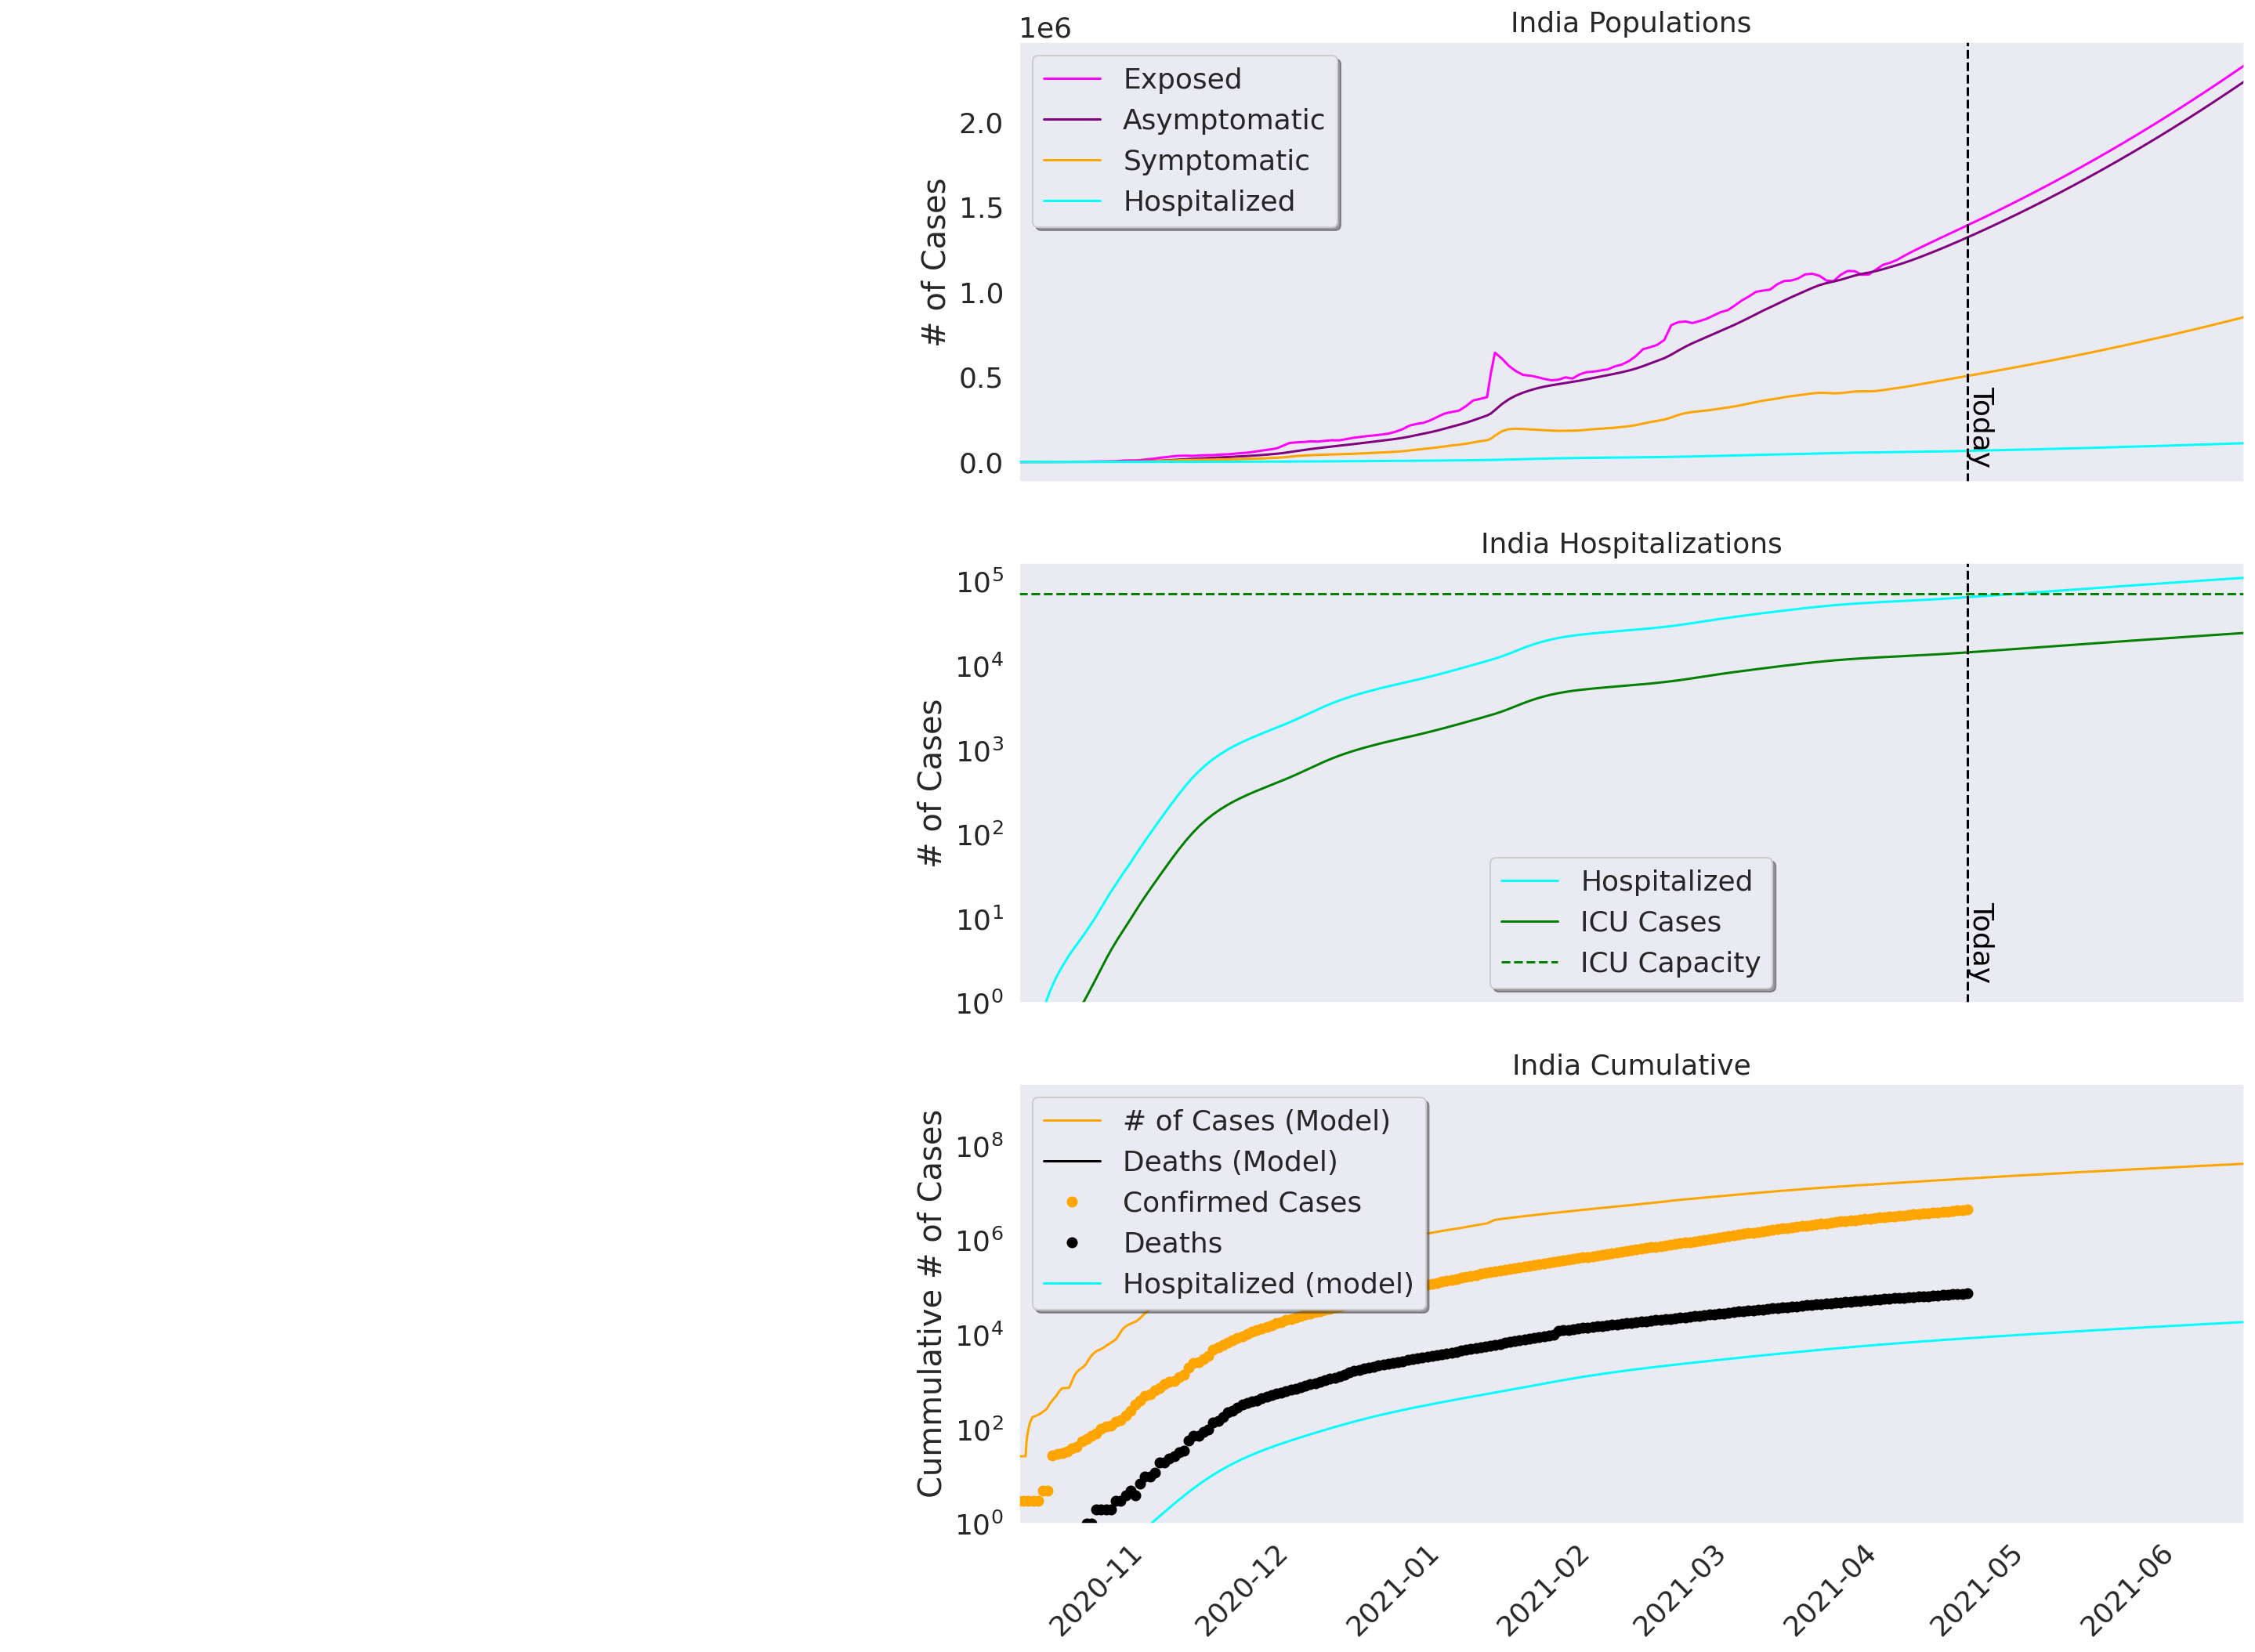

In [ ]:
country = select_country('India')
plottage(country,RK3(select_country(country_name)))


<center>
<hr/>
<h1>
<b>
<i>
**** Thank You ****
</i>
</b>
</h1>
</center>
<hr/>